<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Library Imports

In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import shapiro,normaltest,pearsonr,chi2_contingency

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [19]:
data = pd.read_csv('/content/Life Expectancy Data.csv')

### Variable Descriptions
#### Format: variable (type) - description

* country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)

* year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

* status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

* life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year

* adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

* infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

* alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

* percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

* hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

* measles (Ratio) - number of reported Measles cases per 1000 population

* bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

* under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

* polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

* total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

* diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

* hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

* gdp (Ratio) - Gross Domestic Product per capita

* population (Ratio) - population of a country

* thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)

* thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9

* income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
schooling (Ratio) - average number of years of schooling of a population - ICOR measures how good a country is at utilizing its resources.

# 1) Basic Analysis

In [20]:
data.sample(5)

Country  Year      Status  Life expectancy   Adult Mortality  \
2887  Viet Nam  2002  Developing              73.8            137.0   
913       Fiji  2000  Developing              67.7            221.0   
694    Czechia  2010   Developed              77.5             99.0   
870    Estonia  2011  Developing              76.1            138.0   
1781   Myanmar  2014  Developing              66.4             21.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2887             30     2.03                0.000000          NaN      6755   
913               0     2.05               31.258346         98.0         0   
694               0    12.69                0.000000         99.0         0   
870               0     0.01             2146.945741         94.0         7   
1781             40     0.01               45.337887         88.0       122   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
2887    1.0                  39   92.0               4.70         75.0   
913     5.2                   0   91.0               3.87          9.0   
694    63.6                   0   99.0               7.43         99.0   
870    58.0                   0   93.0               5.83         93.0   
1781   22.9                  52   88.0               2.28         88.0   

       HIV/AIDS           GDP  Population   thinness  1-19 years  \
2887        0.2           NaN         NaN                   15.6   
913         0.1    276.133800    811223.0                    4.3   
694         0.1           NaN         NaN                    1.9   
870         0.1  17454.843420   1327439.0                    1.9   
1781        0.3   1262.893782  51924182.0                   12.9   

       thinness 5-9 years  Income composition of resources  Schooling  
2887                 16.3                            0.584       10.7  
913                   4.0                            0.681       13.1  
694                   2.0                              NaN        NaN  
870                   2.0                            0.838       16.4  
1781                 13.1                            0.547        9.1

In [21]:
data.shape

(2938, 22)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [23]:
data.isna().sum()/data.shape[0] * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [24]:
data.describe().T

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
 BMI                             2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure                2712.0  5.938190e+00  2.498320e+00   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   
 HIV/AIDS                        2938.0  1.742103e+00  5.077785e+00   
GDP                              2490.0  7.483158e+03  1.427017e+04   
Population                       2286.0  1.275338e+07  6.101210e+07   
 thinness  1-19 years            2904.0  4.839704e+00  4.420195e+00   
 thinness 5-9 years              2904.0  4.870317e+00  4.508882e+00   
Income composition of resources  2771.0  6.275511e-01  2.109036e-01   
Schooling                        2775.0  1.199279e+01  3.358920e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      63.100000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       0.877500  3.755000e+00   
percentage expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      77.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
 BMI                                1.00000      19.300000  4.350000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.260000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     463.935626  1.766948e+03   
Population                         34.00000  195793.250000  1.386542e+06   
 thinness  1-19 years               0.10000       1.600000  3.300000e+00   
 thinness 5-9 years                 0.10000       1.500000  3.300000e+00   
Income composition of resources     0.00000       0.493000  6.770000e-01   
Schooling                           0.00000      10.100000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.570000e+01  8.900000e+01  
Adult Mortality                  2.280000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.702500e+00  1.787000e+01  
percentage expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
 BMI                             5.620000e+01  8.730000e+01  
under-five deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.492500e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
 HIV/AIDS                        8.000000e-01  5.060000e+01  
GDP            

## 1.1) Observations
  - Null values
  - Multicolinearity


# EDA

In [25]:
numericalFeatures = [column for column in data.columns if (data[column].dtype == int or data[column].dtype == float) and (column != 'Year')]
categoricalFeatures = [column for column in data.columns if column not in numericalFeatures]

## Univariant Analysis

### Shapiro-wilk Test
**for Normality Test of Numeric Features**

- H0 (null hypothesis) :- The feature follows Normal Distribution
- H1 (alternative hypothesis) :- The feature not follows Normal Distribution

If P-value less than the 0.05 we have enough evidance to reject the null hypothesis and go with alternative hypothesis

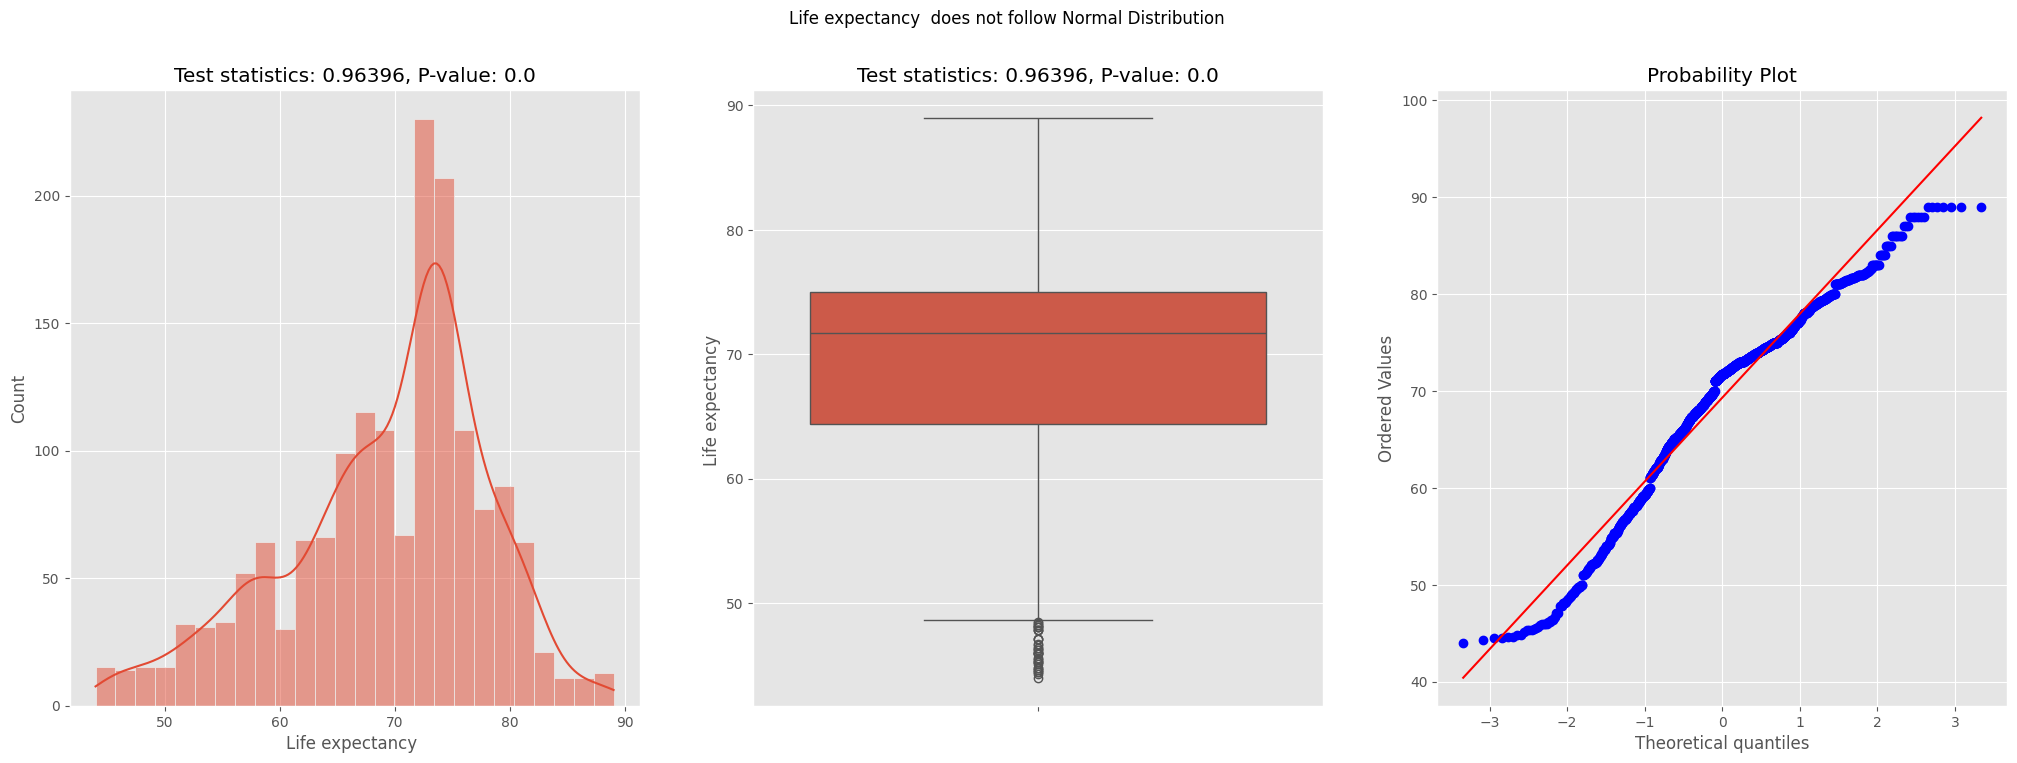

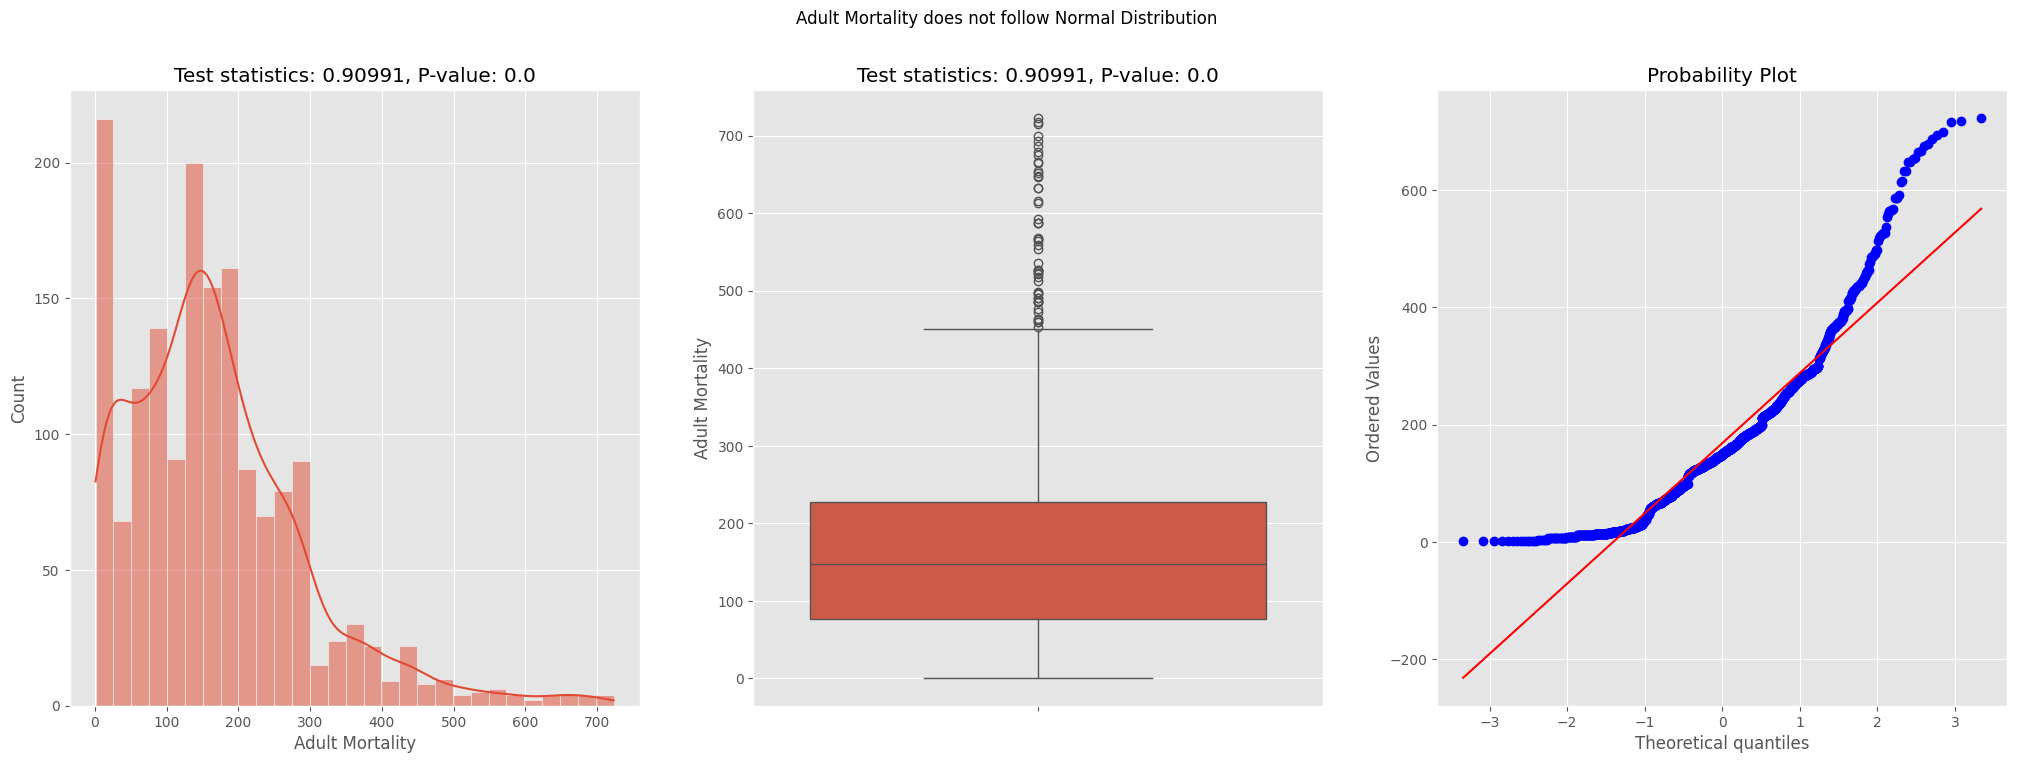

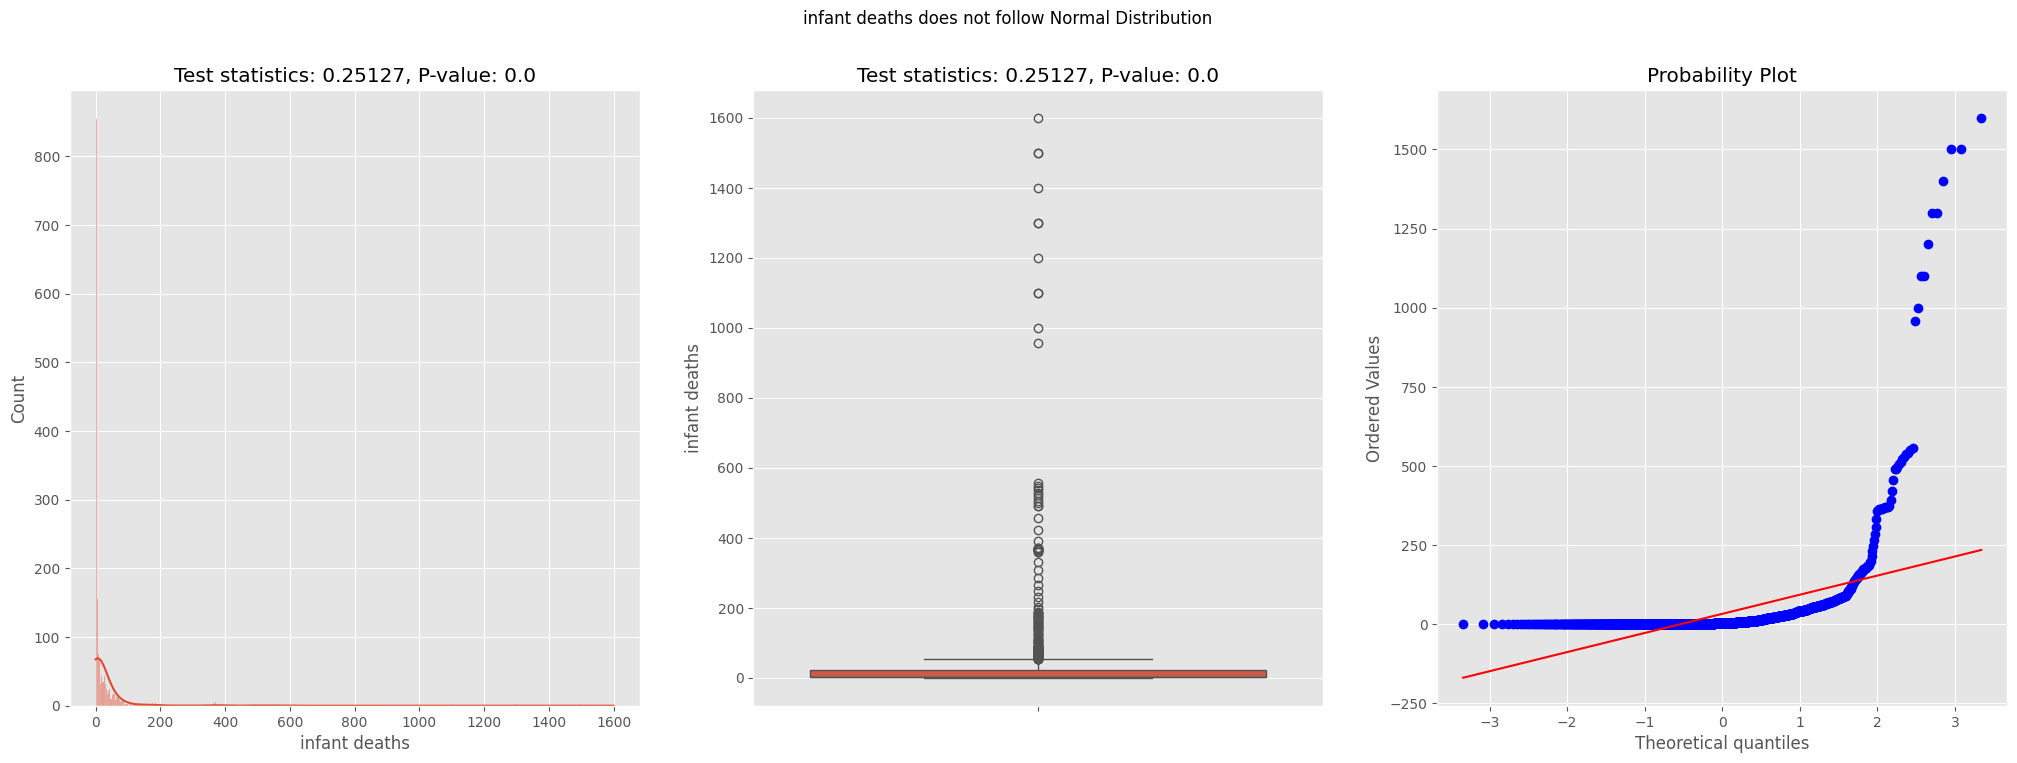

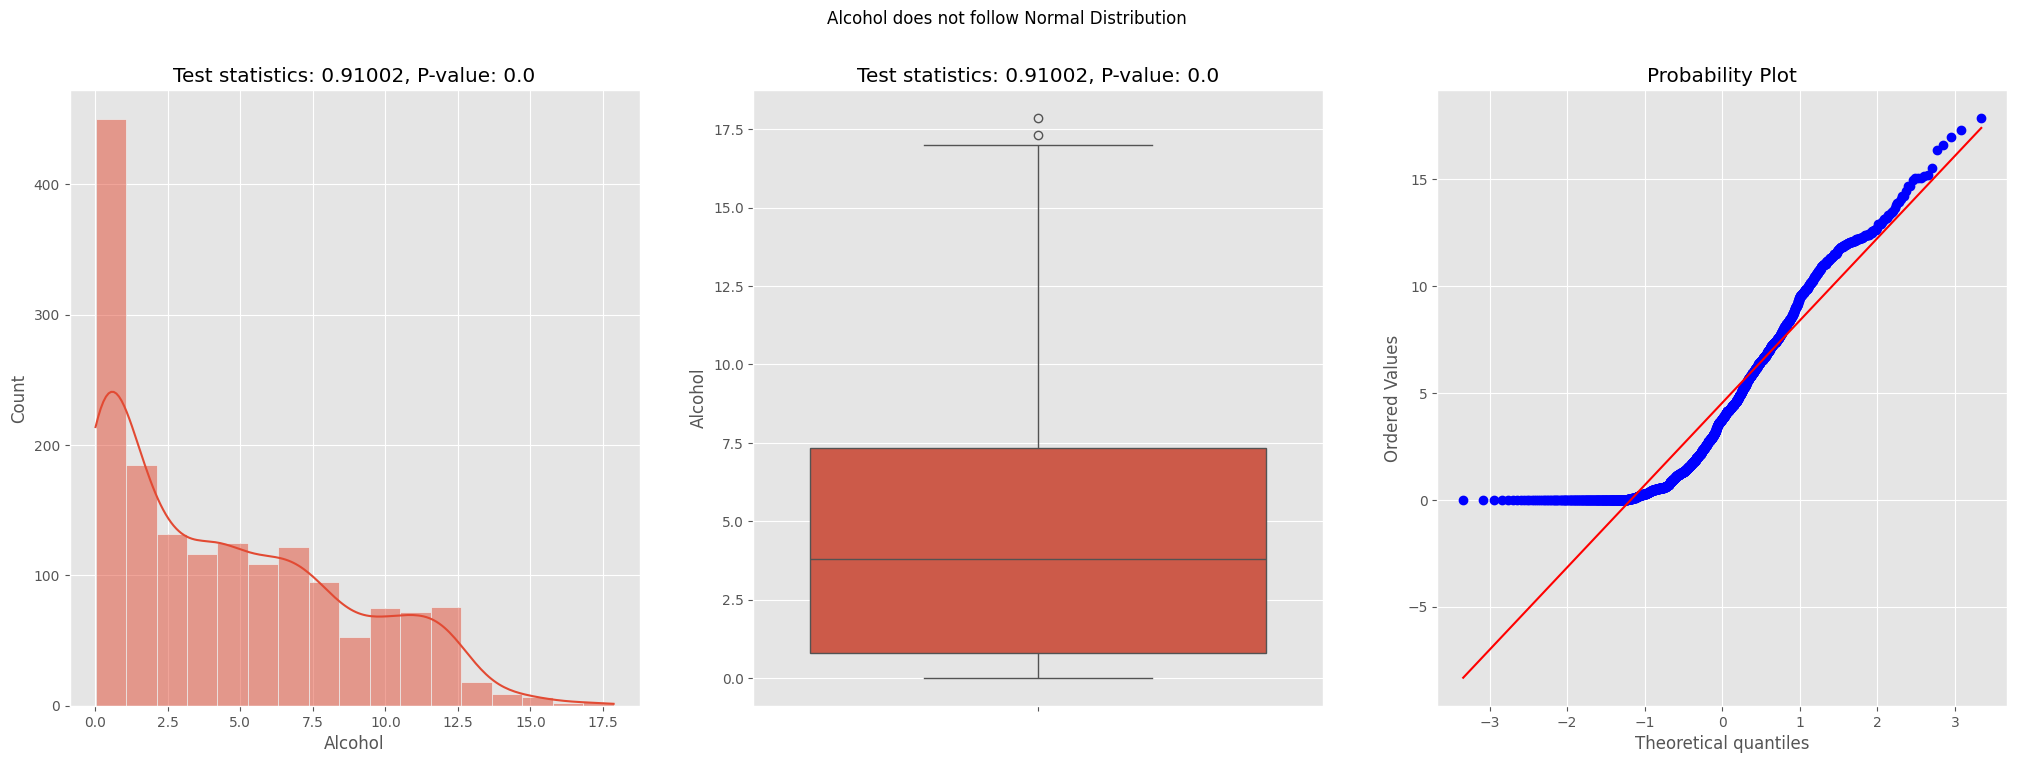

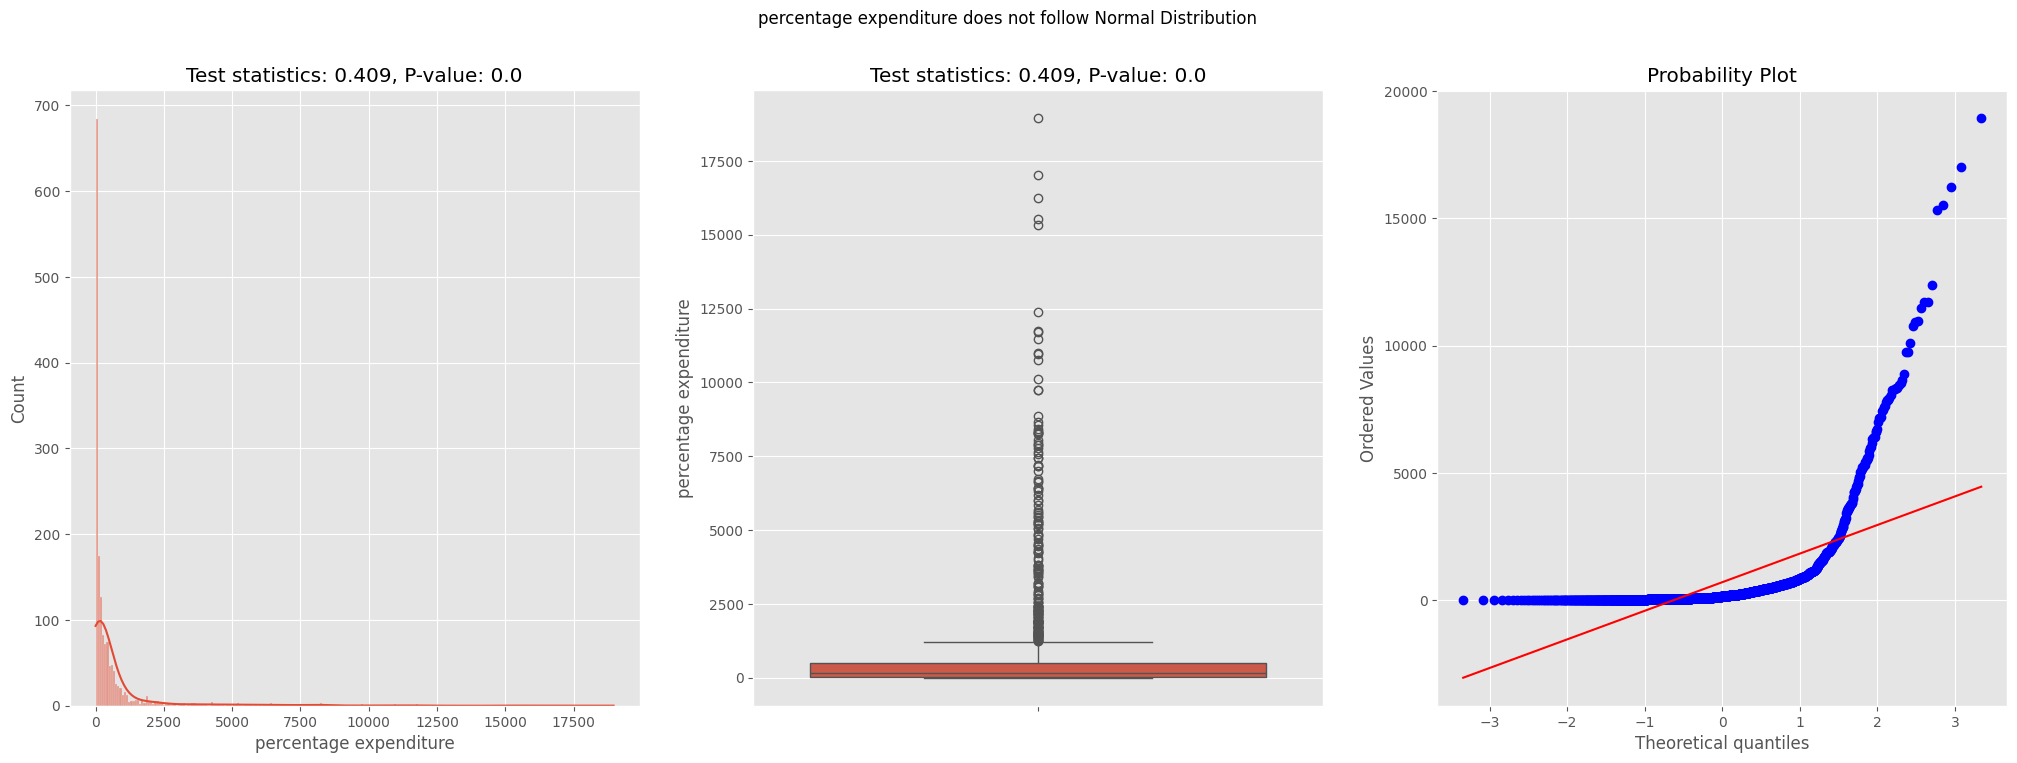

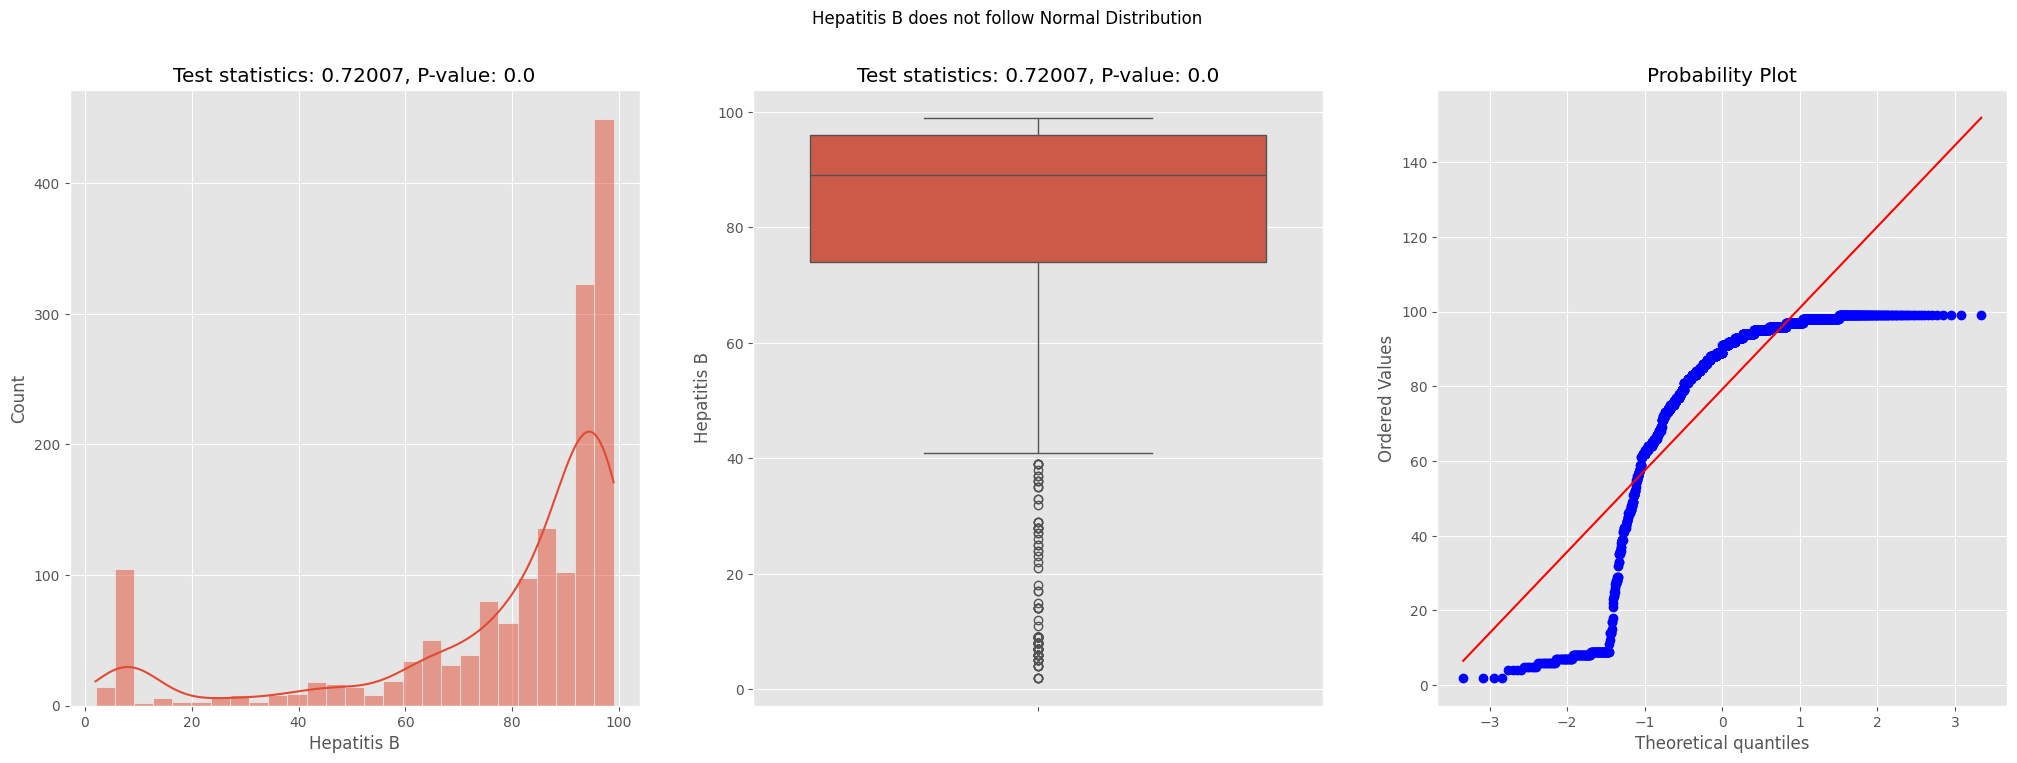

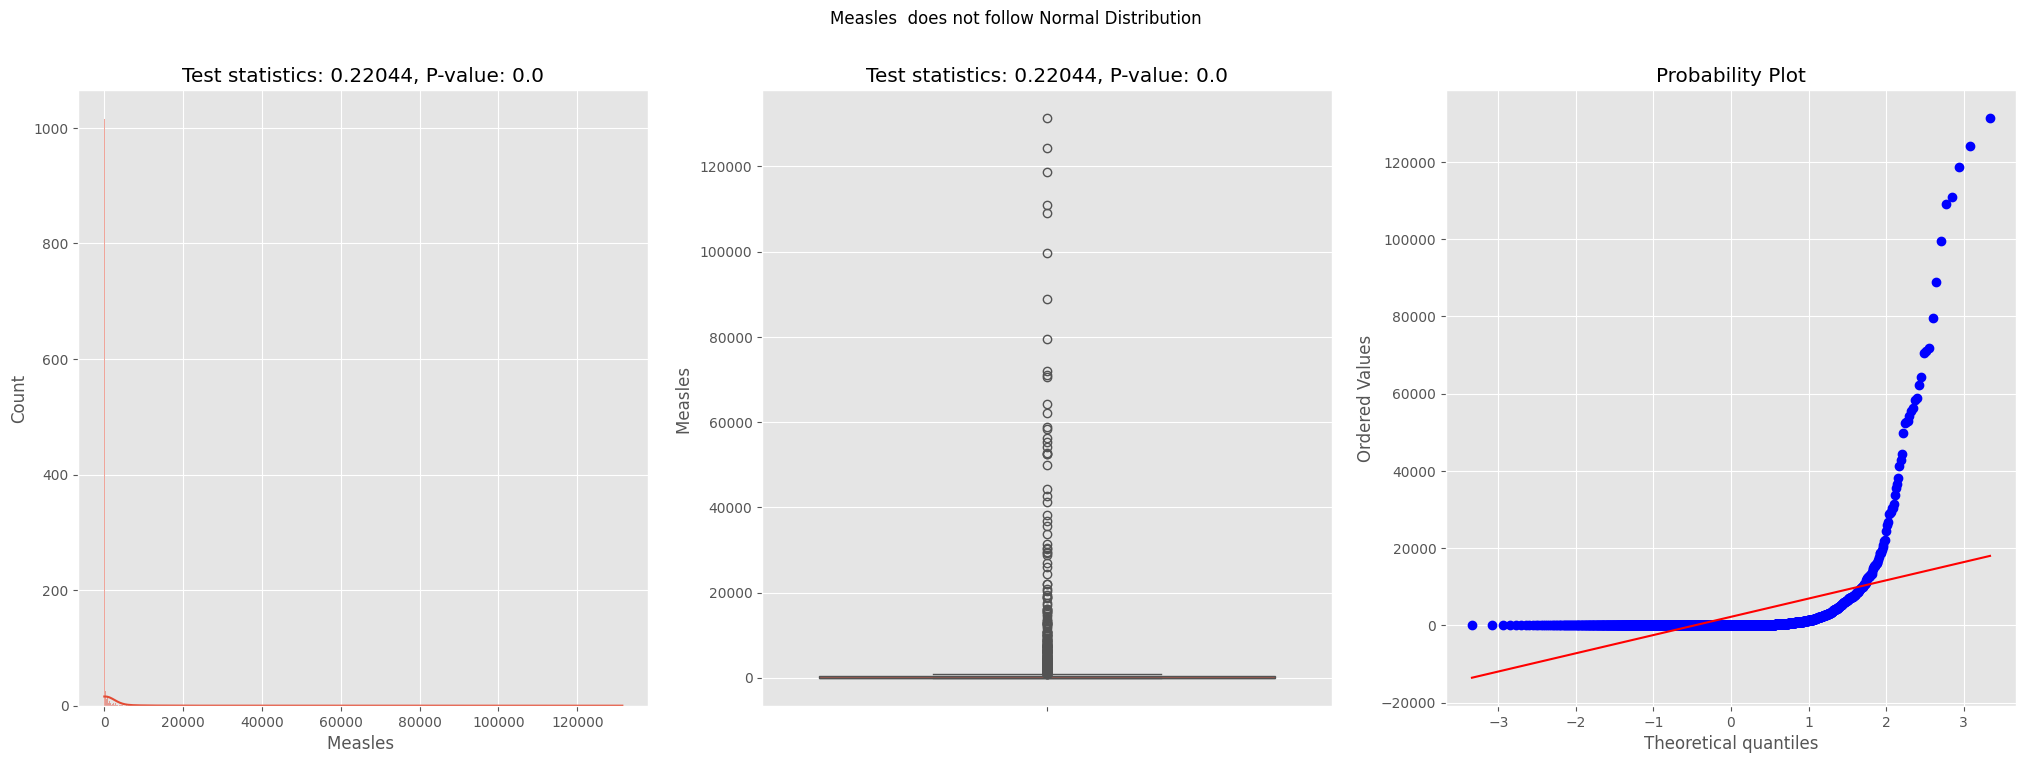

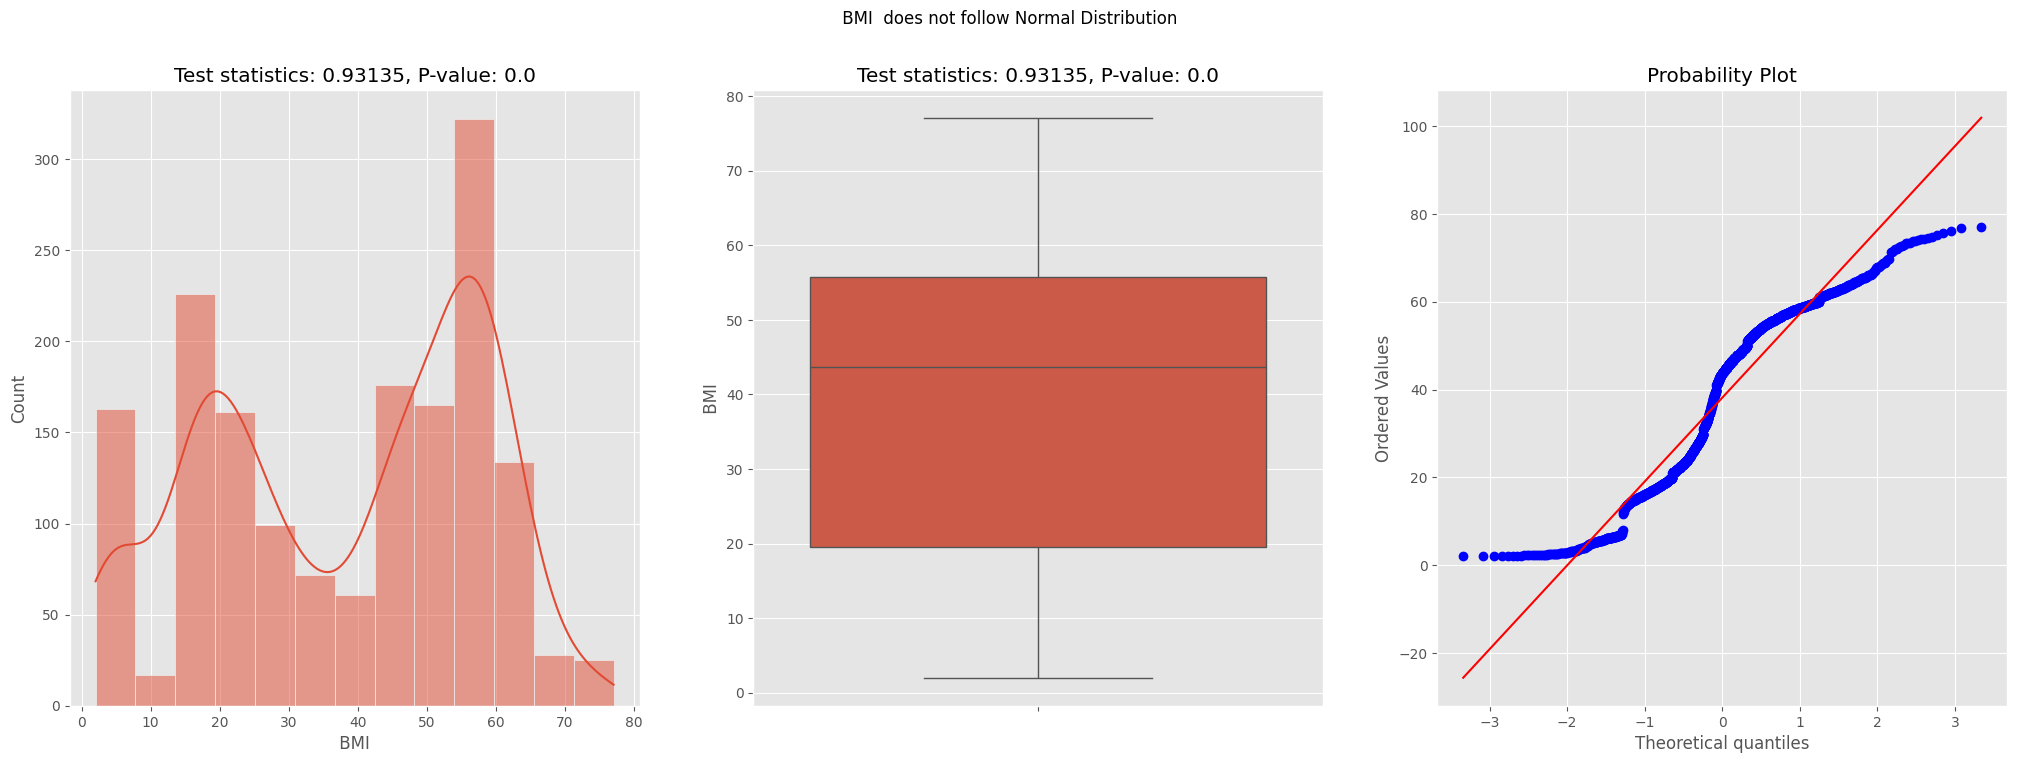

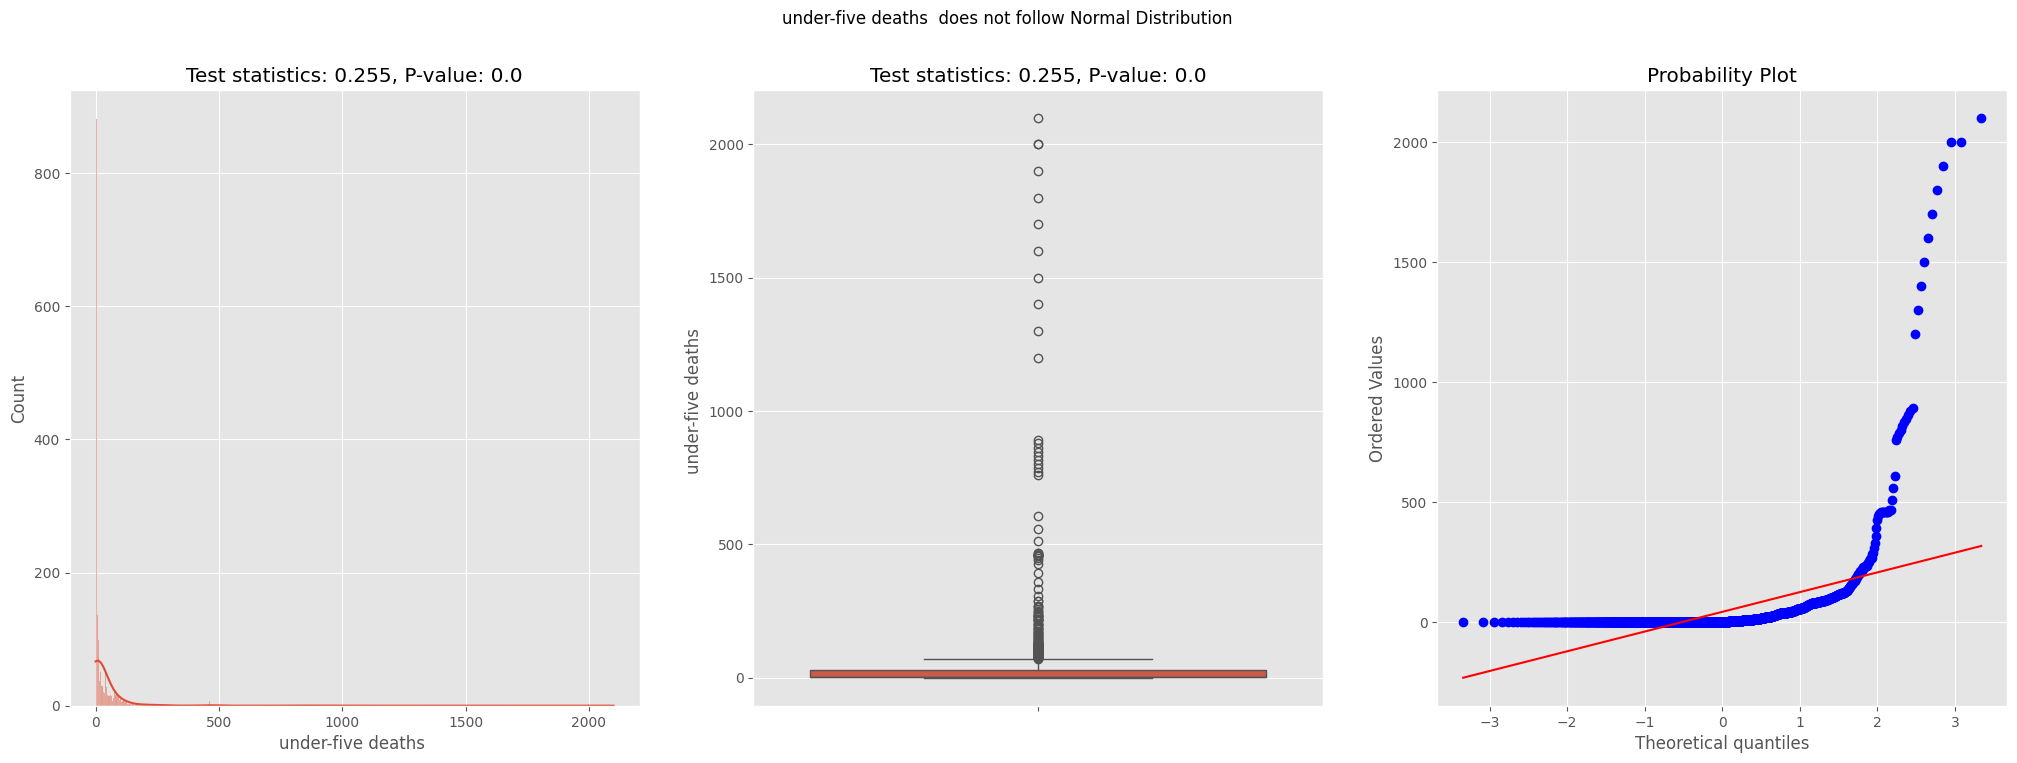

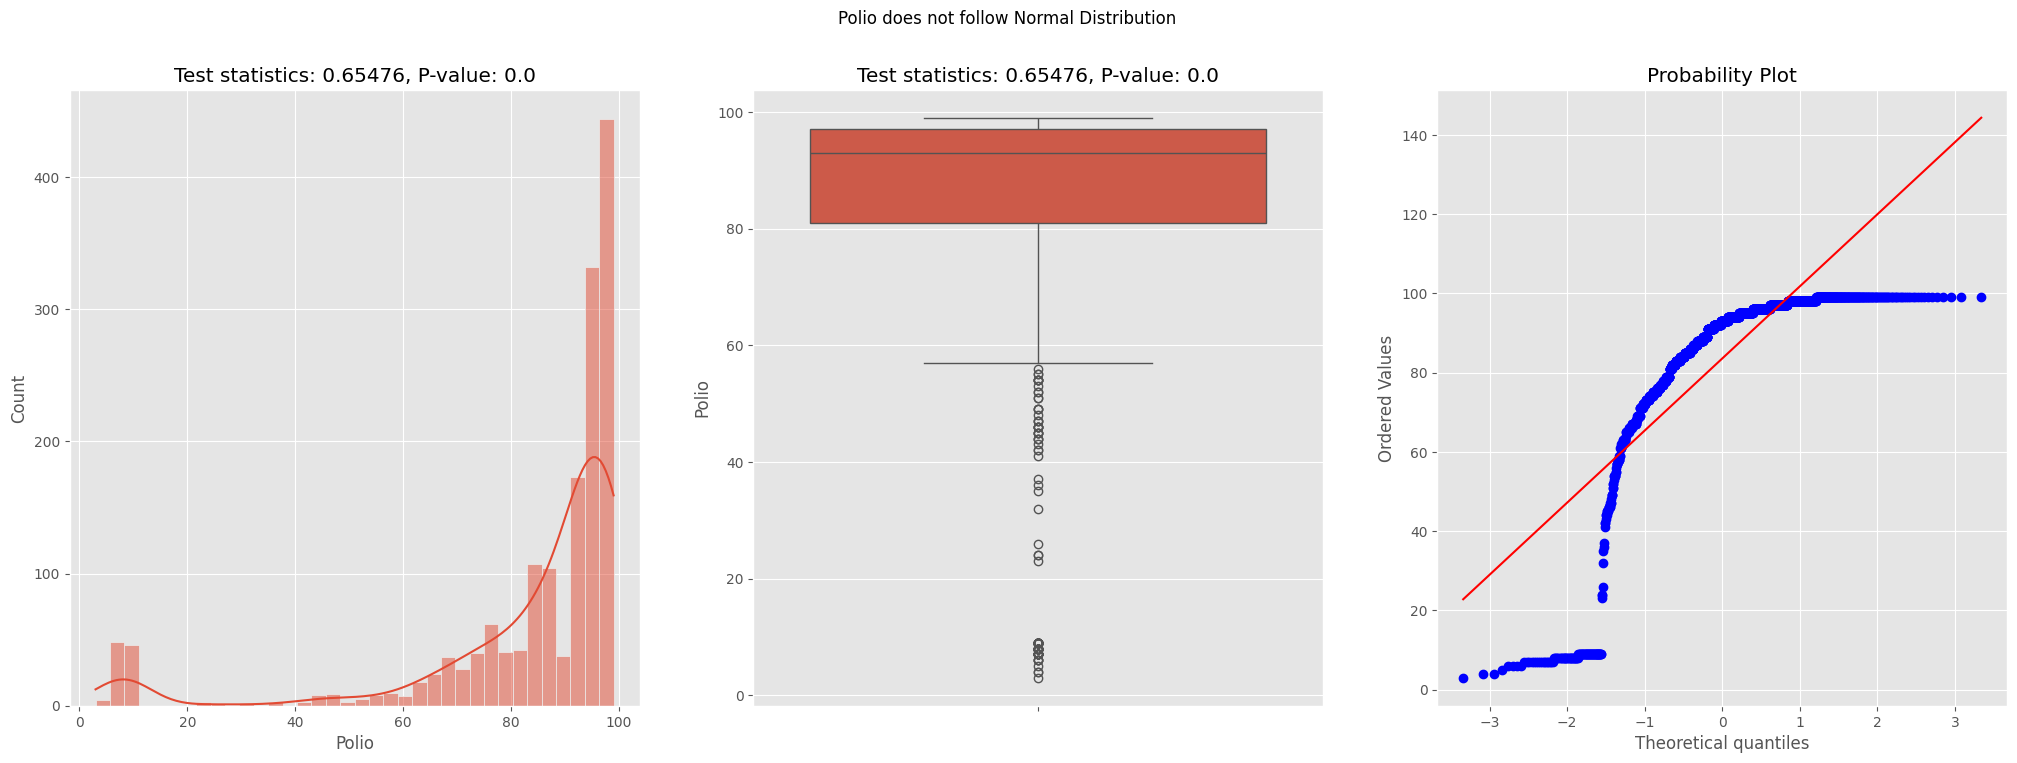

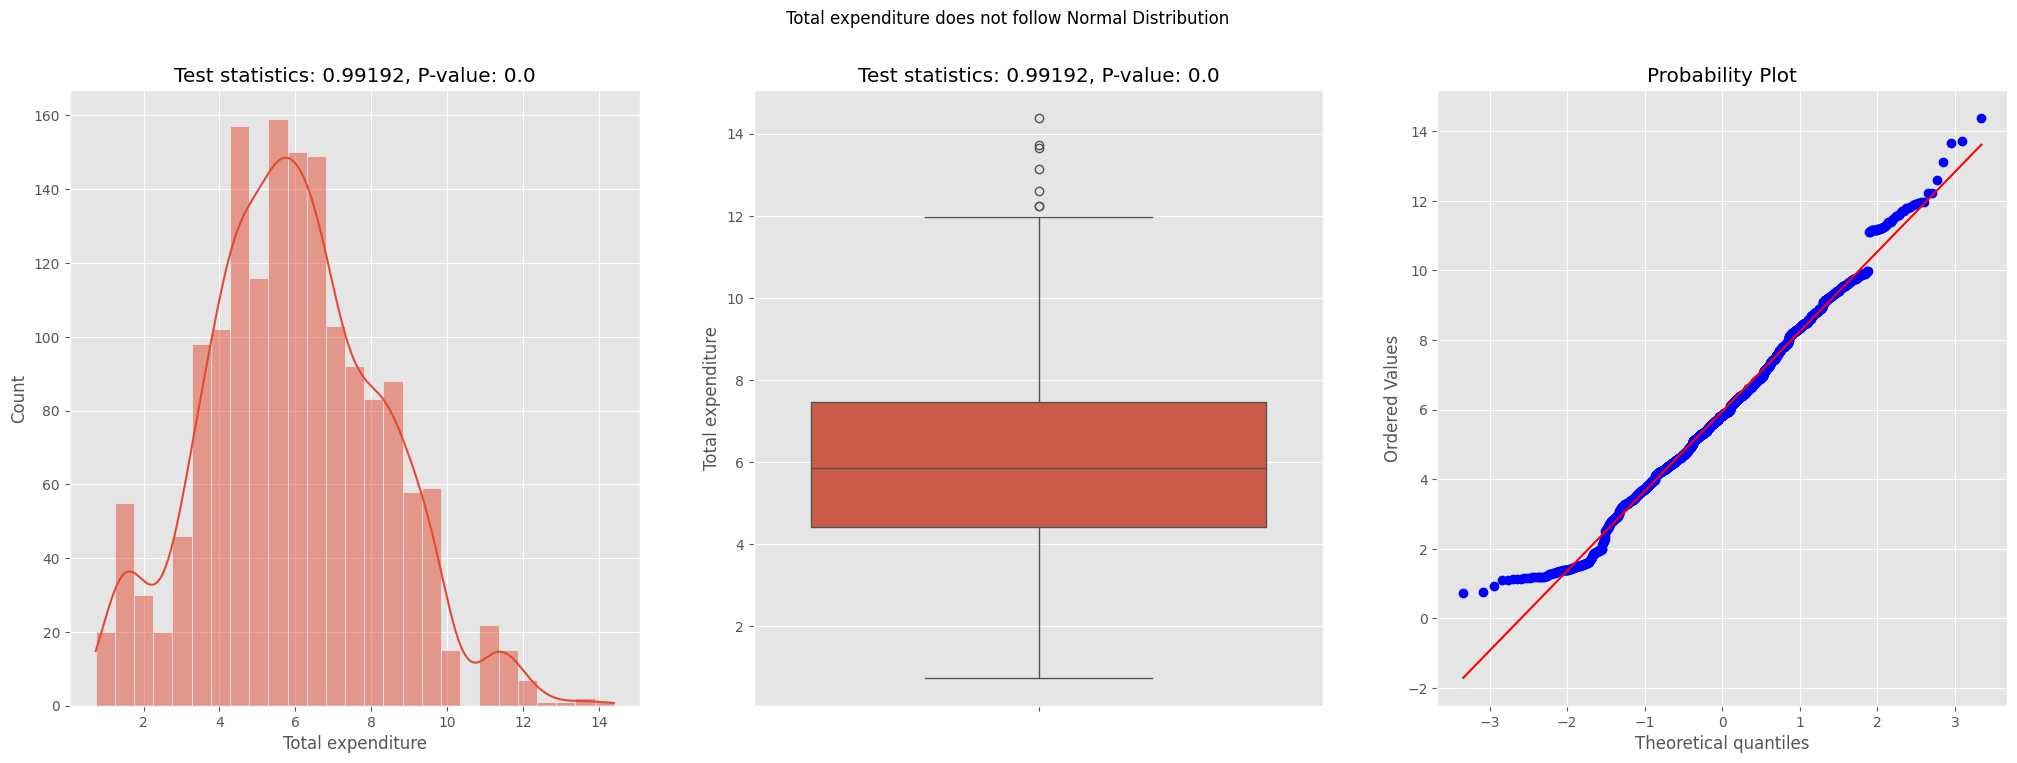

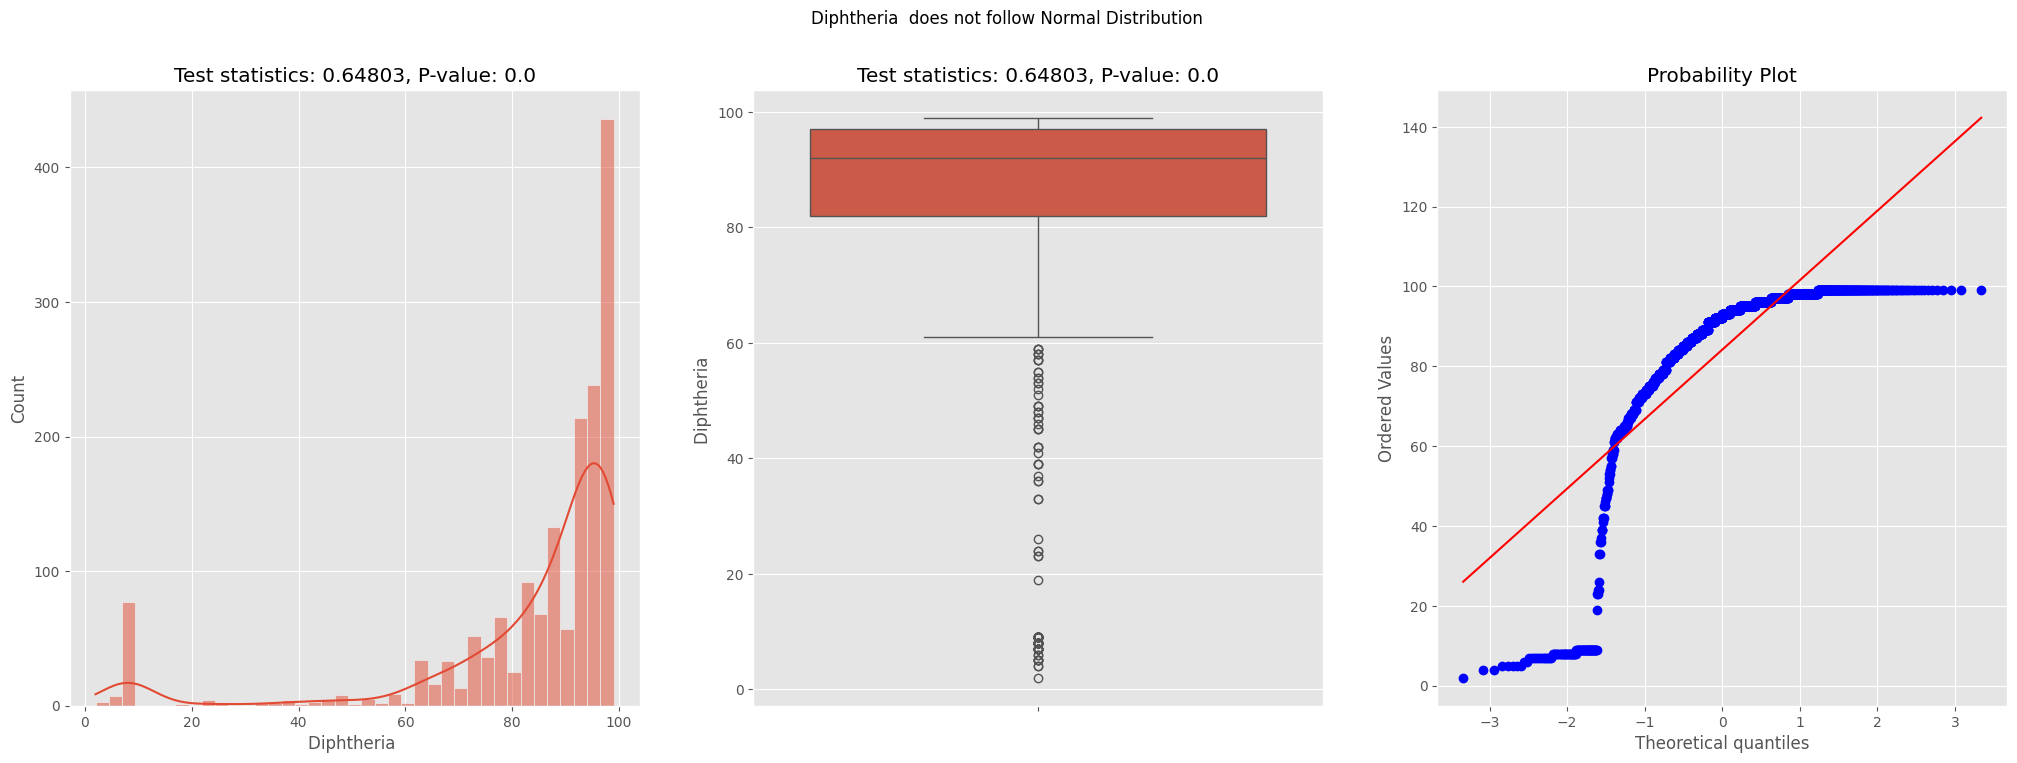

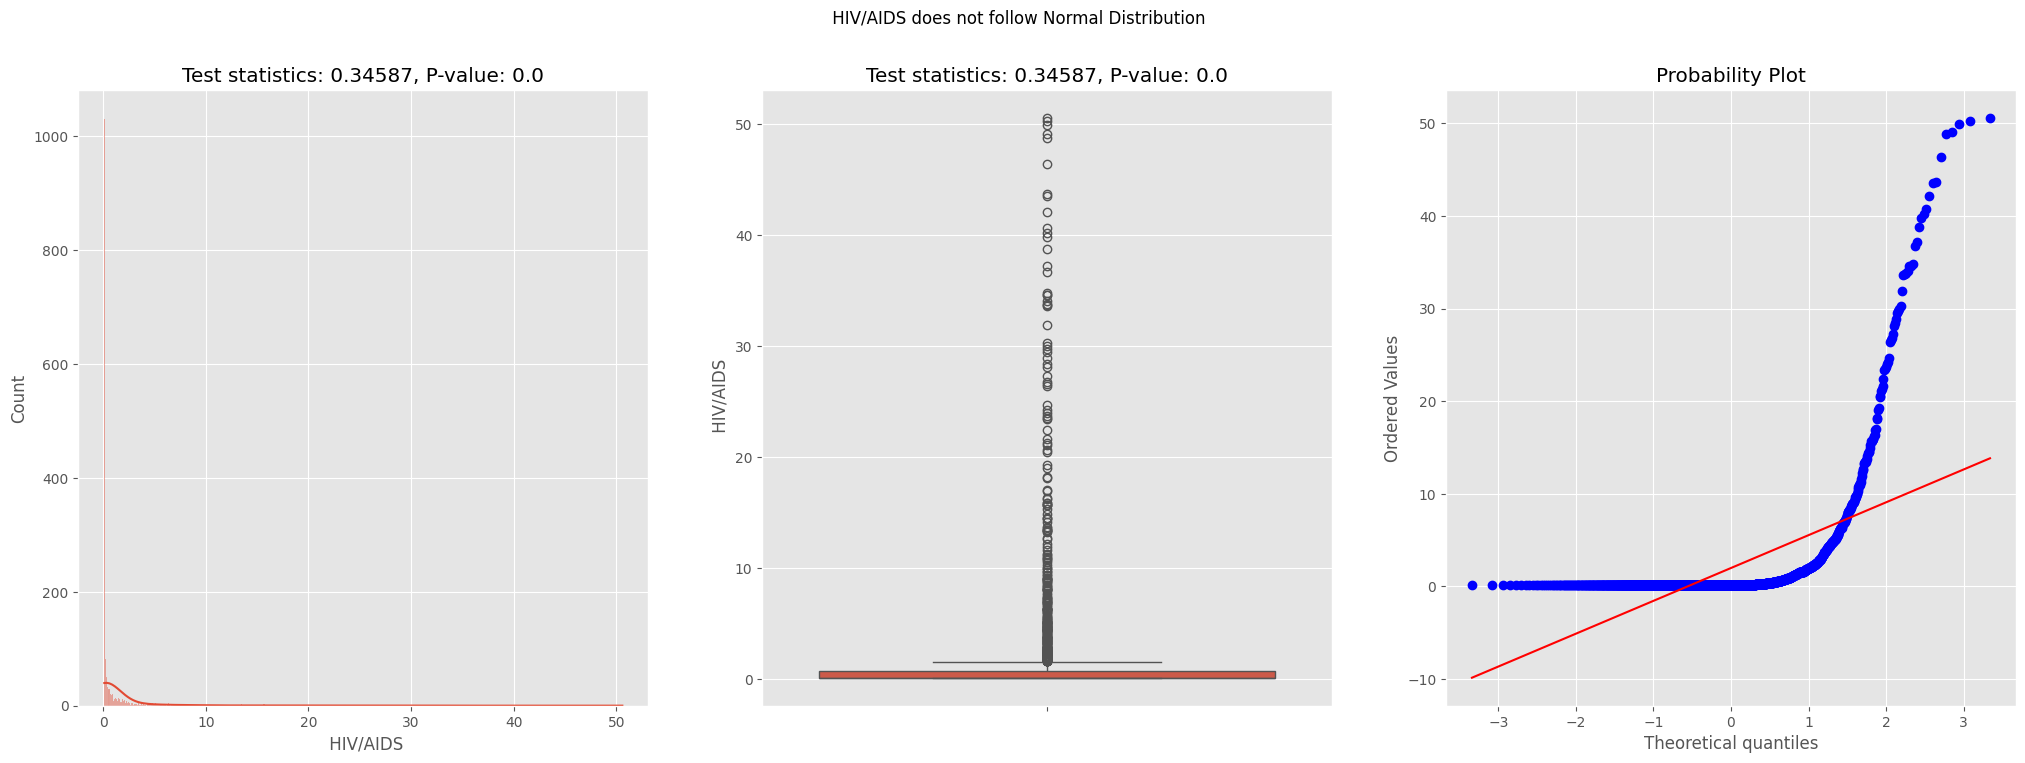

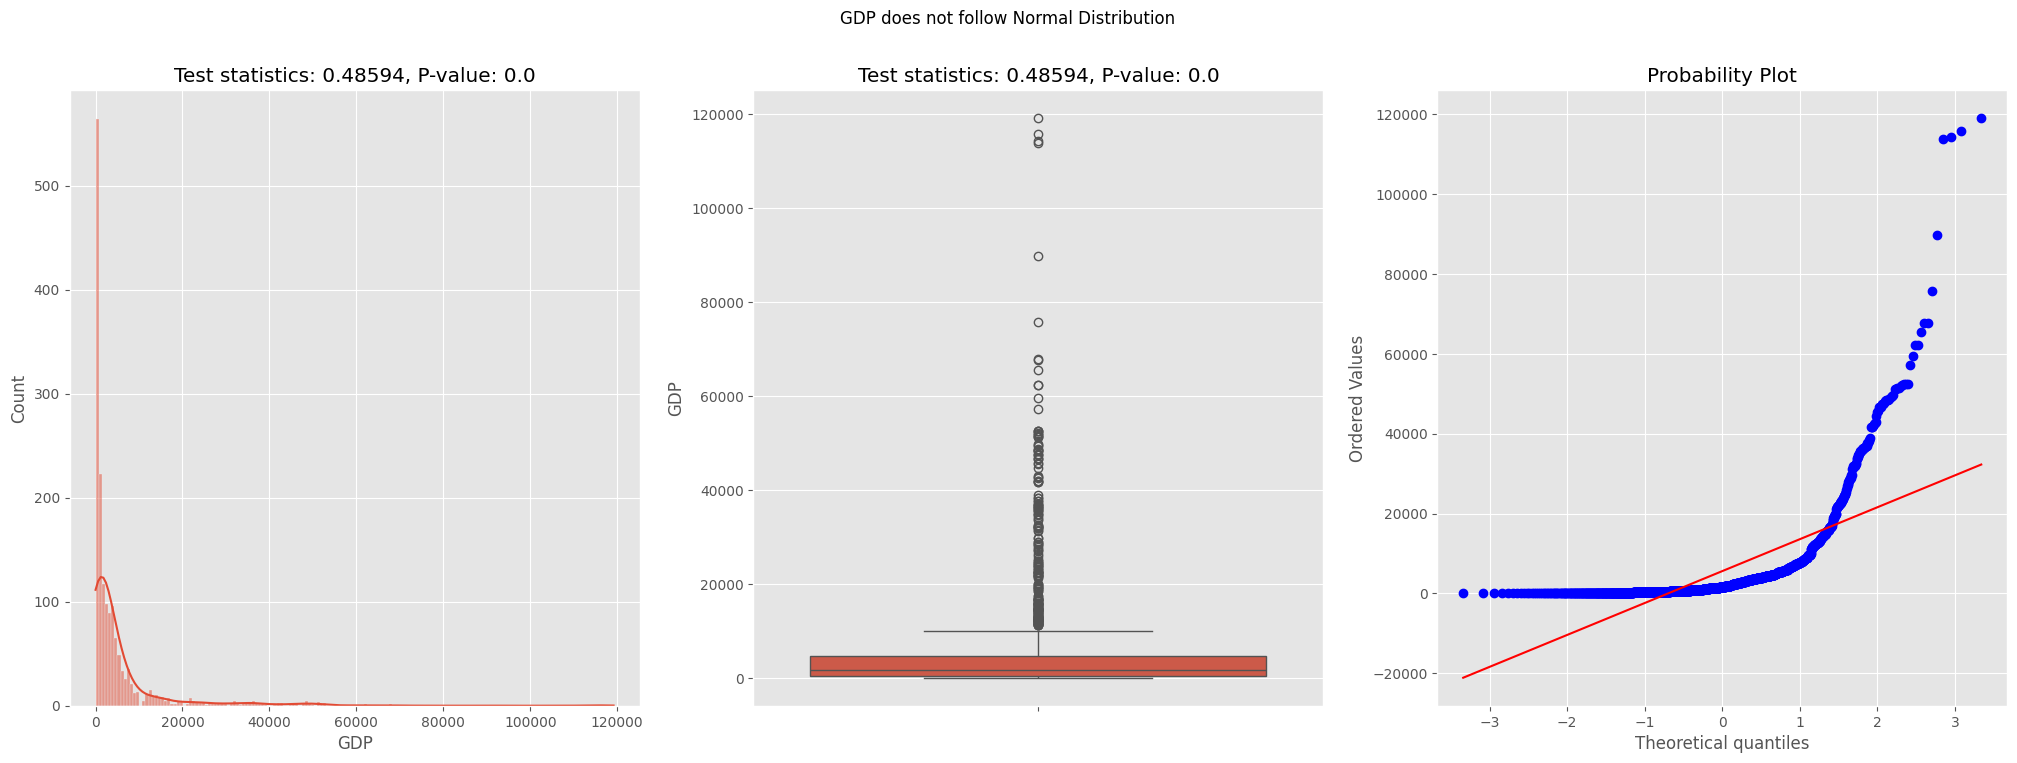

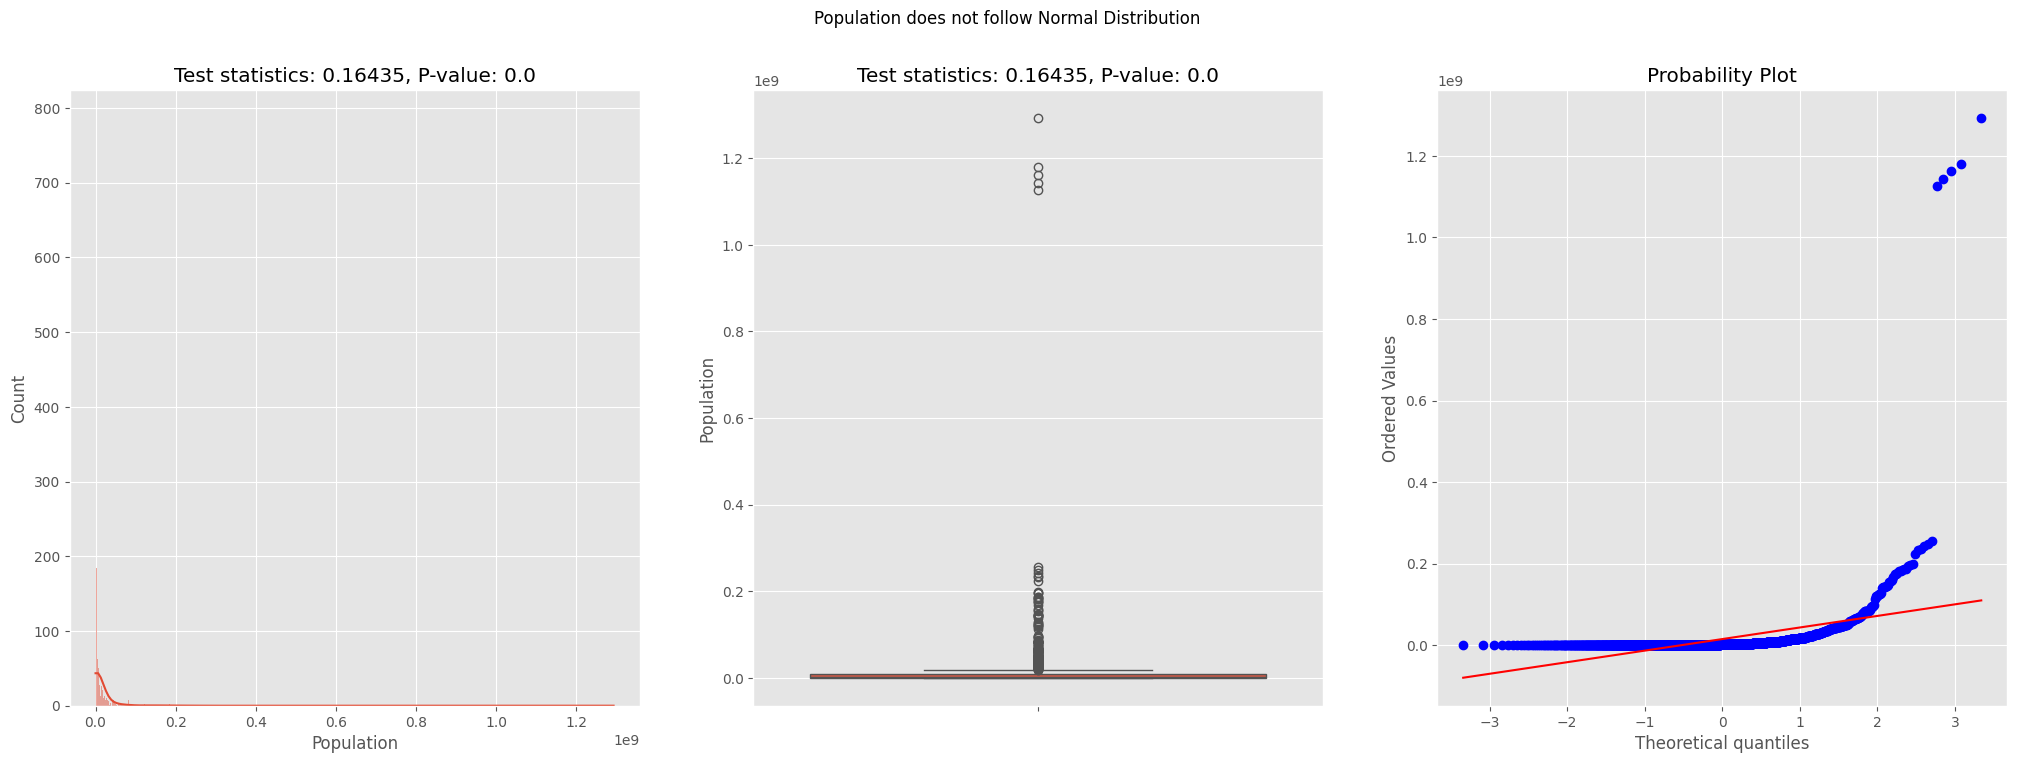

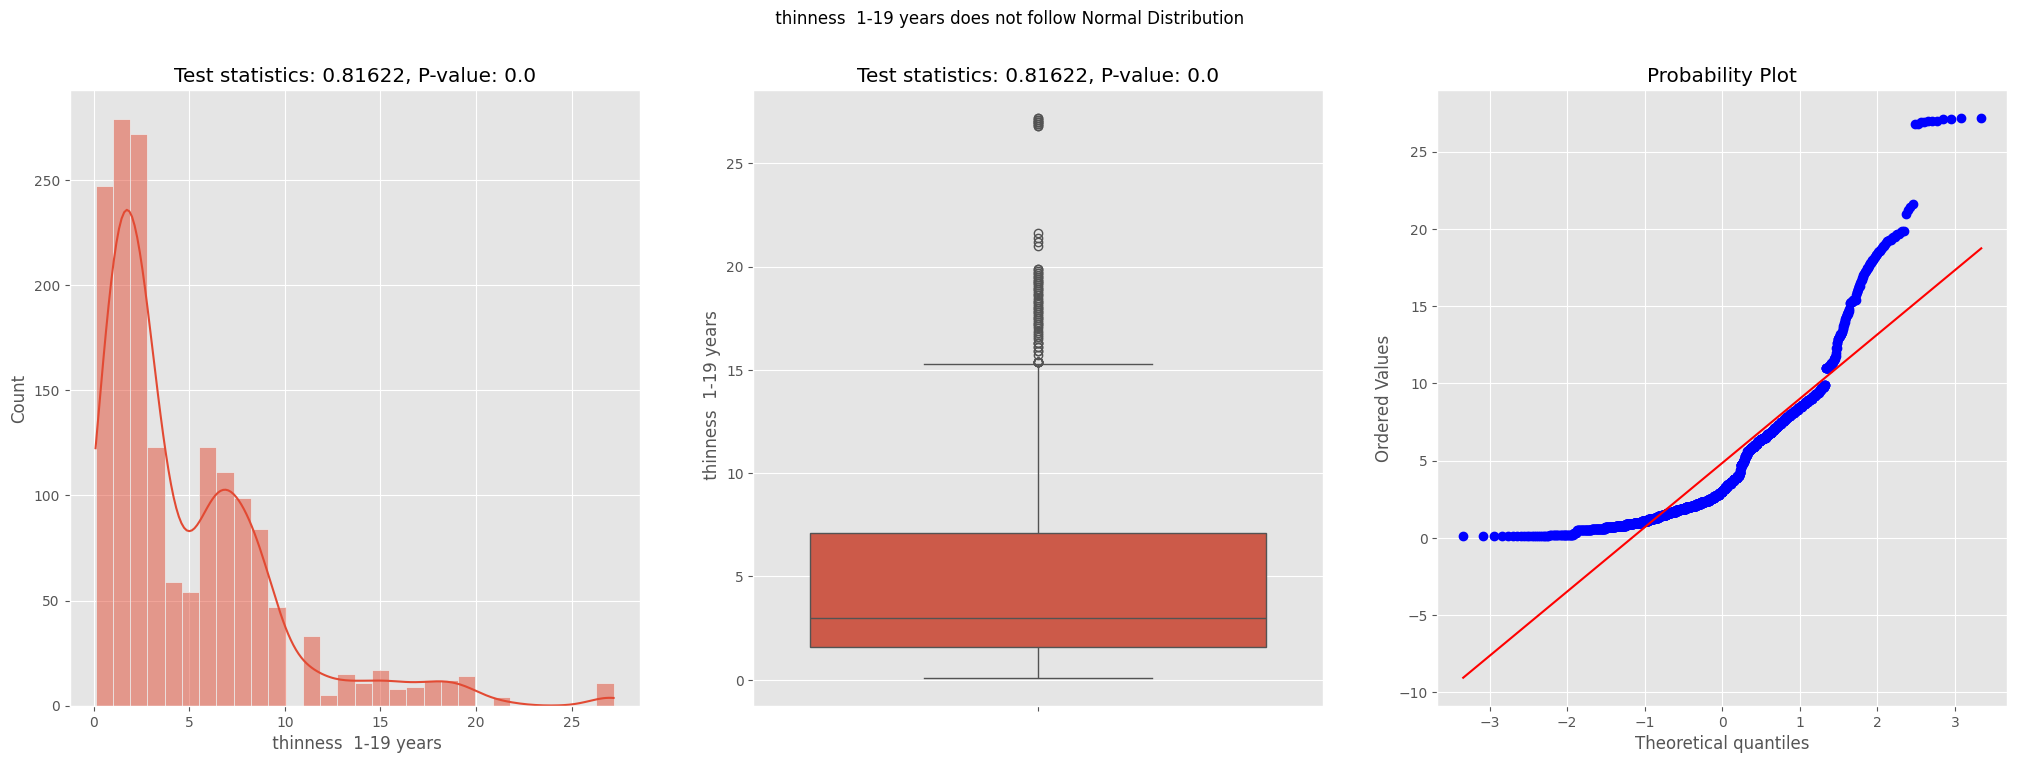

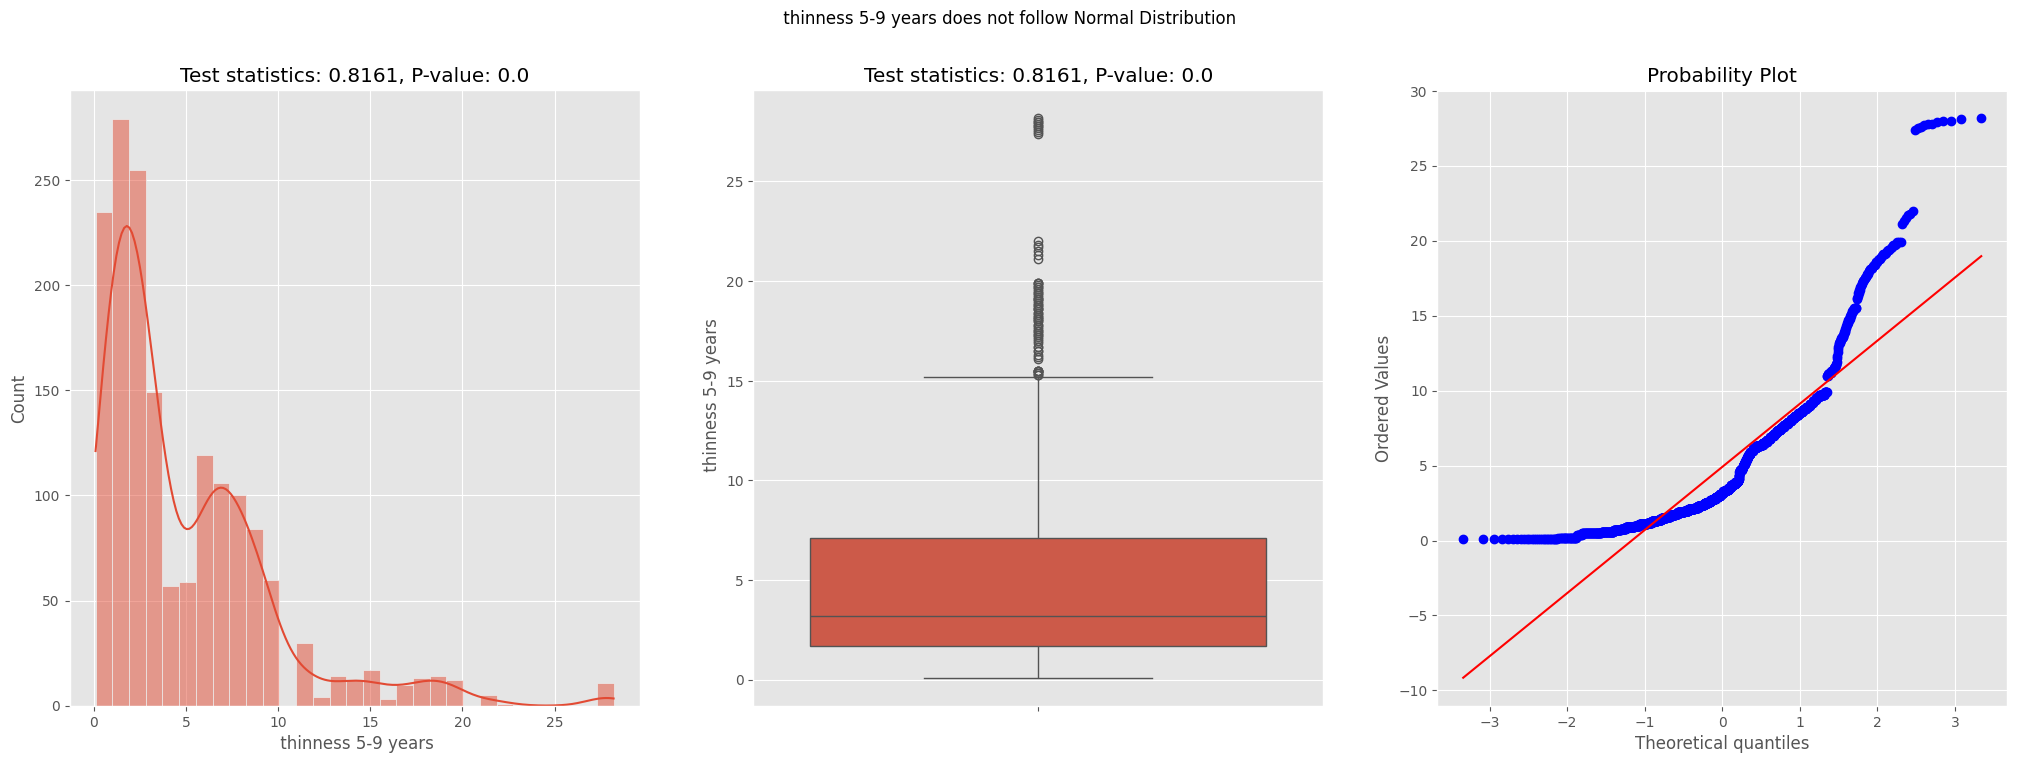

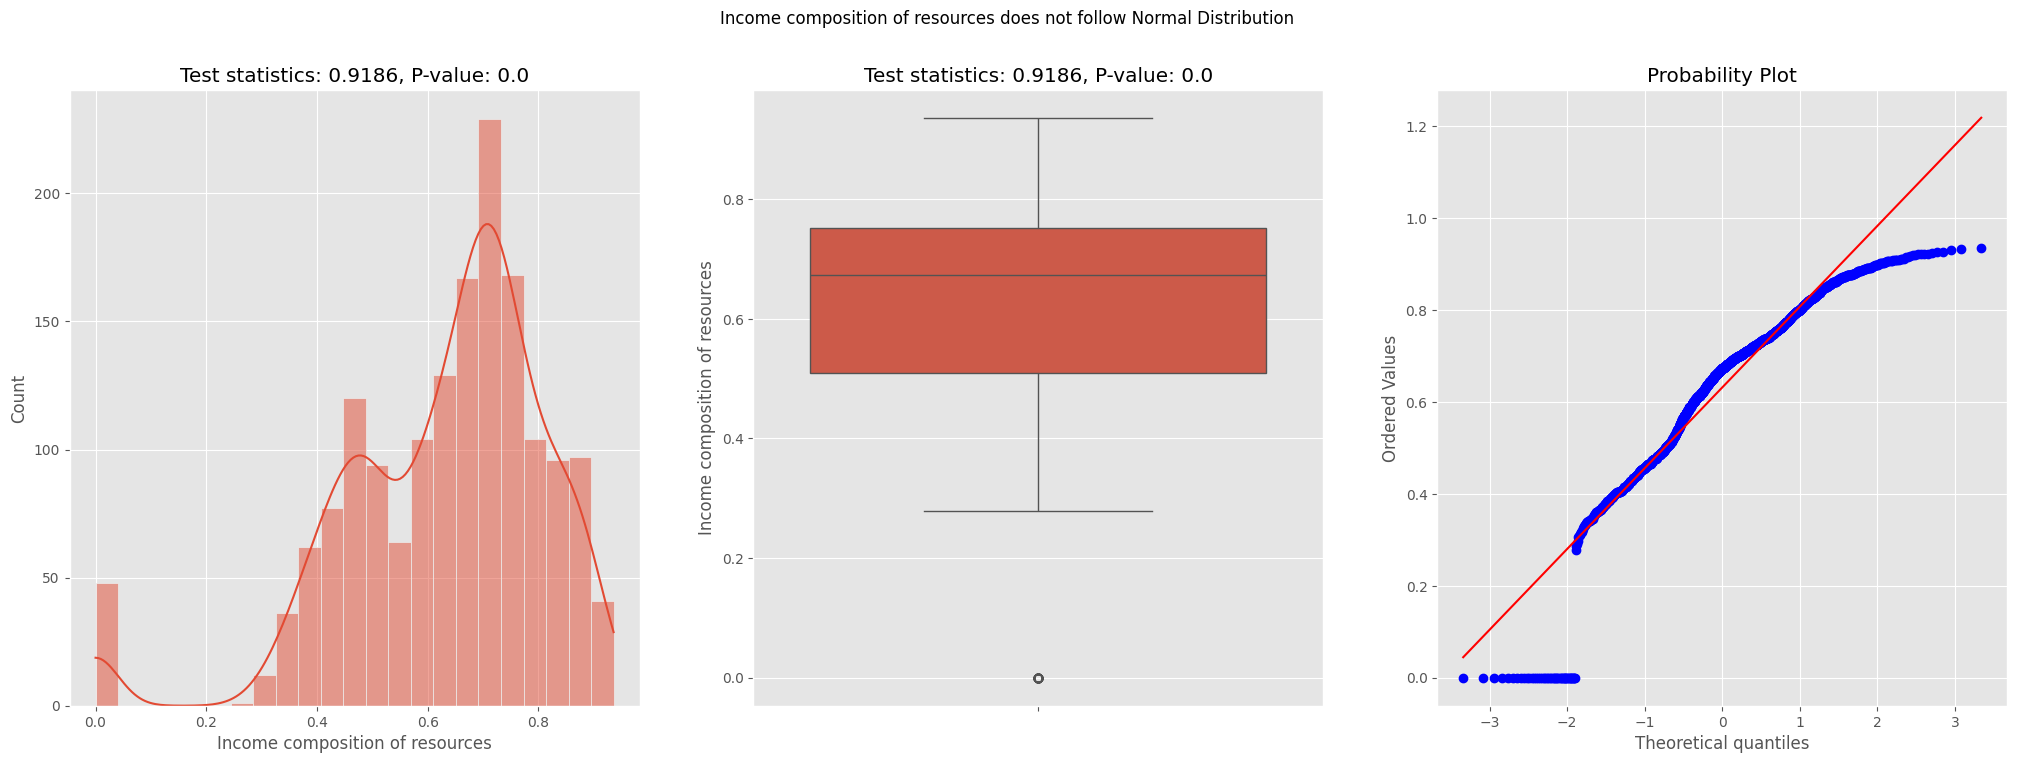

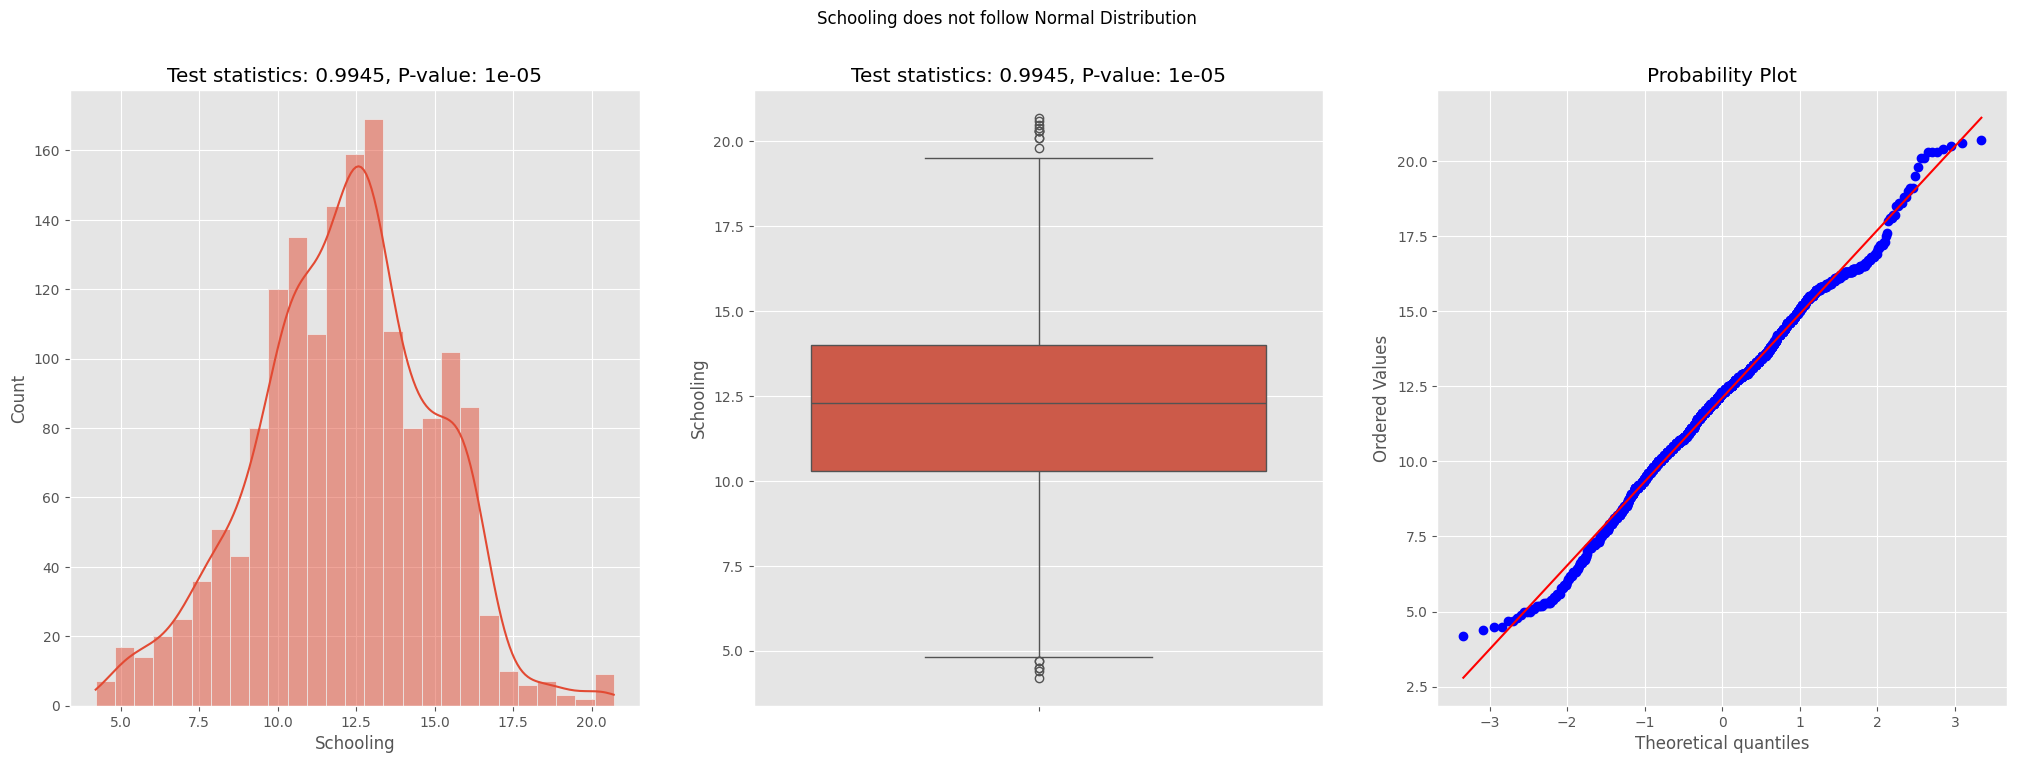

In [26]:
def plotNormalityTest(feature=None,new_data=None):
  fig,ax = plt.subplots(1,3,figsize=(25,8))
  new_data.dropna(inplace=True)
  statistics, p_value = shapiro(new_data[feature])
  ax[0].set_title(f'Test statistics: {np.round(statistics,5)}, P-value: {np.round(p_value,5)}')
  ax[1].set_title(f'Test statistics: {np.round(statistics,5)}, P-value: {np.round(p_value,5)}')
  if p_value <= 0.05:
      fig.suptitle(f'{feature} does not follow Normal Distribution')
  else:
      fig.suptitle(f'{feature} follows Normal Distribution')

  sns.histplot(new_data[feature], ax=ax[0], kde=True)
  sns.boxplot(new_data[feature], ax=ax[1])
  stats.probplot(new_data[feature], plot=ax[2])
  plt.show()
  print('\n\n')

for feature in numericalFeatures:
  plotNormalityTest(feature,data)

### D'Agostino's K^2 Test

- H0 (null hypothesis) :- The feature follows Normal Distribution
- H1 (alternative hypothesis) :- The feature not follows Normal Distribution

If P-value less than the 0.05 we have enough evidance to reject the null hypothesis and go with alternative hypothesis

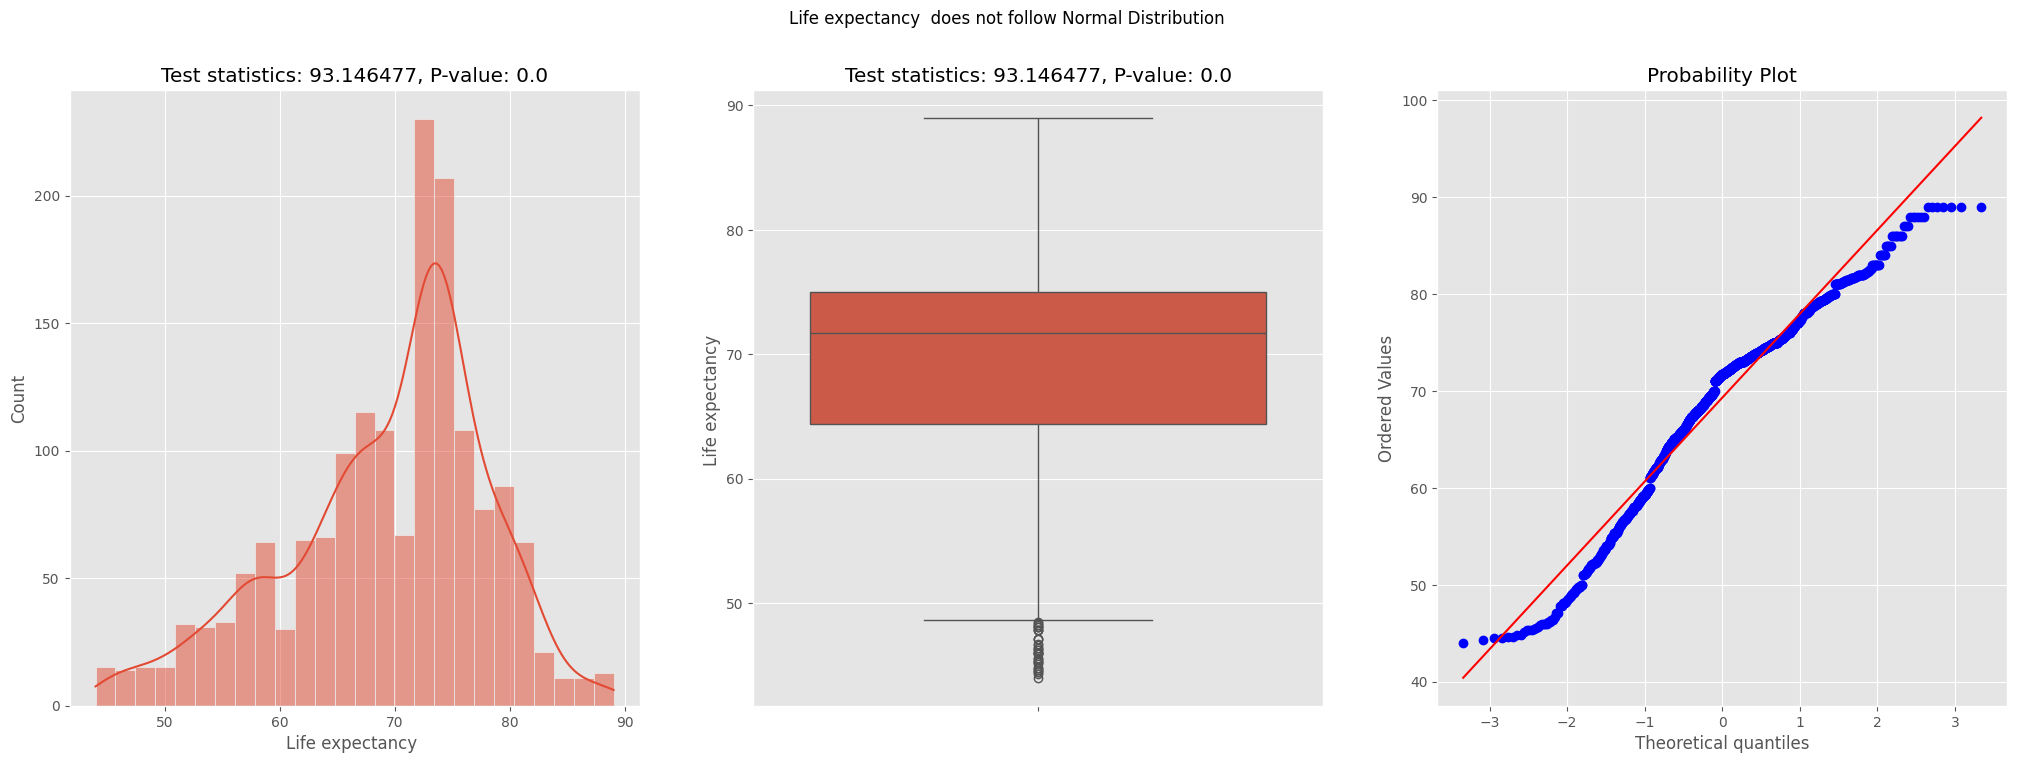

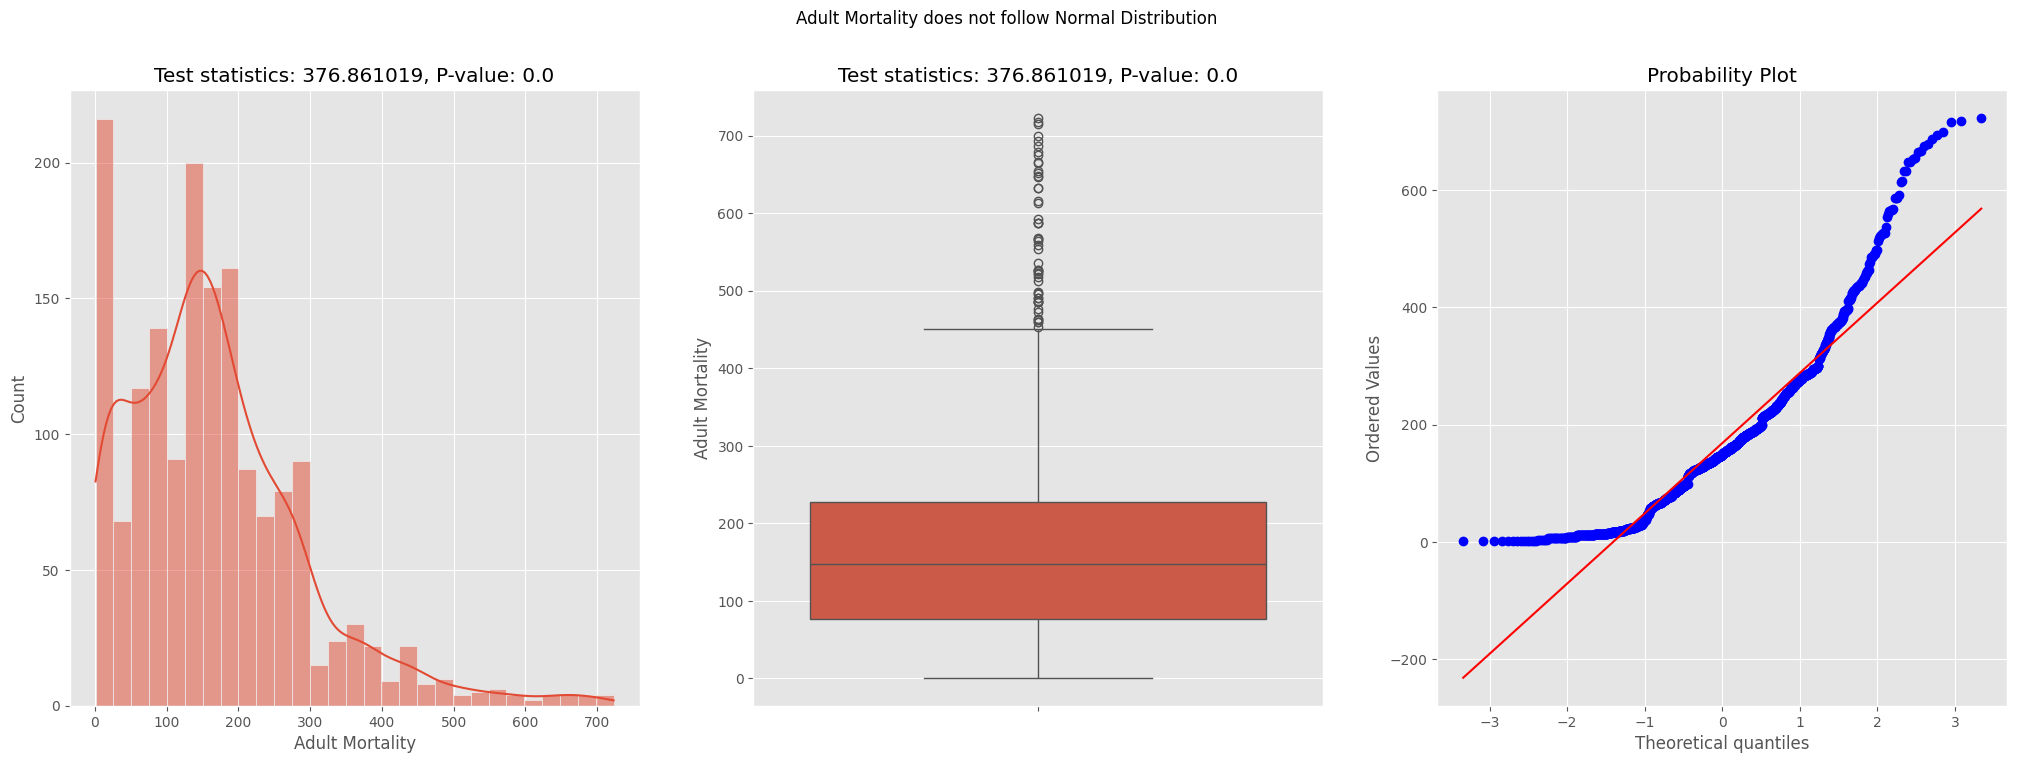

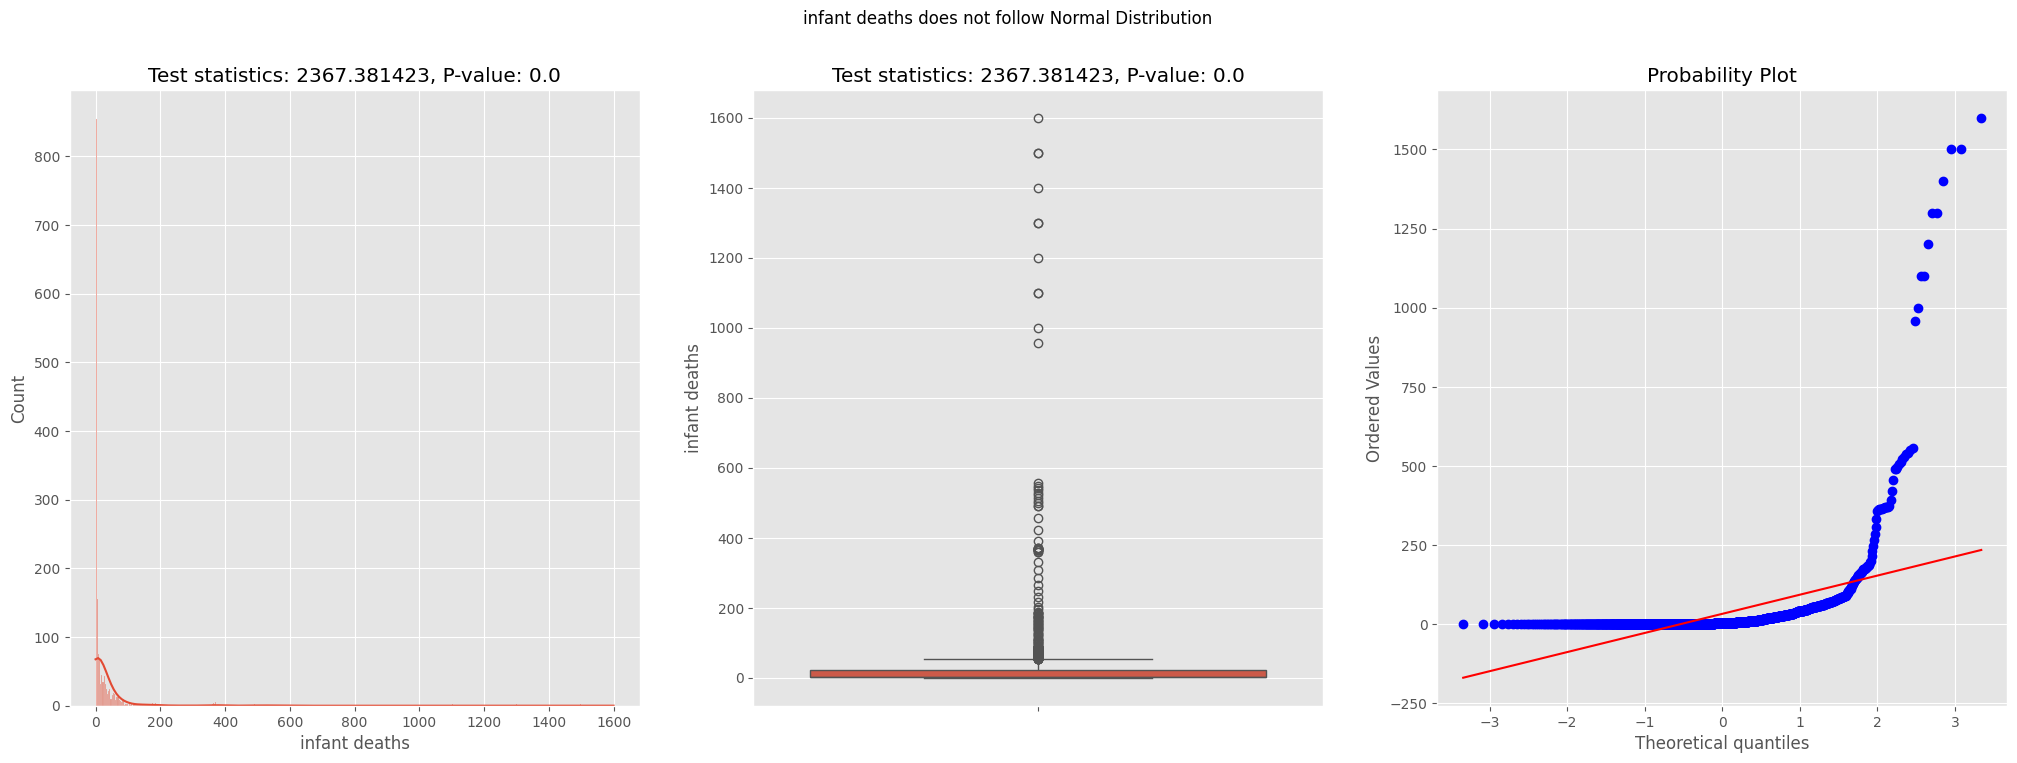

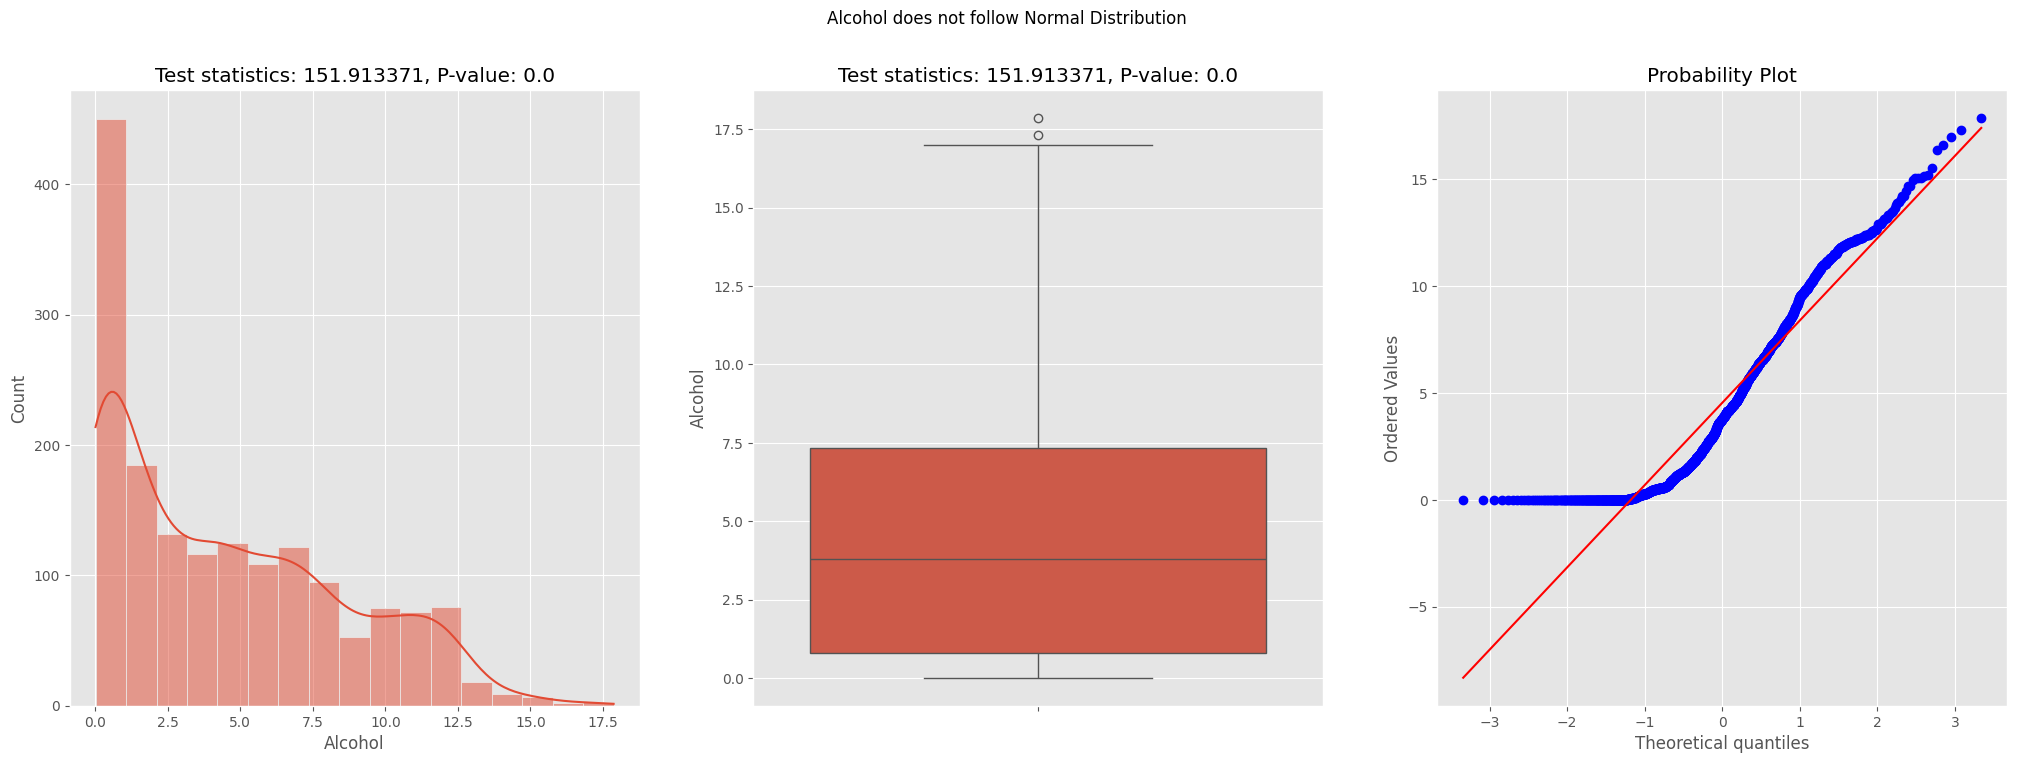

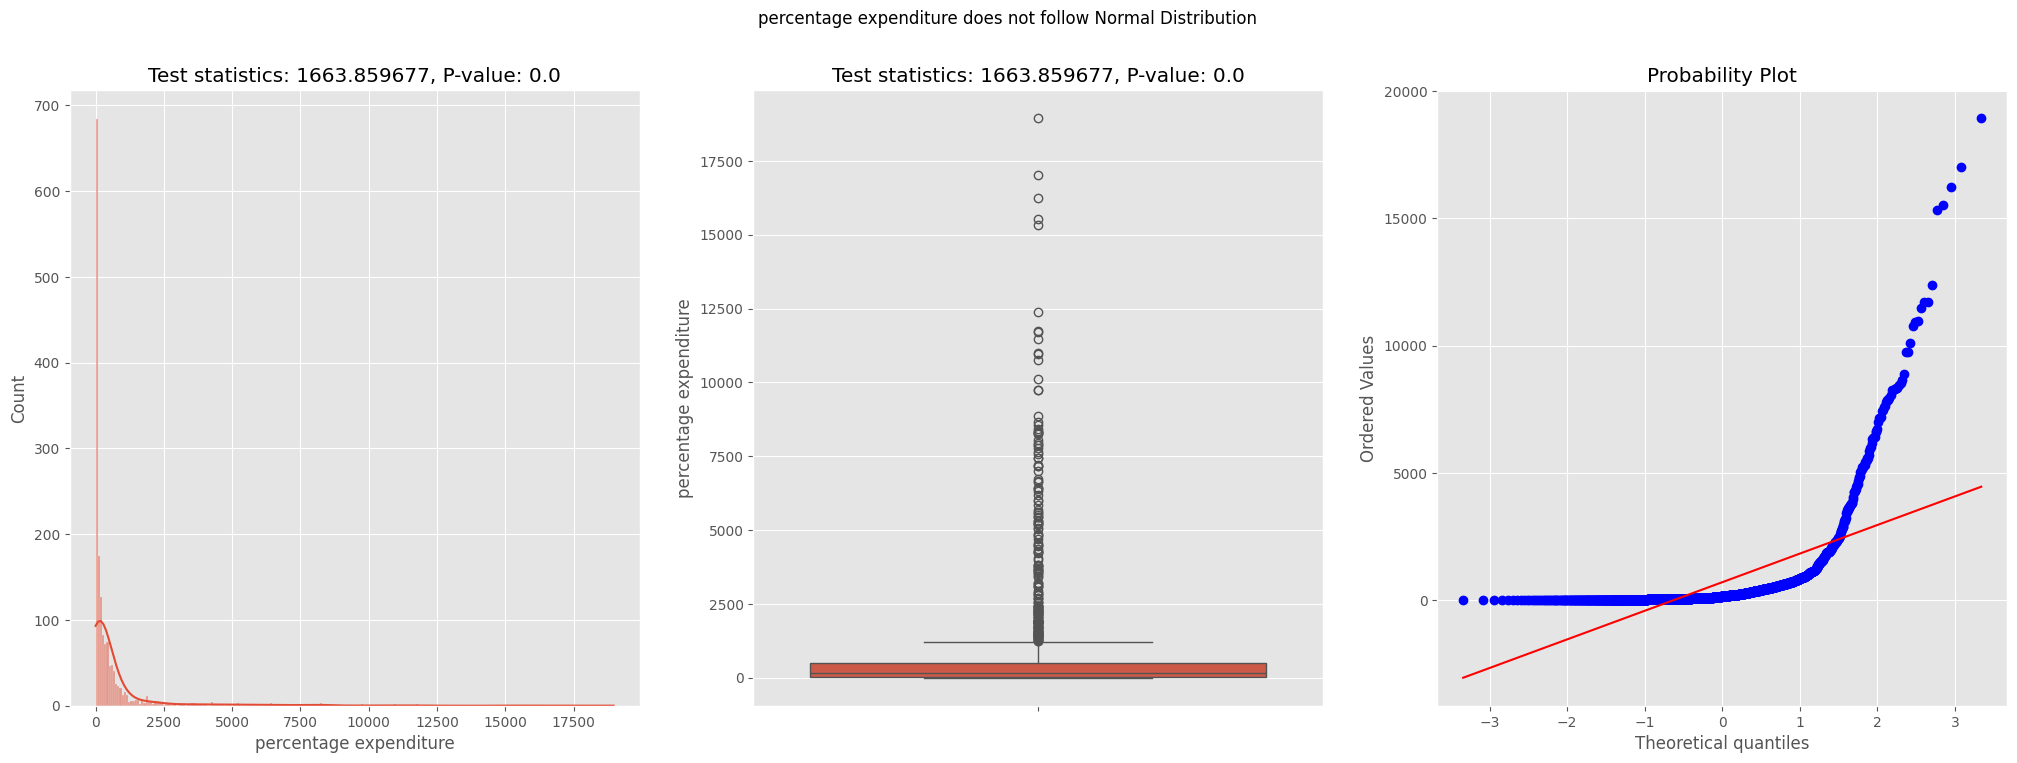

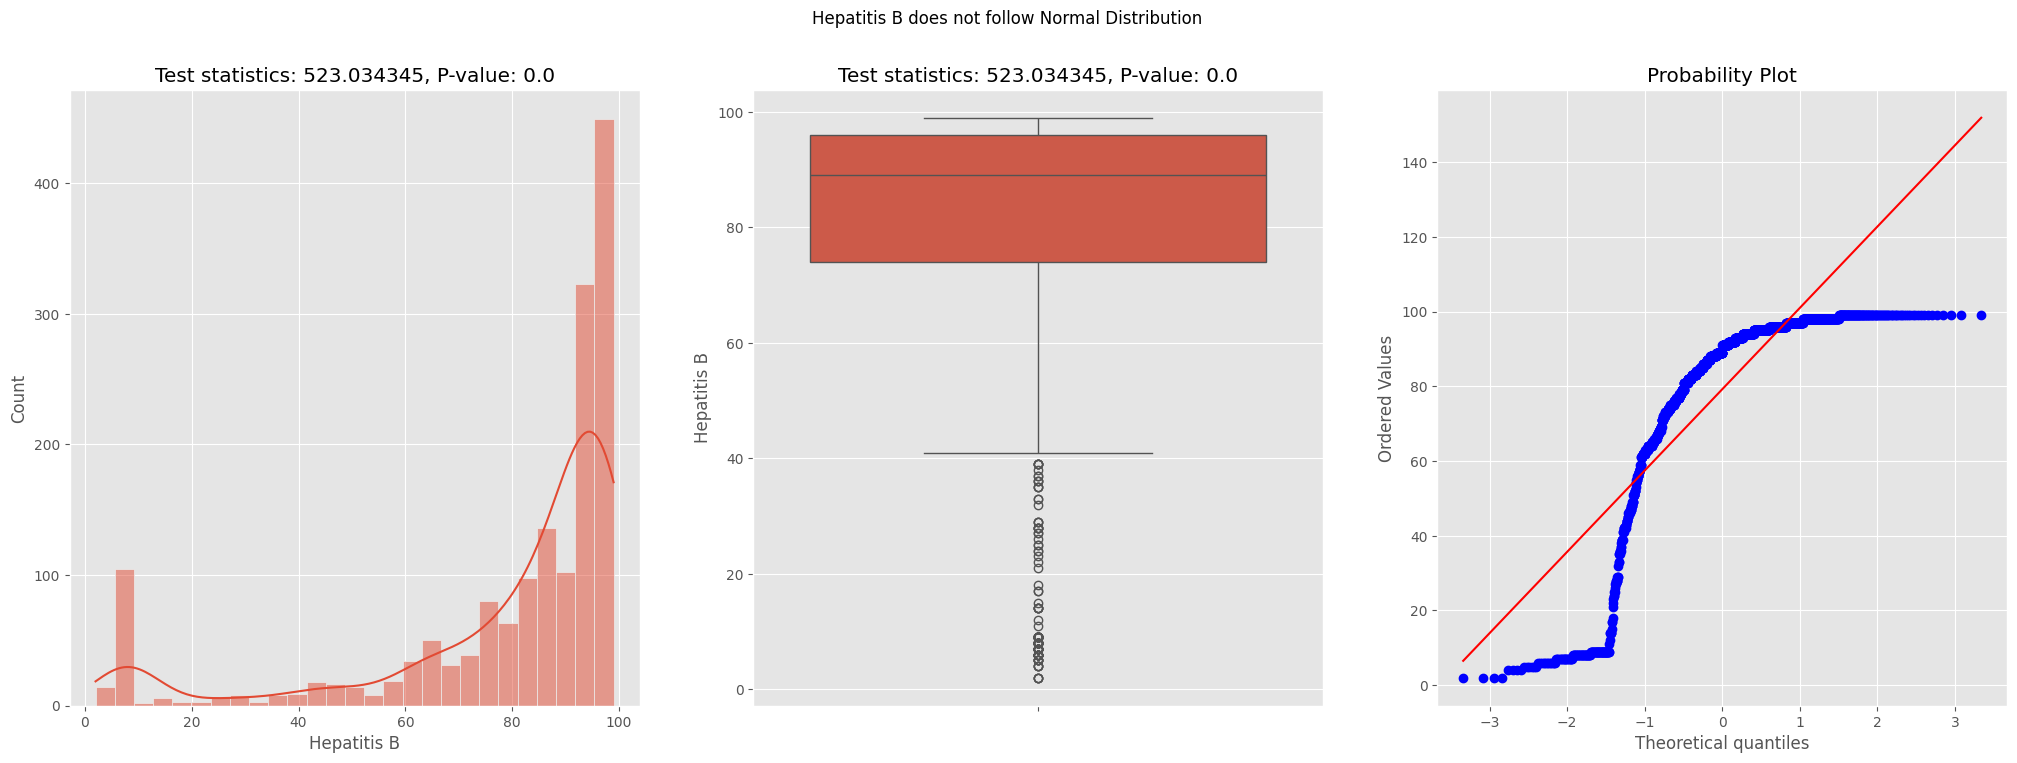

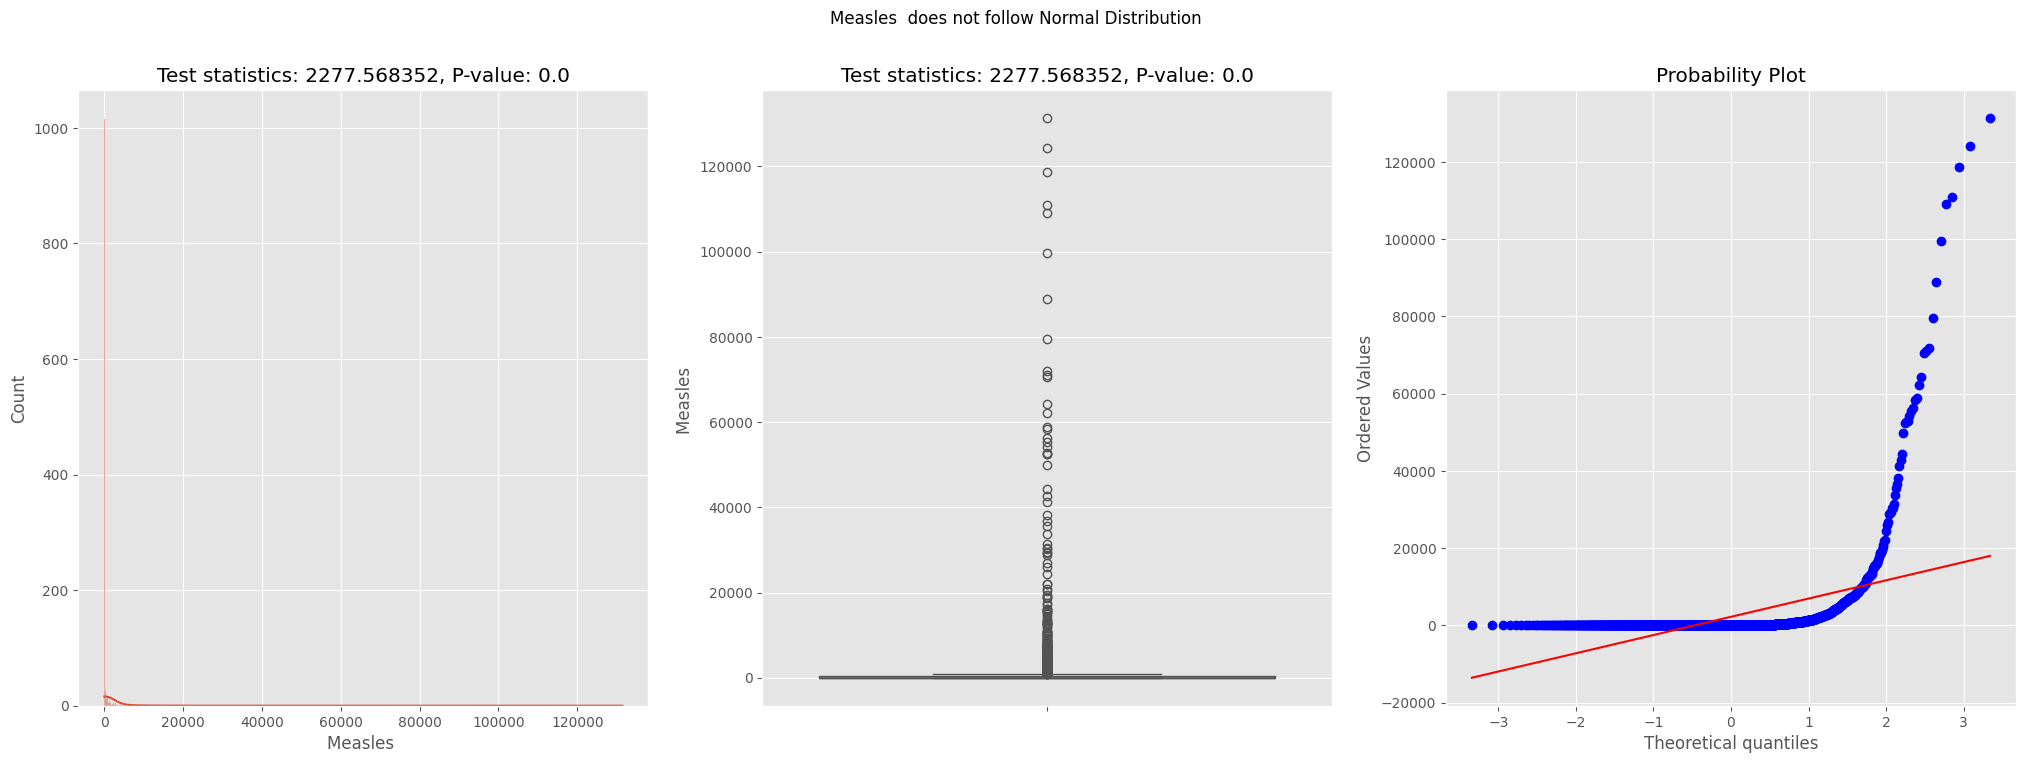

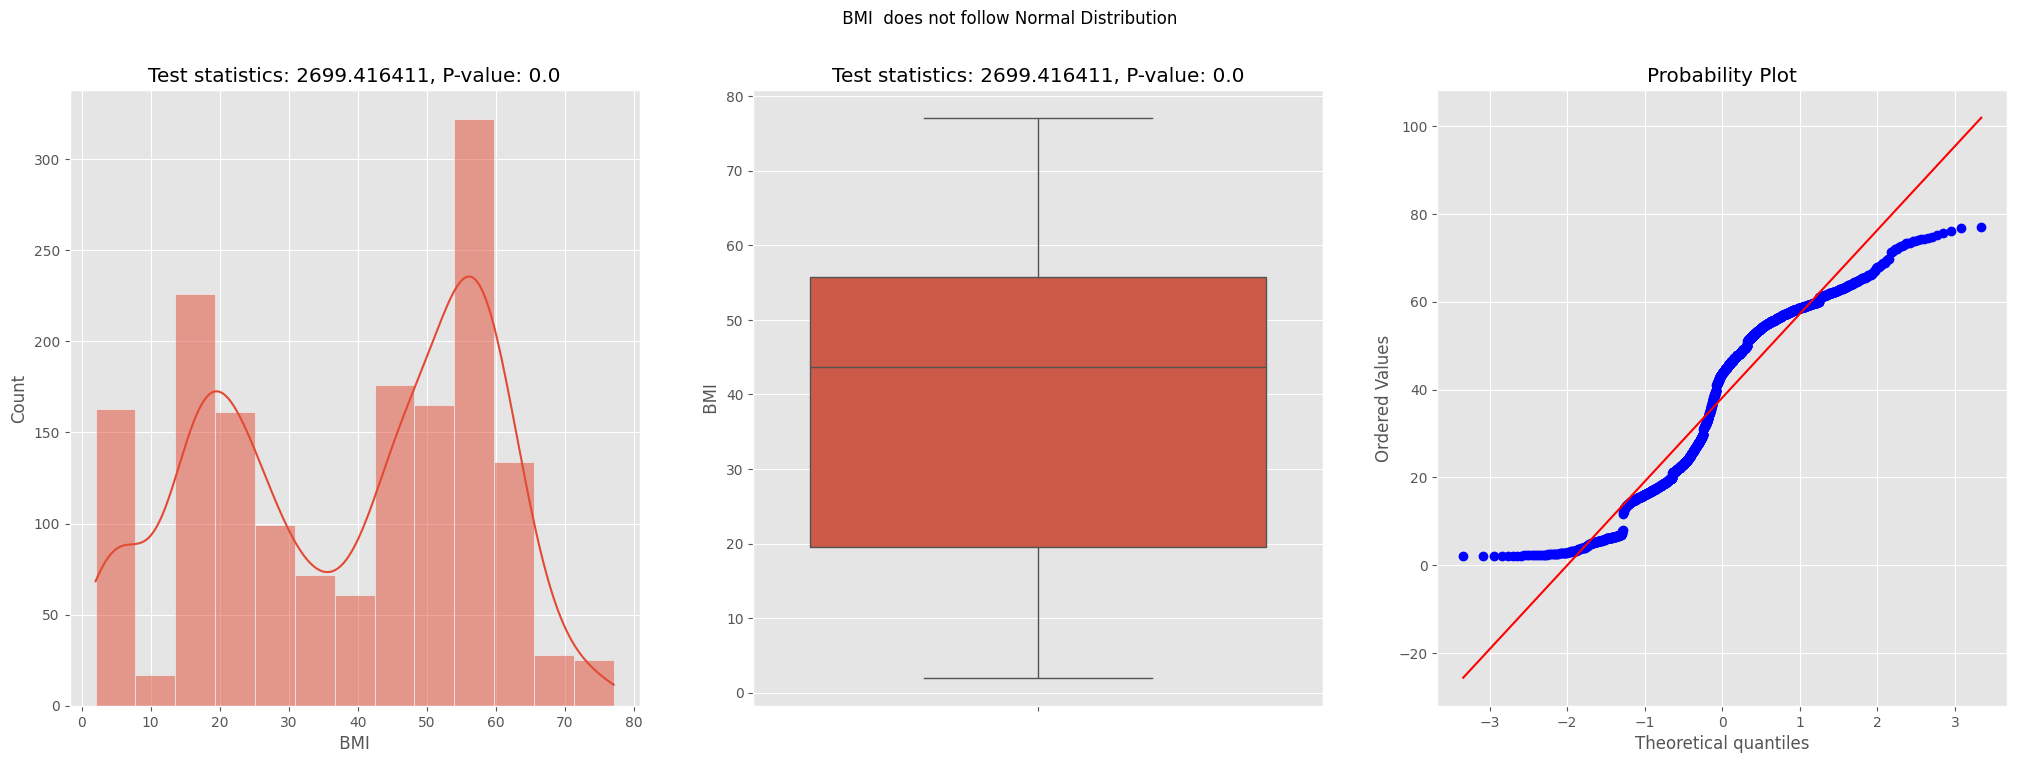

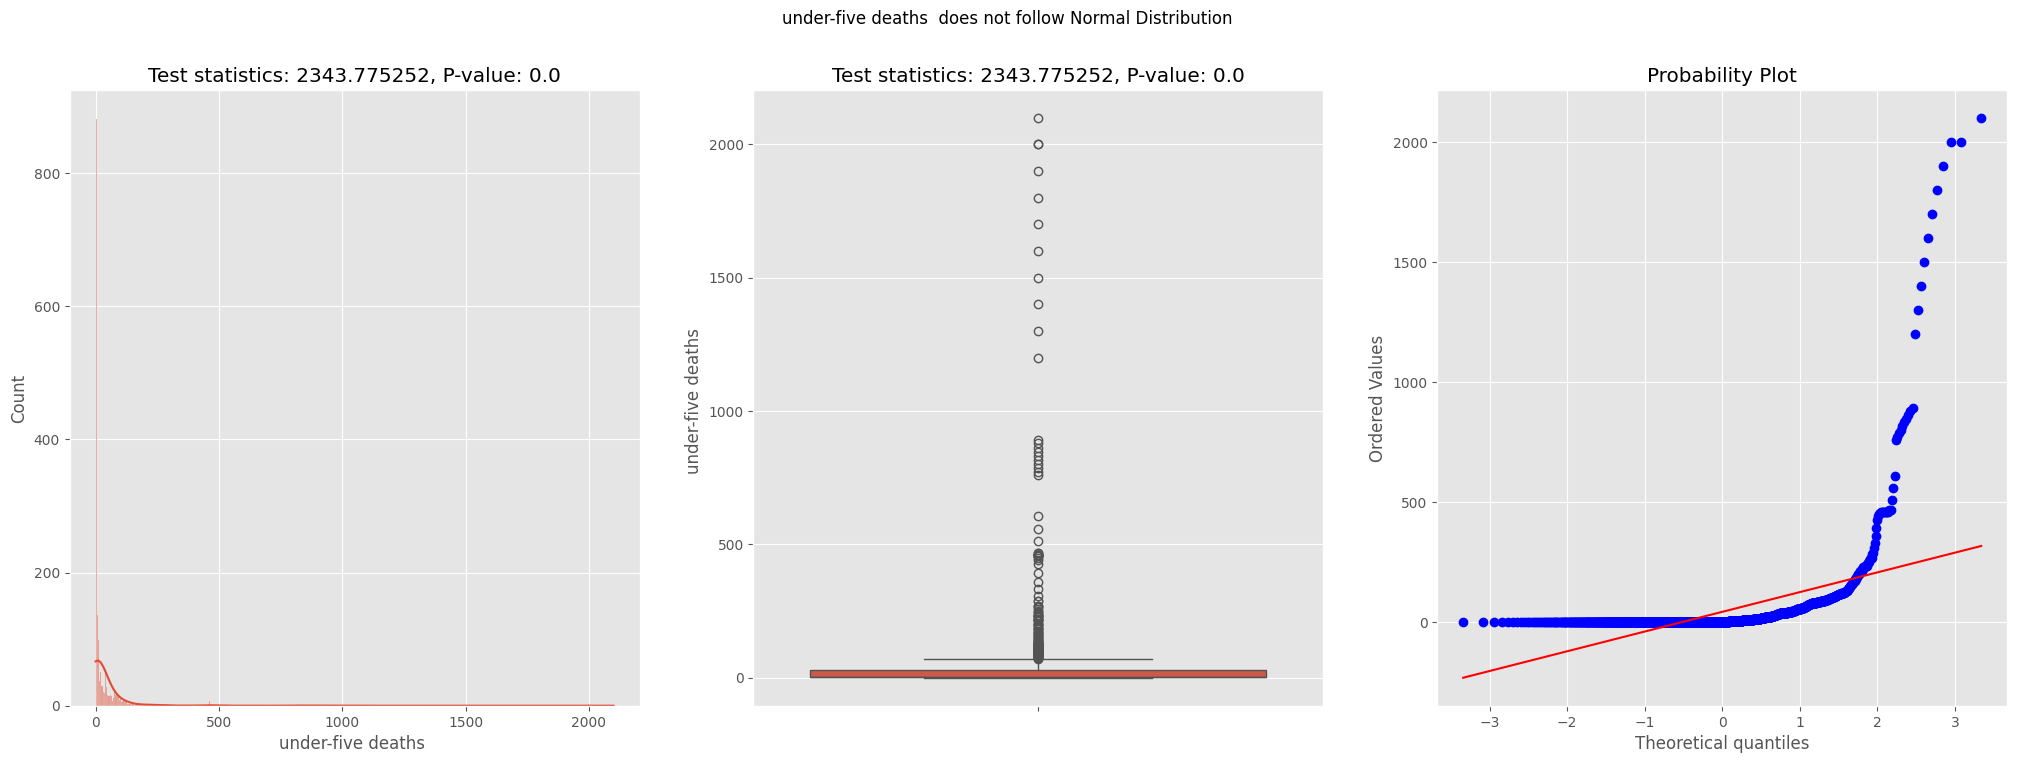

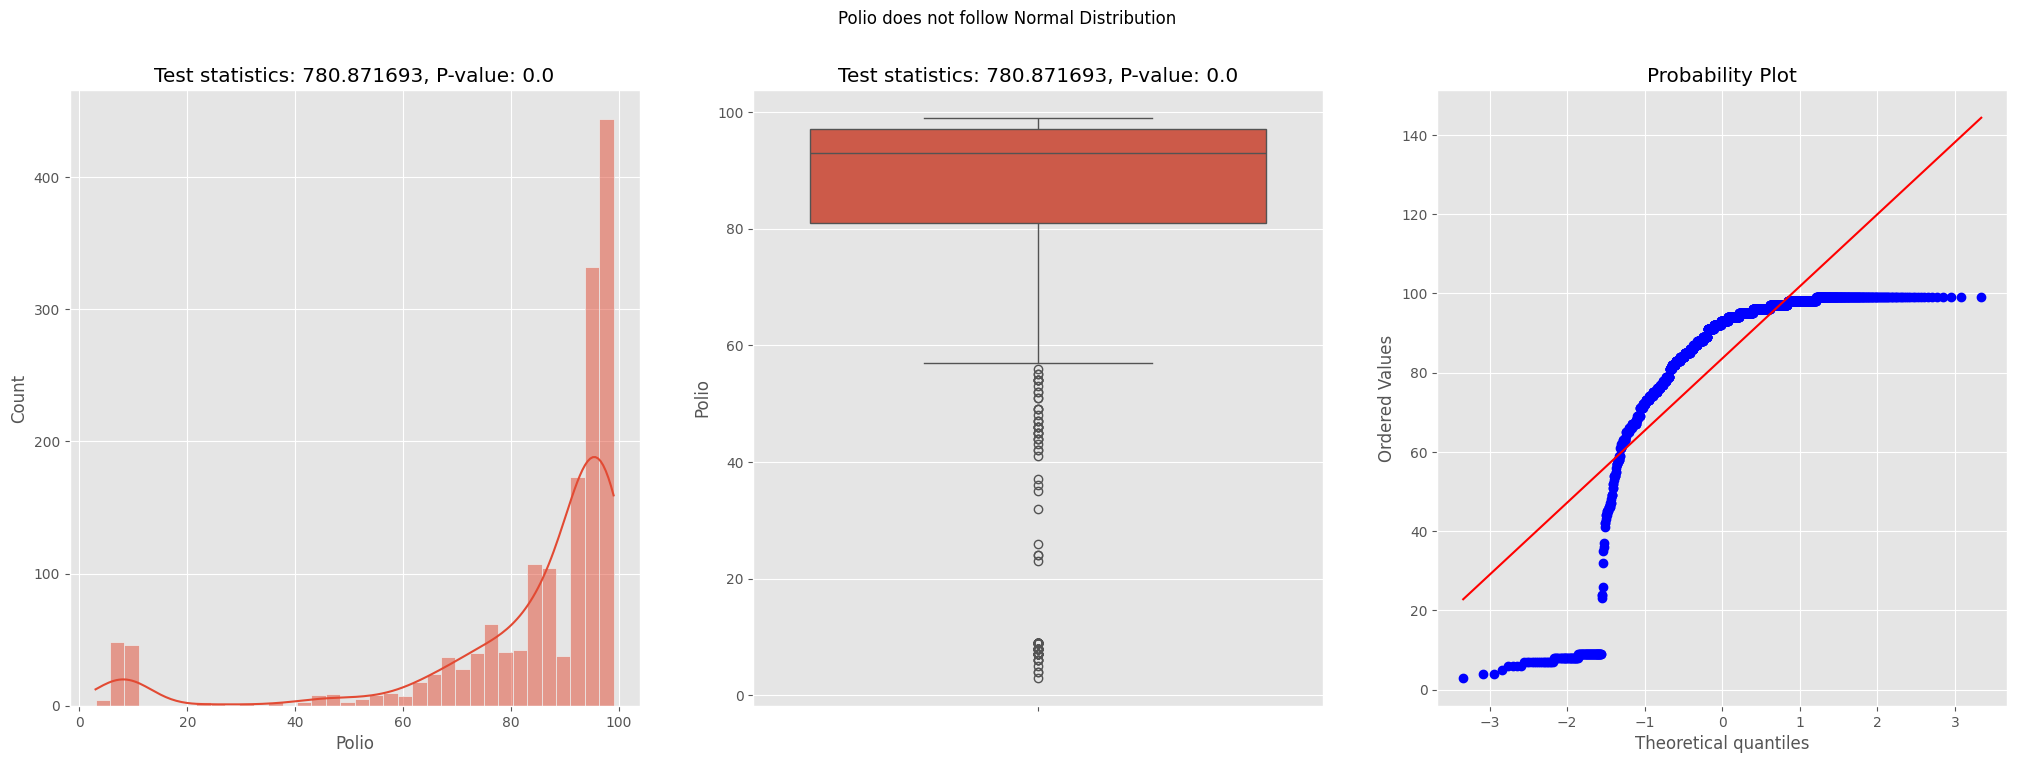

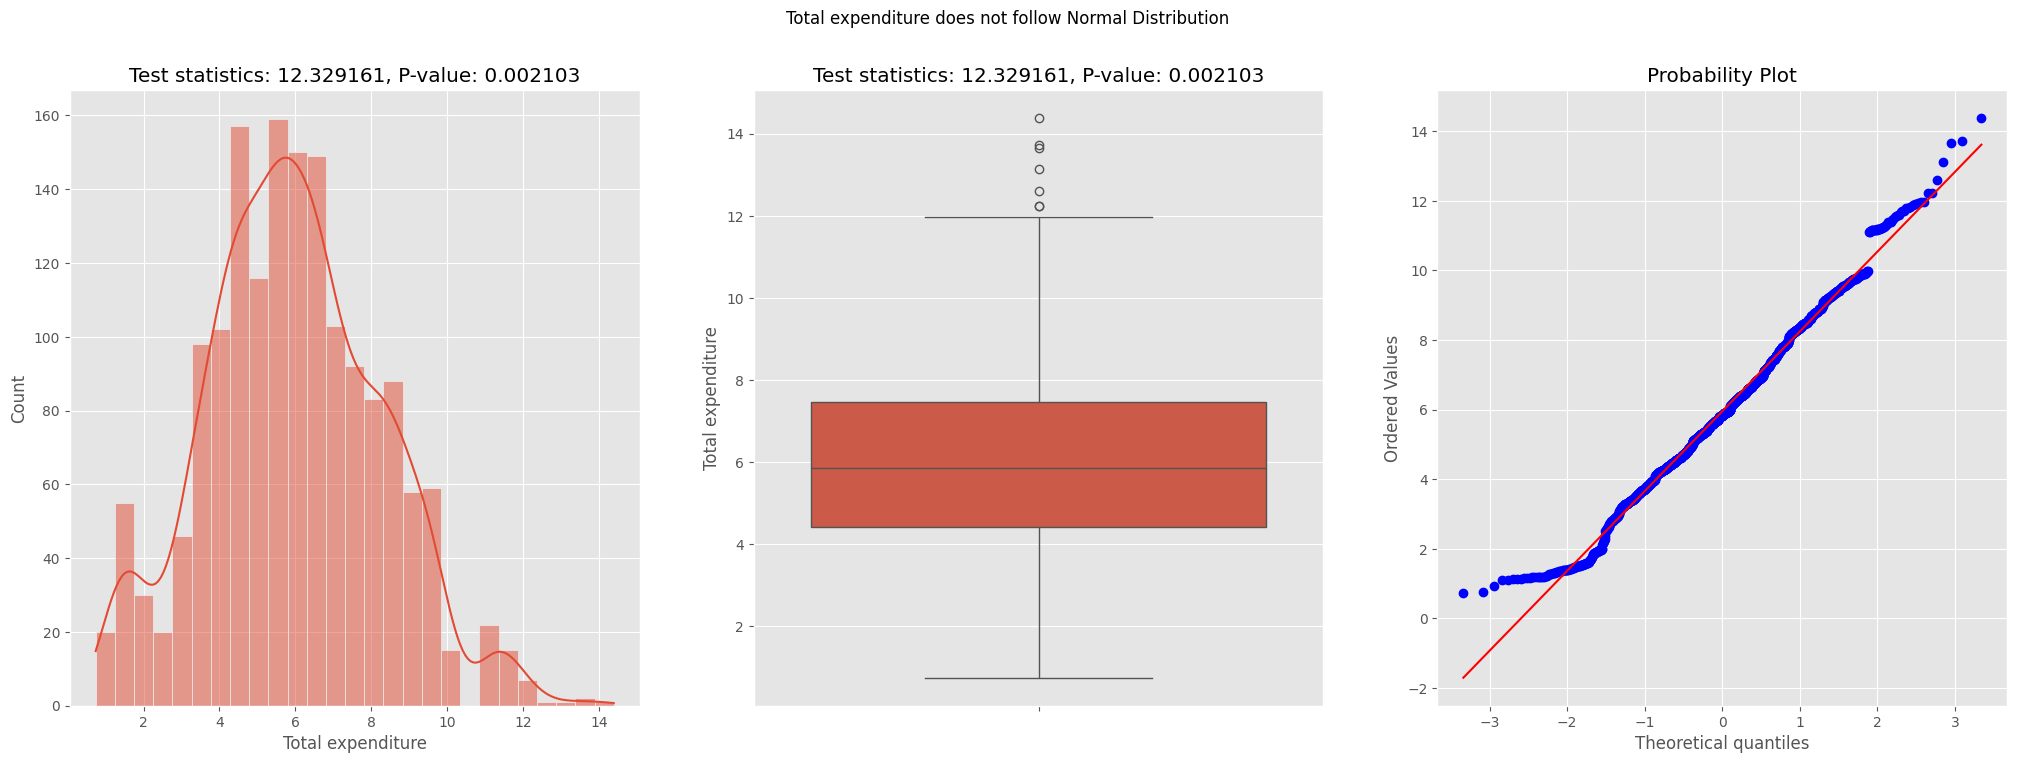

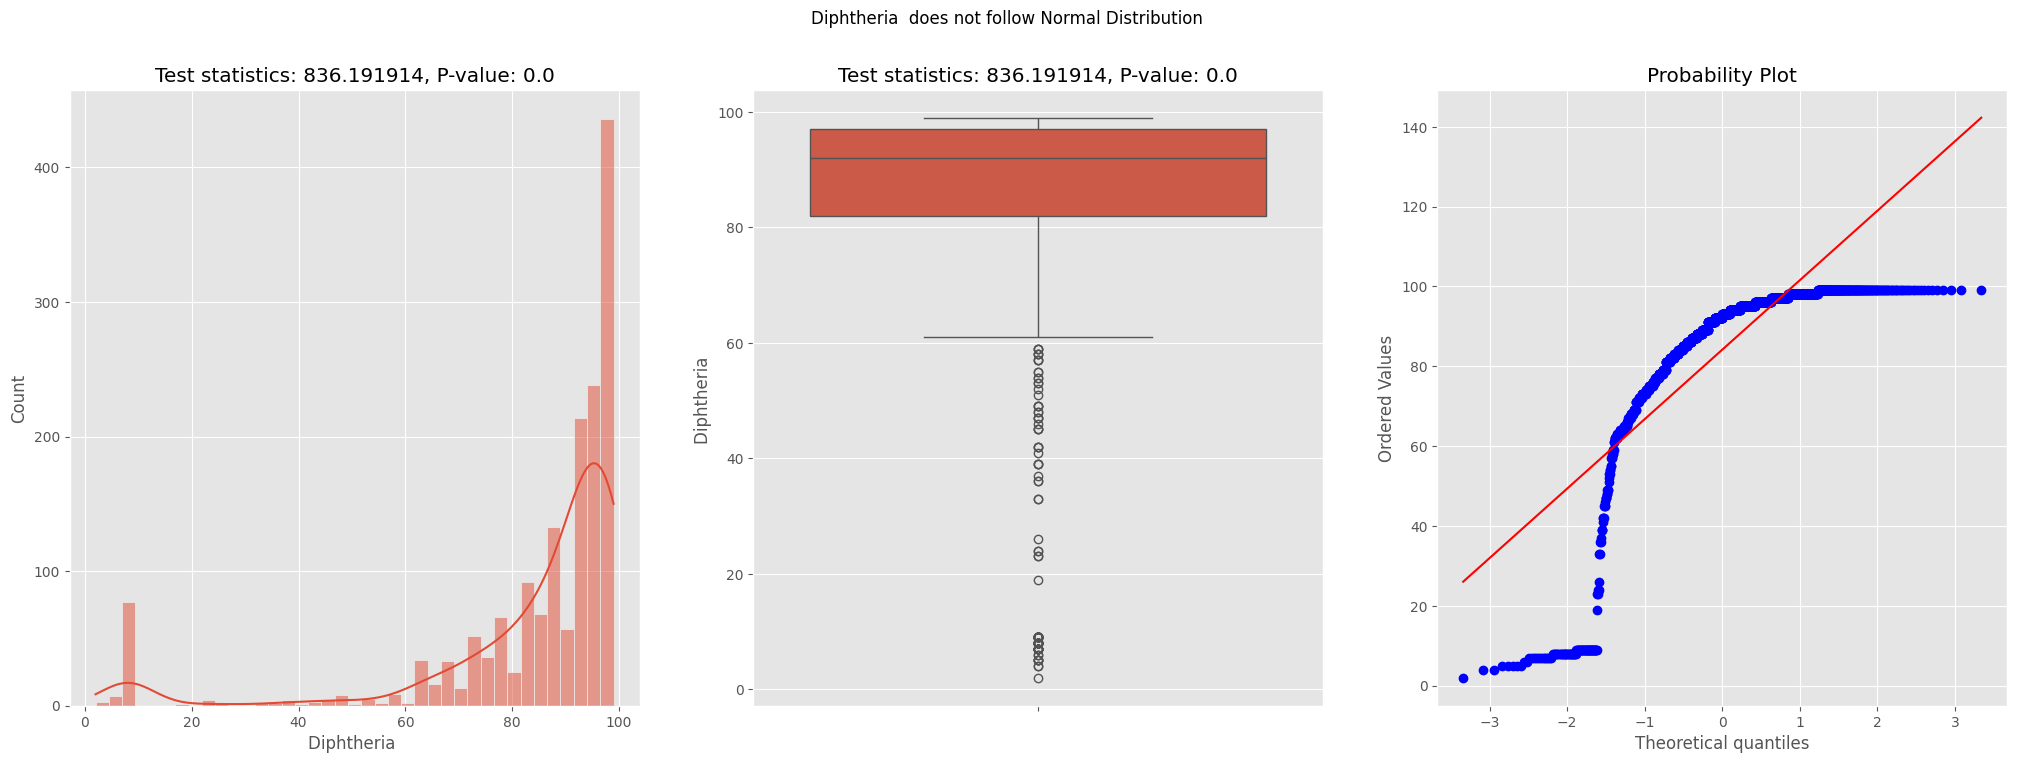

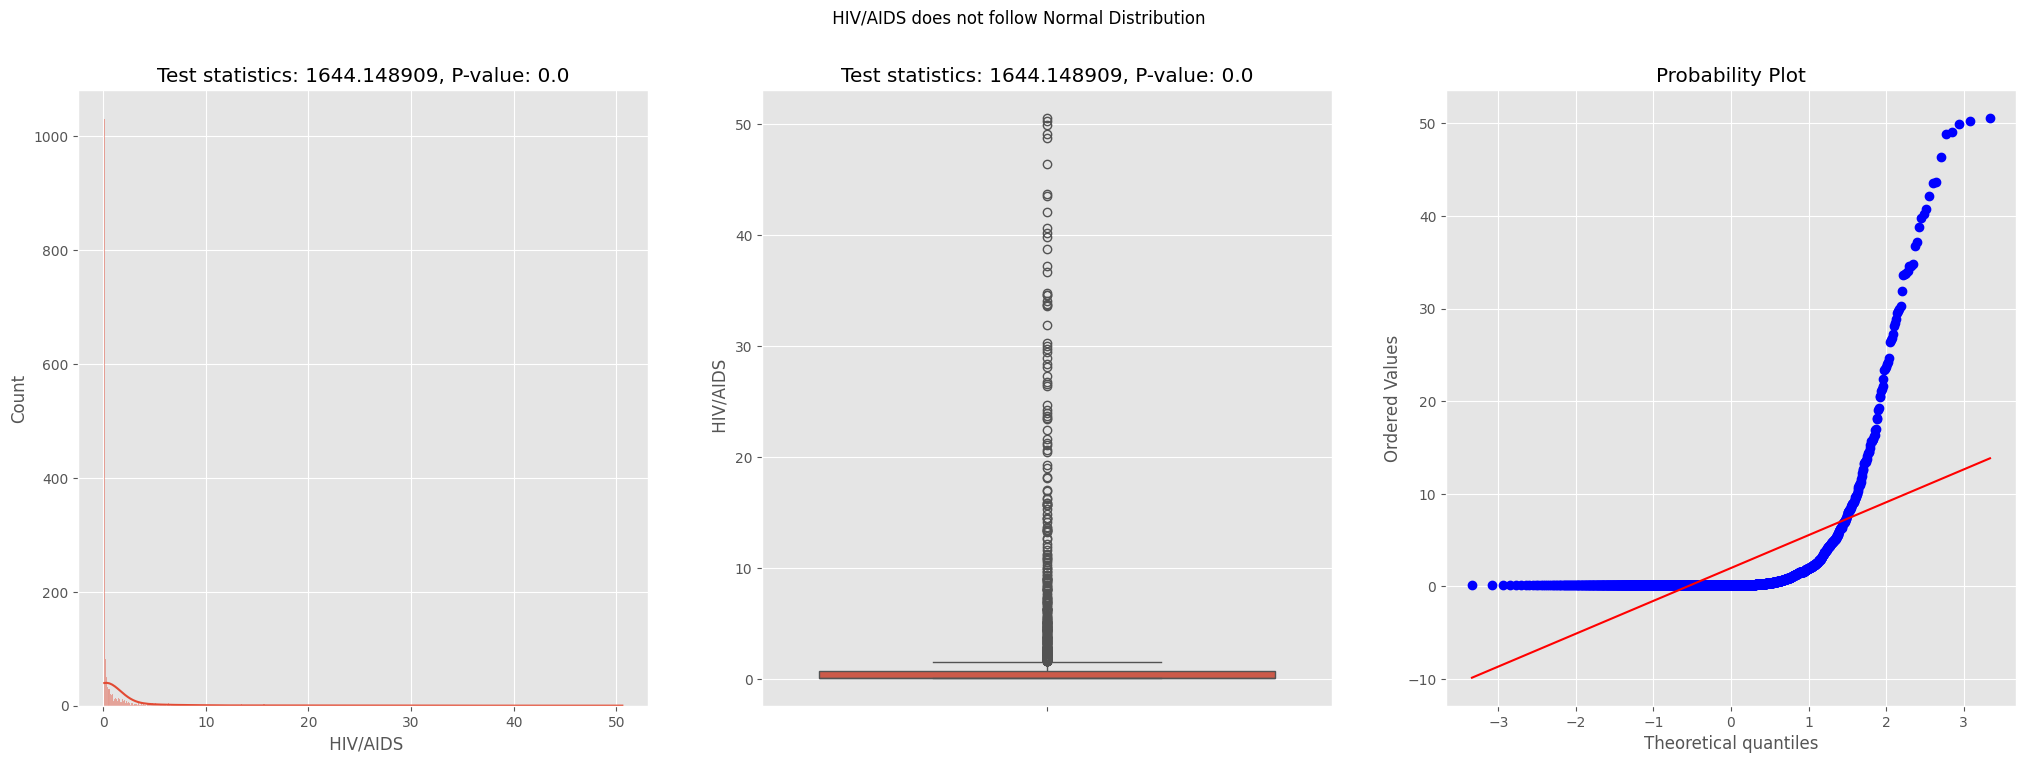

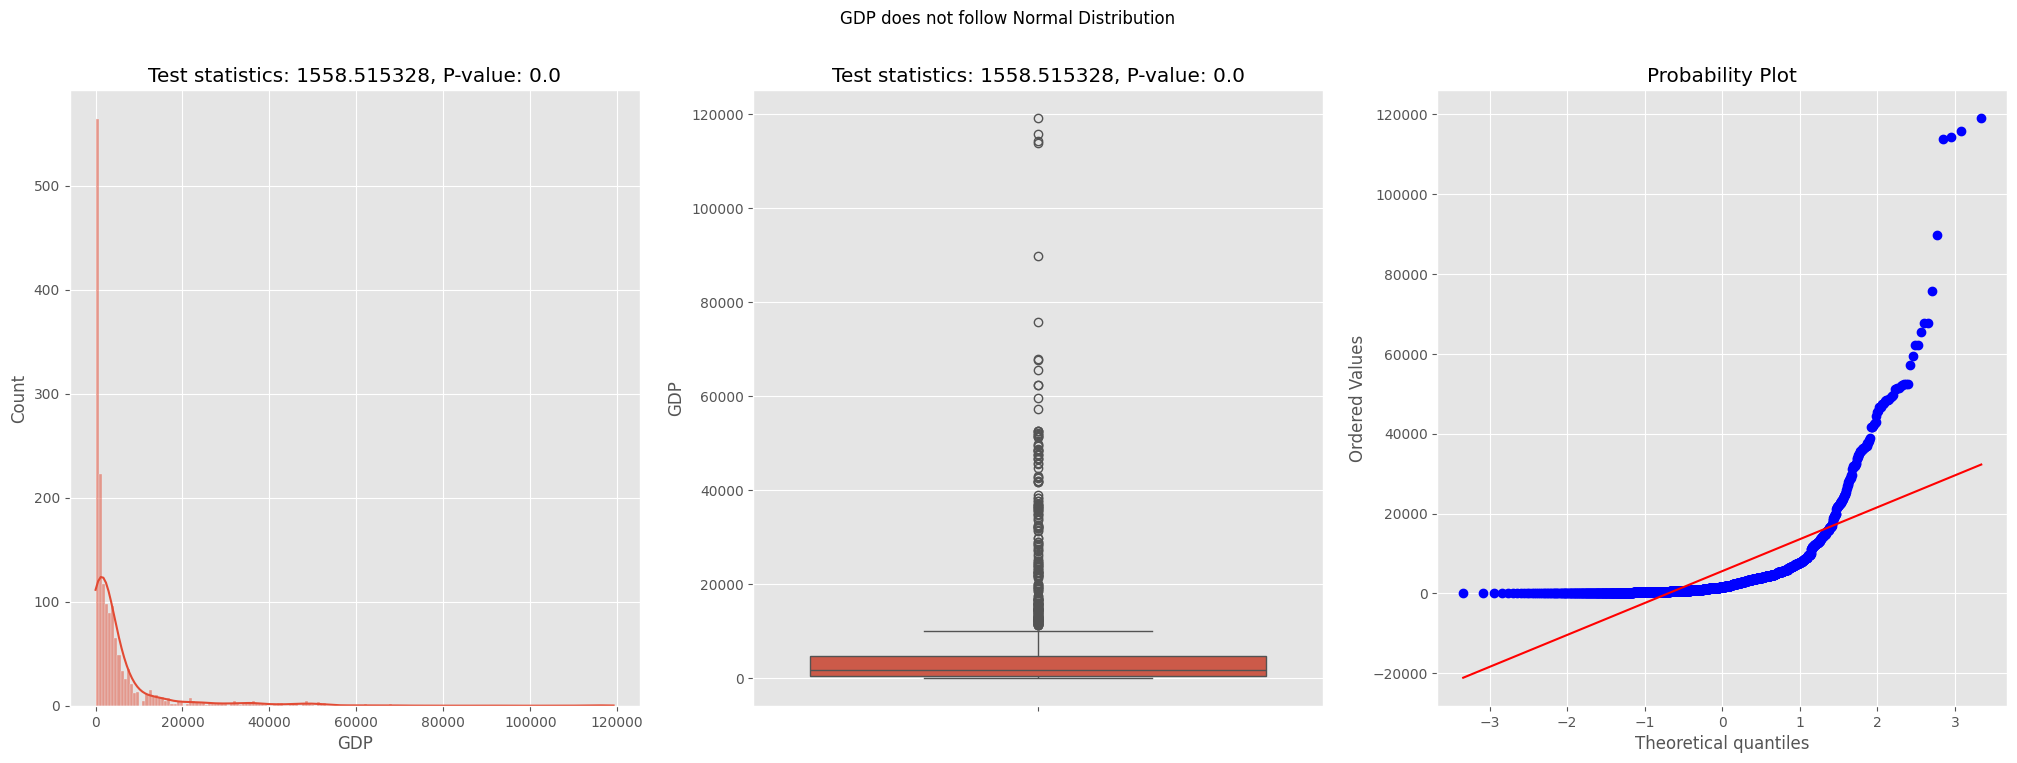

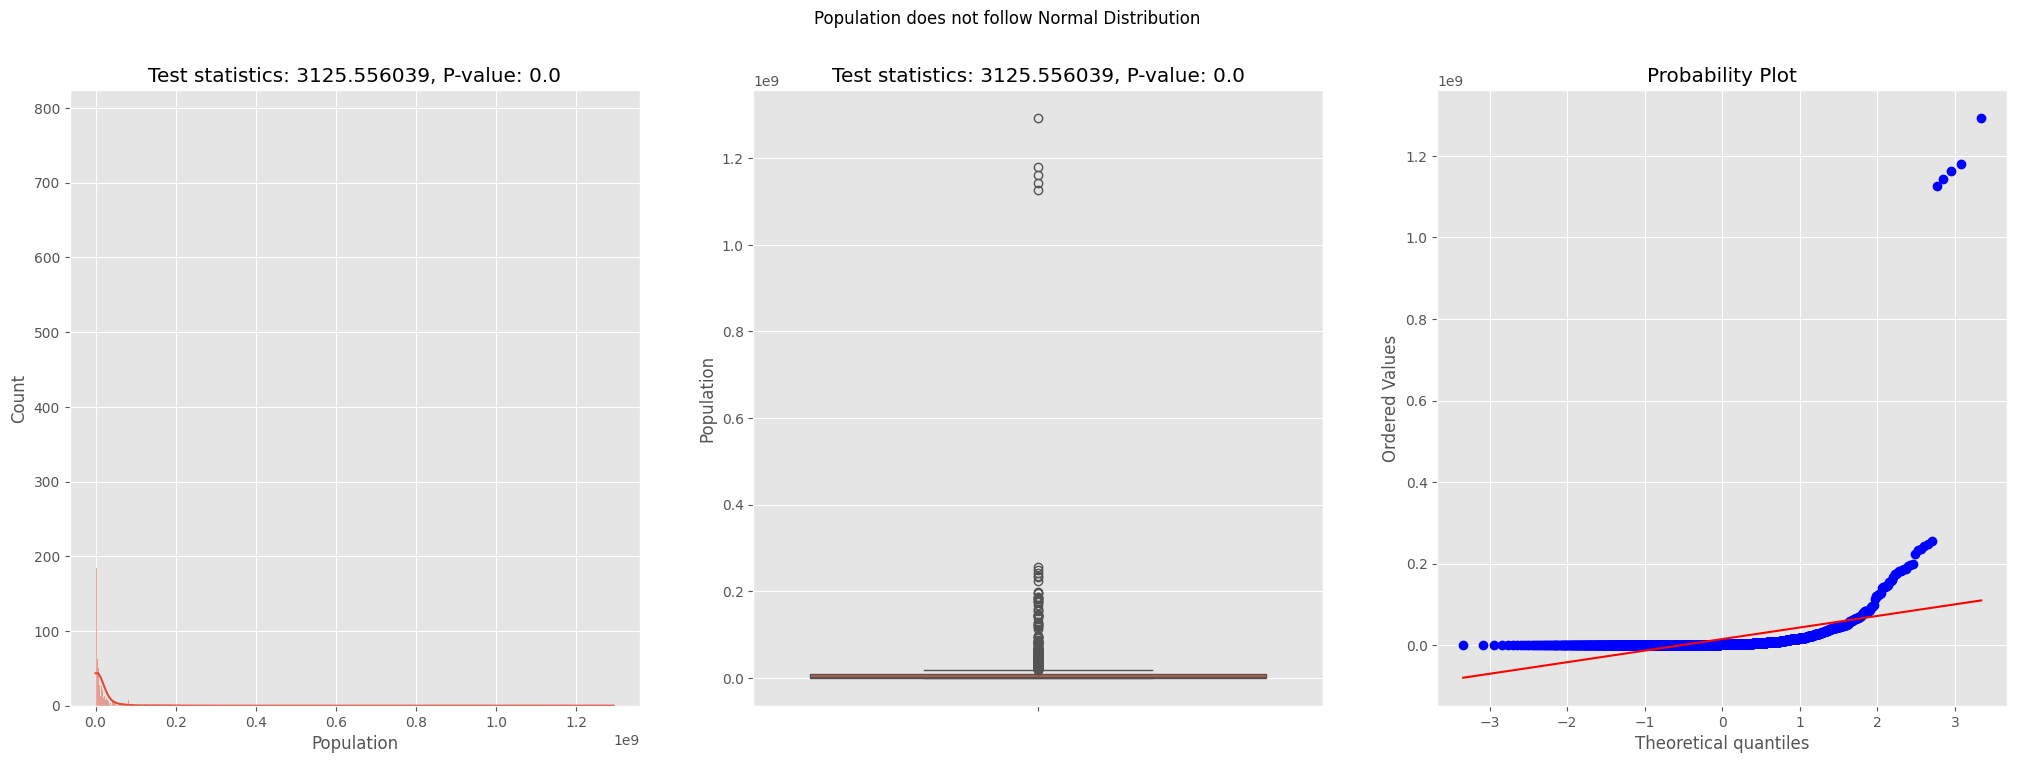

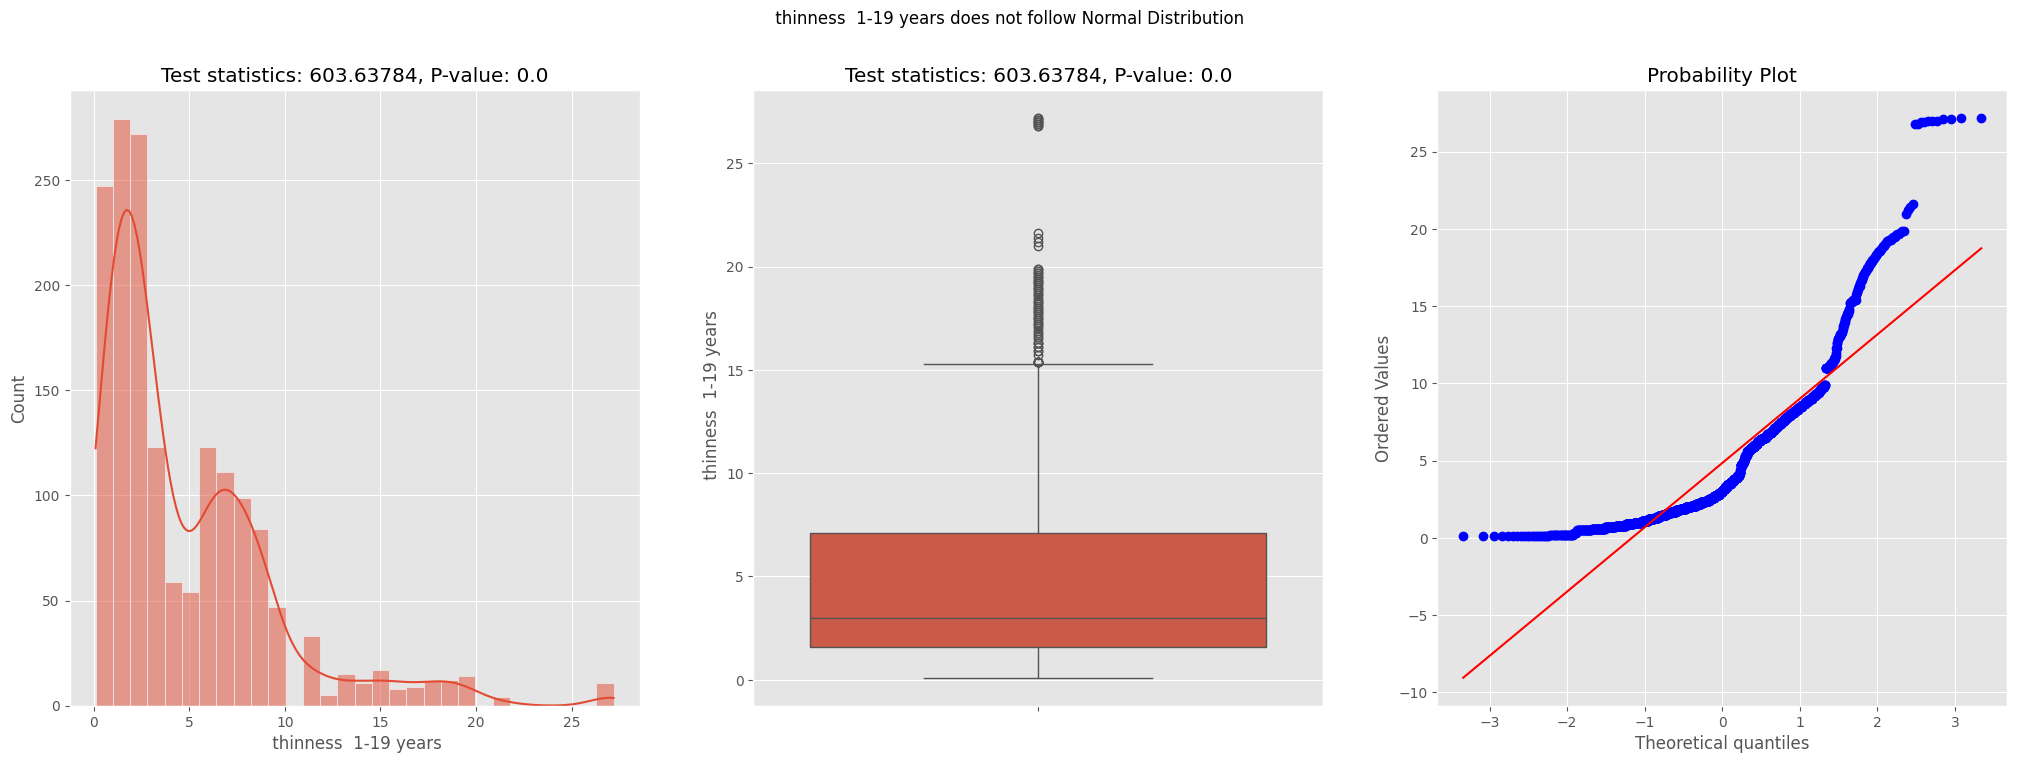

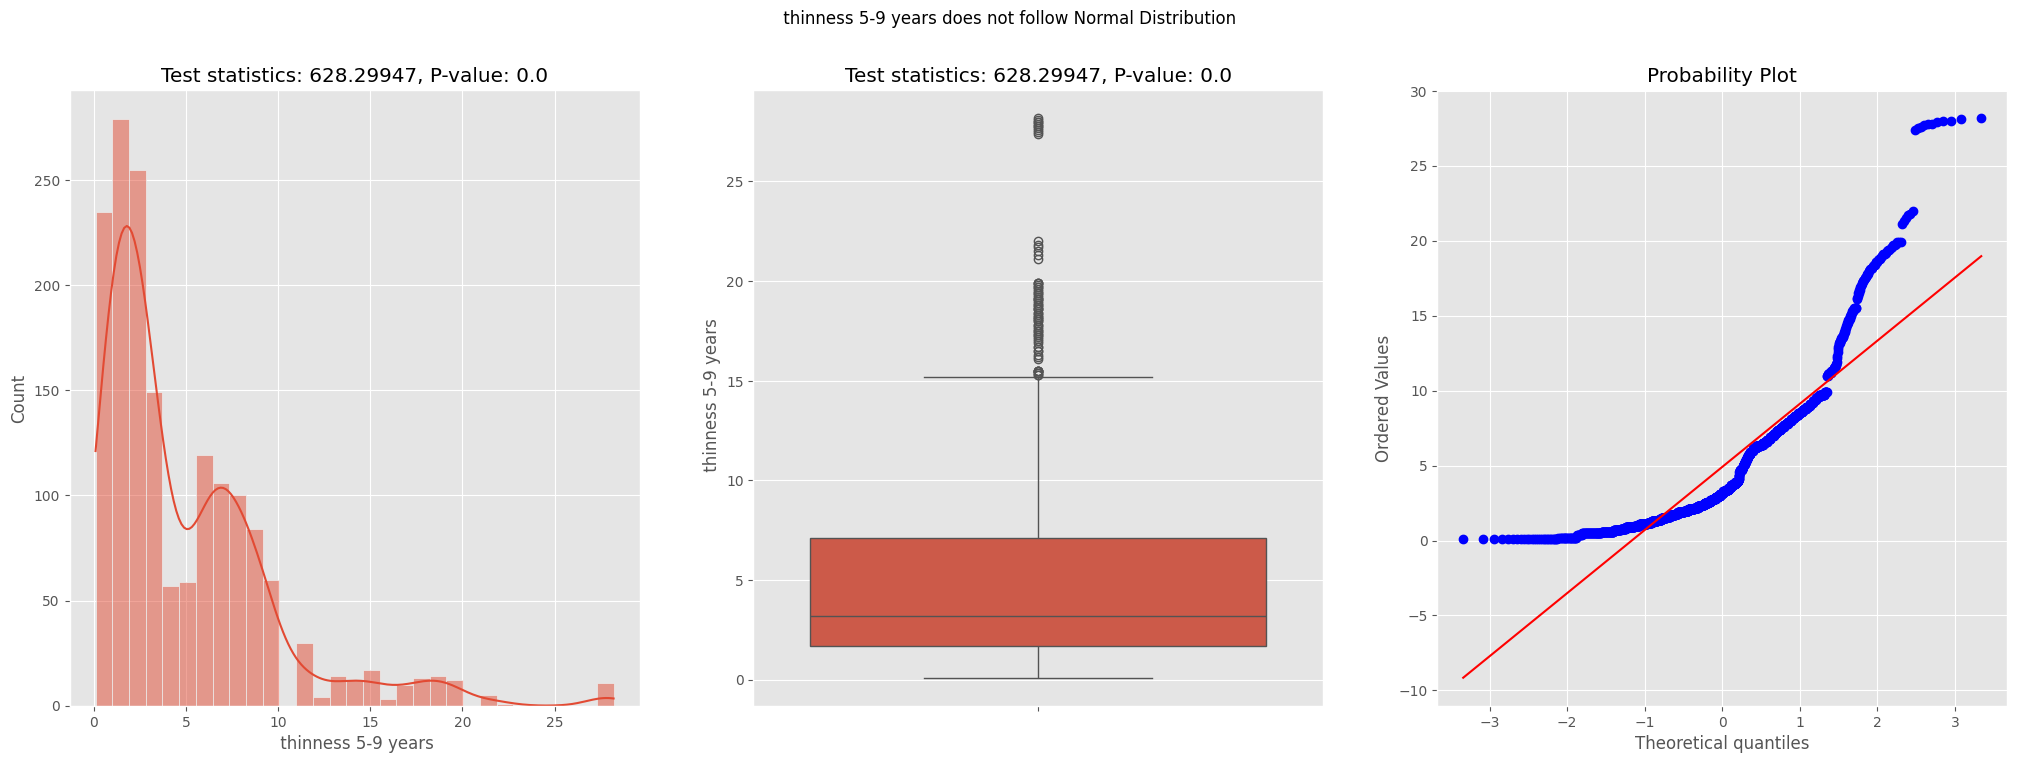

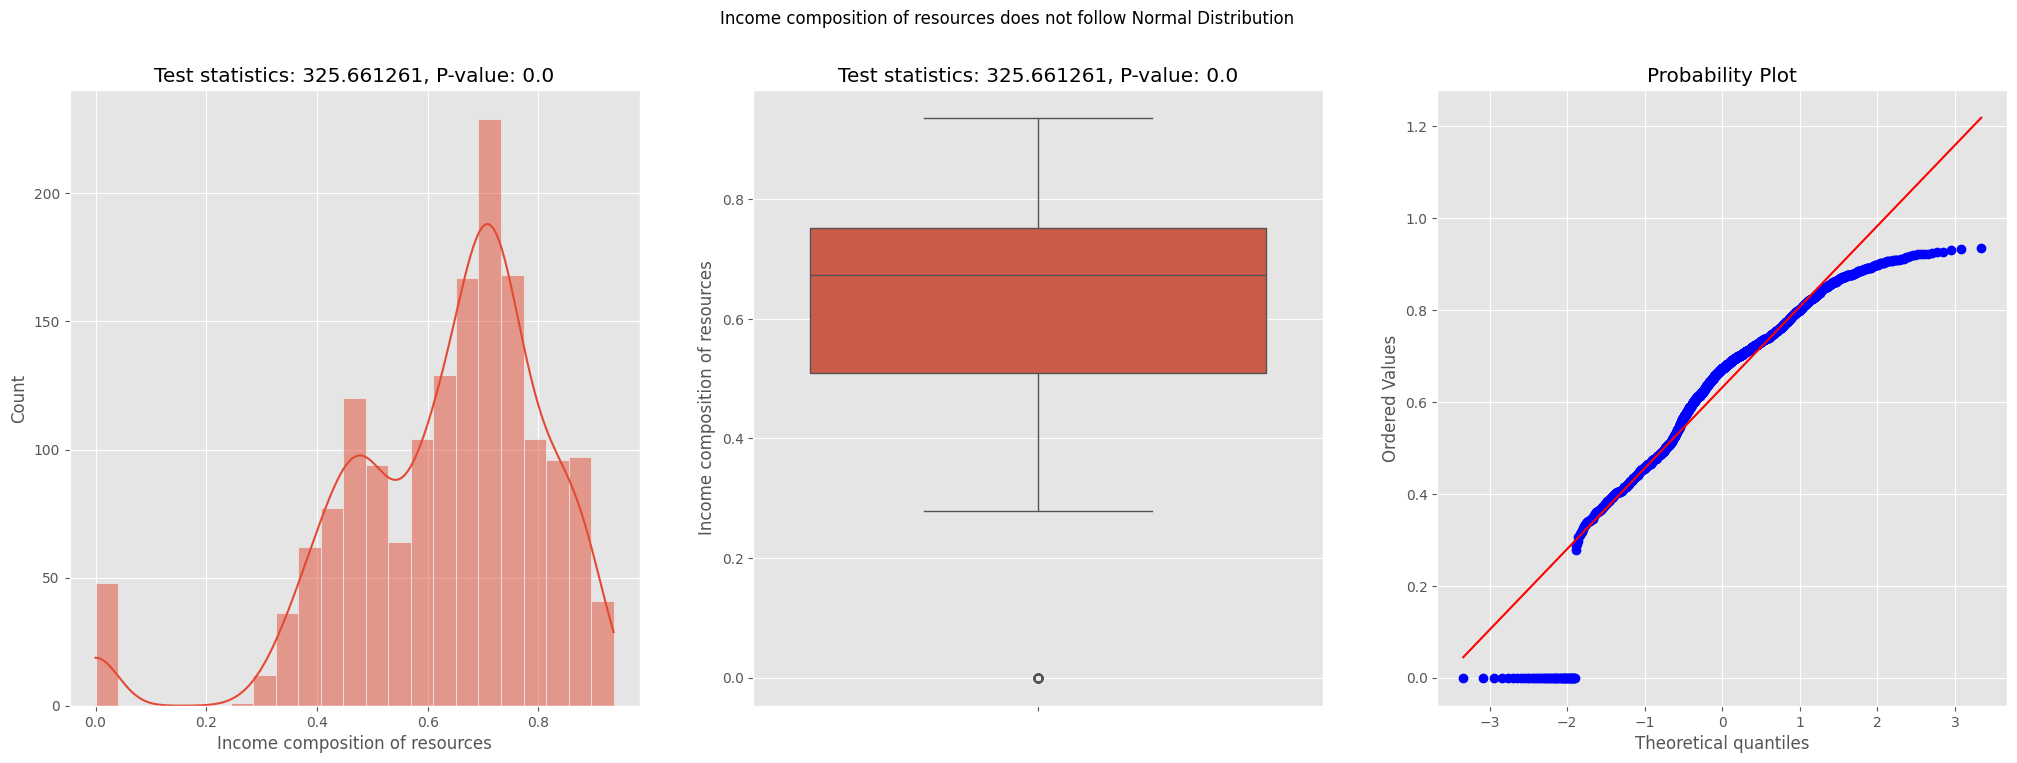

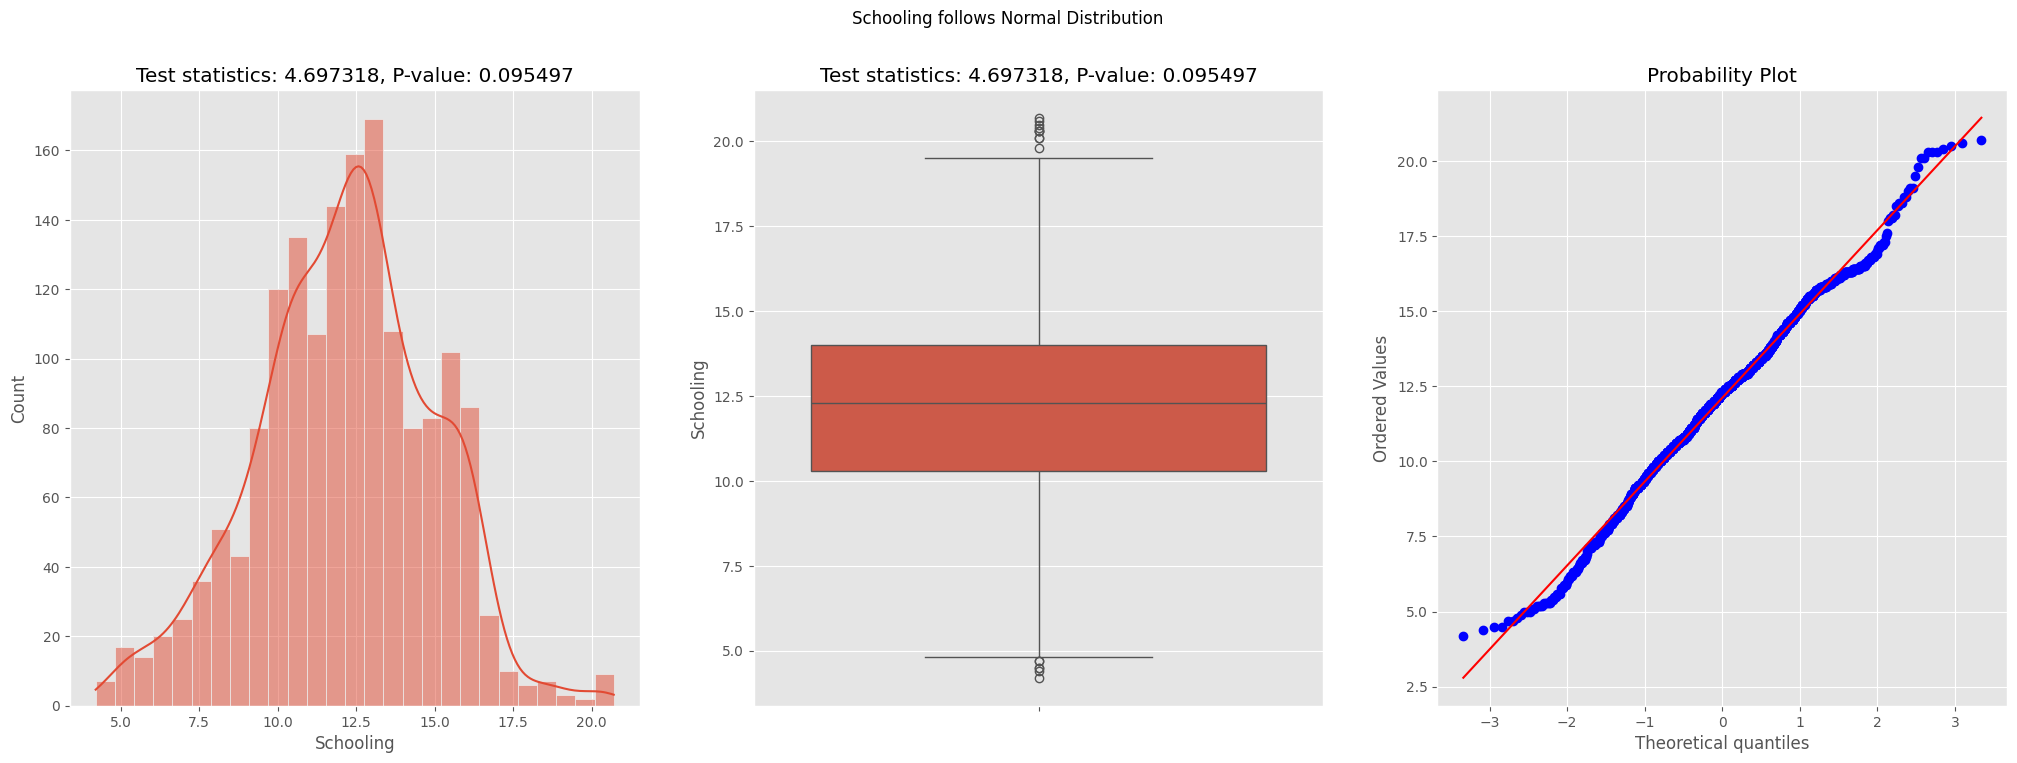

In [27]:

def plotNormalityTest(feature=None,new_data=None):

  fig,ax = plt.subplots(1,3,figsize=(25,8))
  new_data.dropna(inplace=True)
  statistics, p_value = normaltest(new_data[feature])
  ax[0].set_title(f'Test statistics: {np.round(statistics,6)}, P-value: {np.round(p_value,6)}')
  ax[1].set_title(f'Test statistics: {np.round(statistics,6)}, P-value: {np.round(p_value,6)}')
  if p_value <= 0.05:
      fig.suptitle(f'{feature} does not follow Normal Distribution')
  else:
      fig.suptitle(f'{feature} follows Normal Distribution')

  sns.histplot(new_data[feature], ax=ax[0], kde=True)
  sns.boxplot(new_data[feature], ax=ax[1])
  stats.probplot(new_data[feature], plot=ax[2])
  plt.show()
  print('\n\n')

for feature in numericalFeatures:
  plotNormalityTest(feature,data)

#### Observation
  - Skewed (Not following the normal Distribution)
  - Outliers


## Multi-variant Analysis

### Hypotheses for Pearson Correlation Coefficient

In hypothesis testing with Pearson's correlation coefficient \( r \), we typically consider the following hypotheses:

- **Null Hypothesis (\( H_0 \)):**
  The null hypothesis states that there is no significant linear relationship between the two variables being studied.
  \[ H_0: r = 0 \]

- **Alternative Hypothesis (\( H_1 \)):**
  The alternative hypothesis contradicts the null hypothesis and suggests that there is a significant linear relationship between the two variables.
  \[ H_1: r \neq 0 \]
  (Or depending on the research question, it could be one-tailed, either positive or negative.)

When conducting hypothesis testing using Pearson's correlation coefficient, we aim to determine whether the observed correlation coefficient is significantly different from zero. If the p-value associated with the correlation coefficient is smaller than a predetermined significance level (often denoted as \( \alpha \)), typically 0.05, then we reject the null hypothesis in favor of the alternative hypothesis, concluding that there is evidence of a significant linear relationship between the variables. Otherwise, if the p-value is greater than \( \alpha \), we fail to reject the null hypothesis, suggesting insufficient evidence to claim a significant linear relationship.


In [28]:
def pearsonrTestPlot(feature,target,new_data):
  new_data = new_data.dropna()
  fig, ax = plt.subplots(1, 2, figsize=(20, 4))
  statistics,p_value = pearsonr(new_data[feature], new_data[target])
  if p_value < 0.05:
    fig.suptitle(f'{feature} and {target} are probabily dependent p-value : {np.round(p_value,5)}')
  else:
    fig.suptitle(f'{feature} and {target} are probabily Independent p-value : {np.round(p_value,5)}')

  # Plot a scatter plot in the first subplot (ax[0])
  ax[0].scatter(new_data[feature], new_data[target])
  ax[0].set_xlabel(f'{feature}')
  ax[0].set_ylabel(f'{target}')

  # Using Seaborn to create a regression plot in the second subplot (ax[1])
  sns.regplot(data=new_data, x=new_data[feature], y=new_data[target], ax=ax[1])
  ax[1].set_xlabel(f'{feature}')
  ax[1].set_ylabel(f'{target}')

  plt.show()
  print('\n\n')

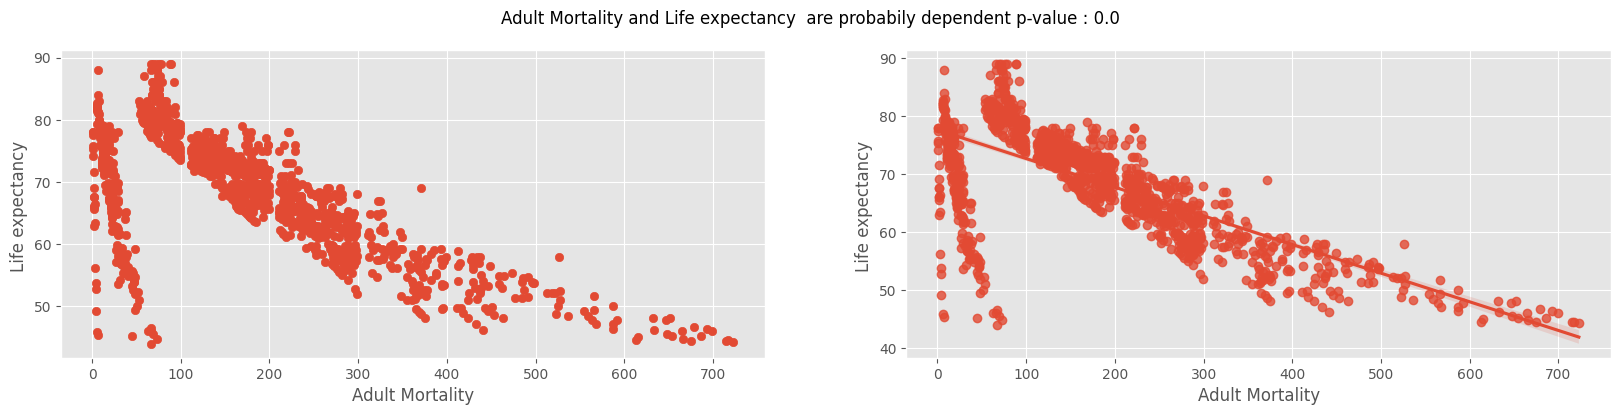

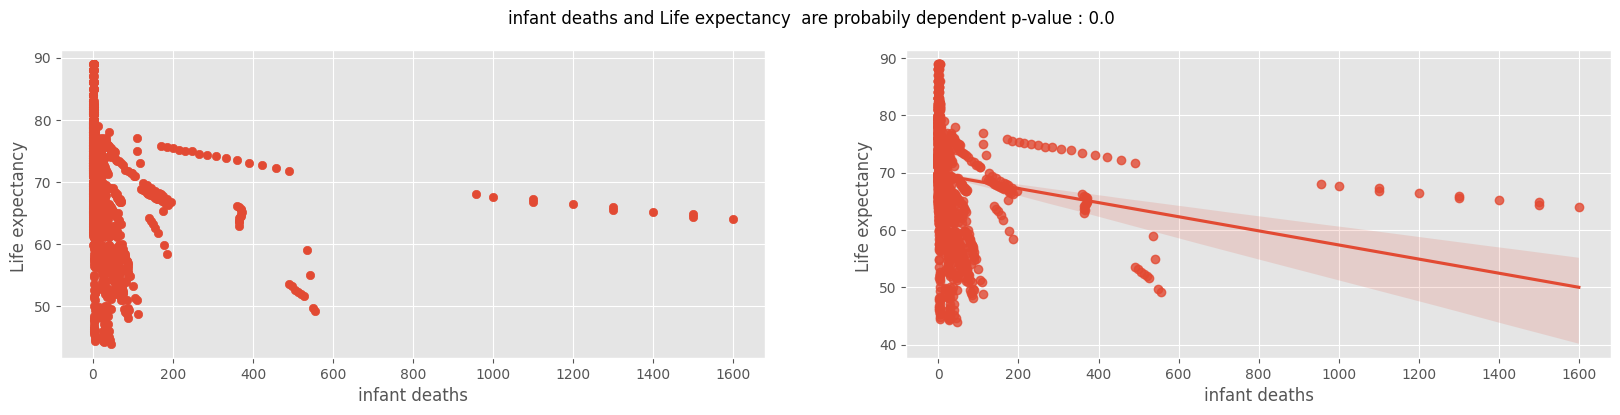

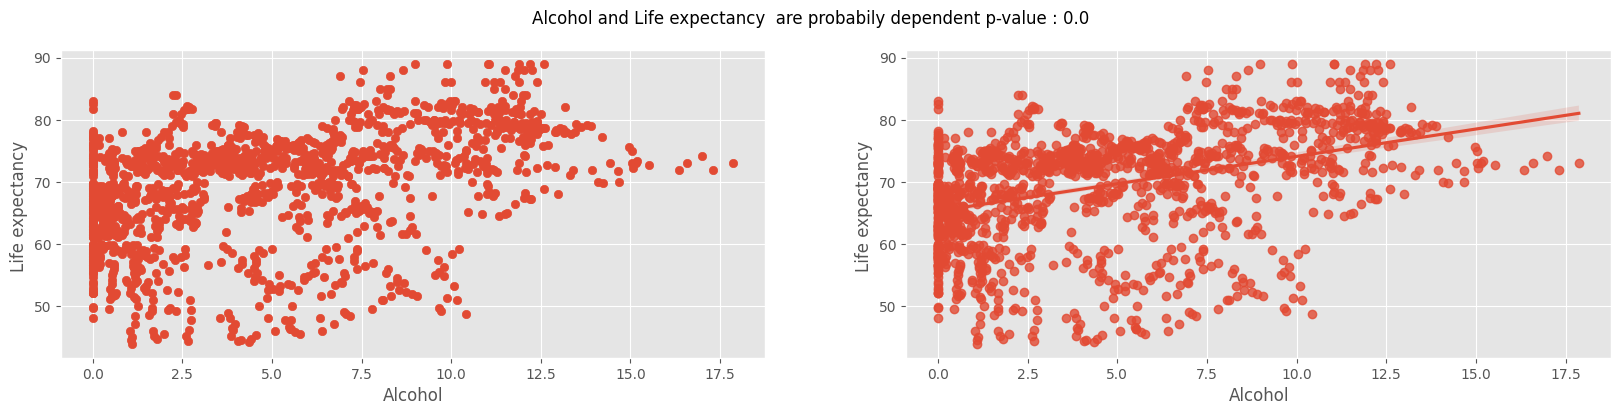

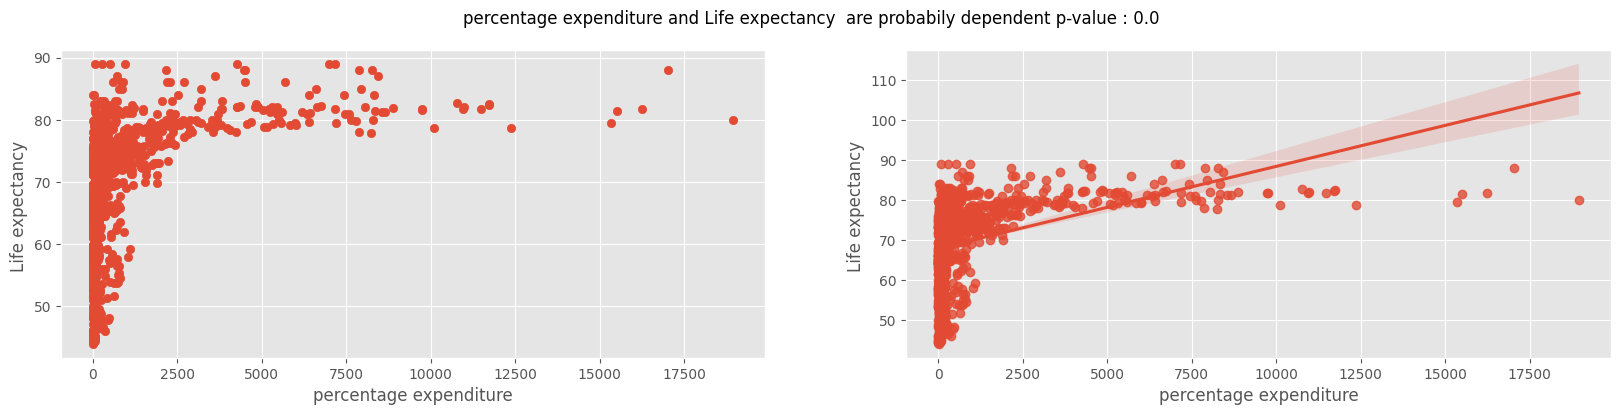

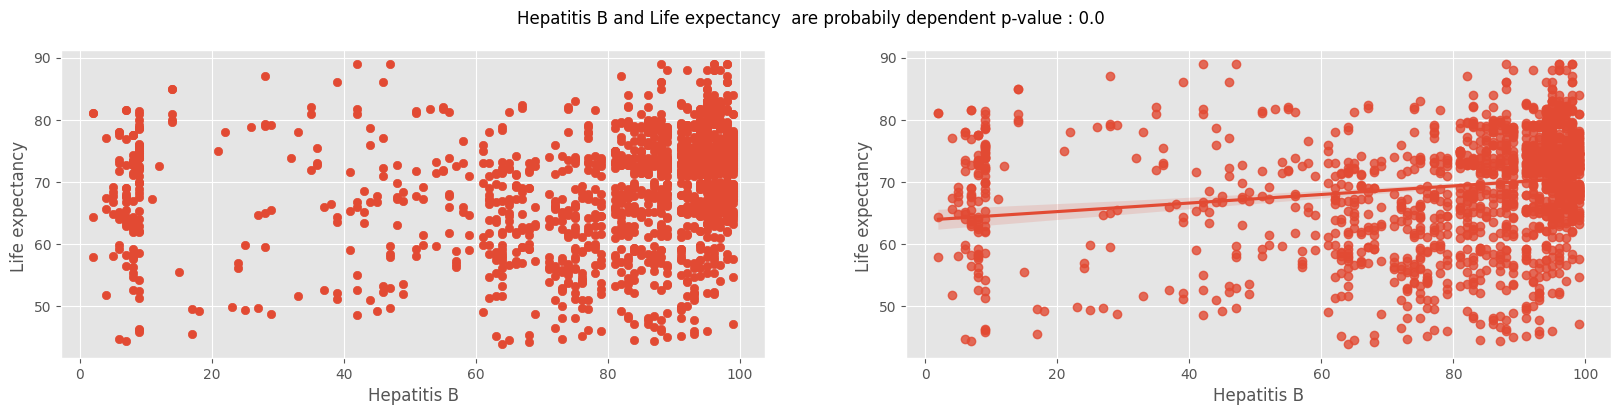

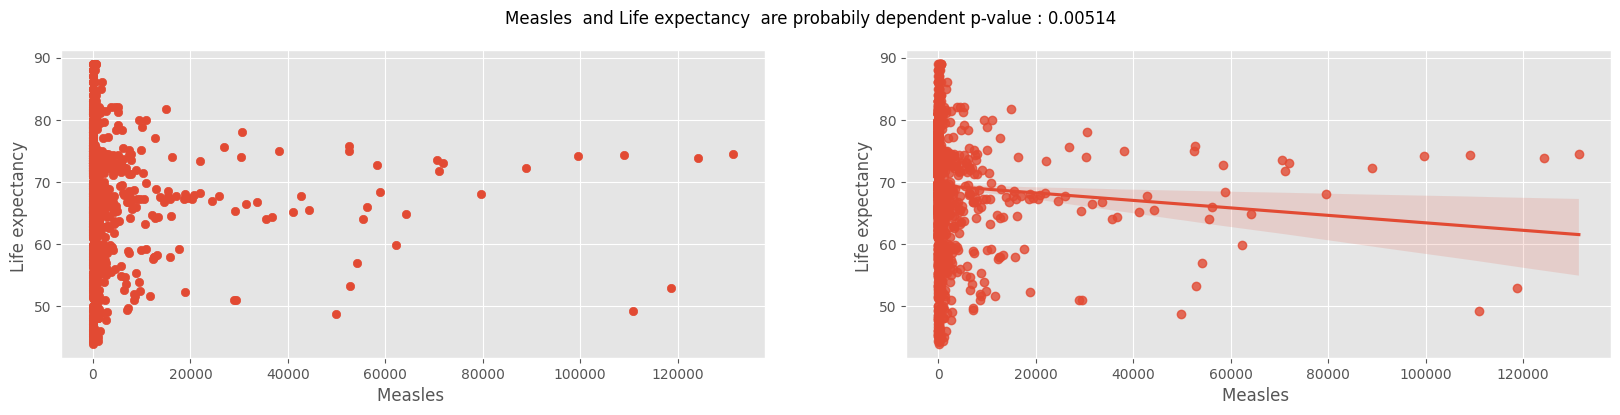

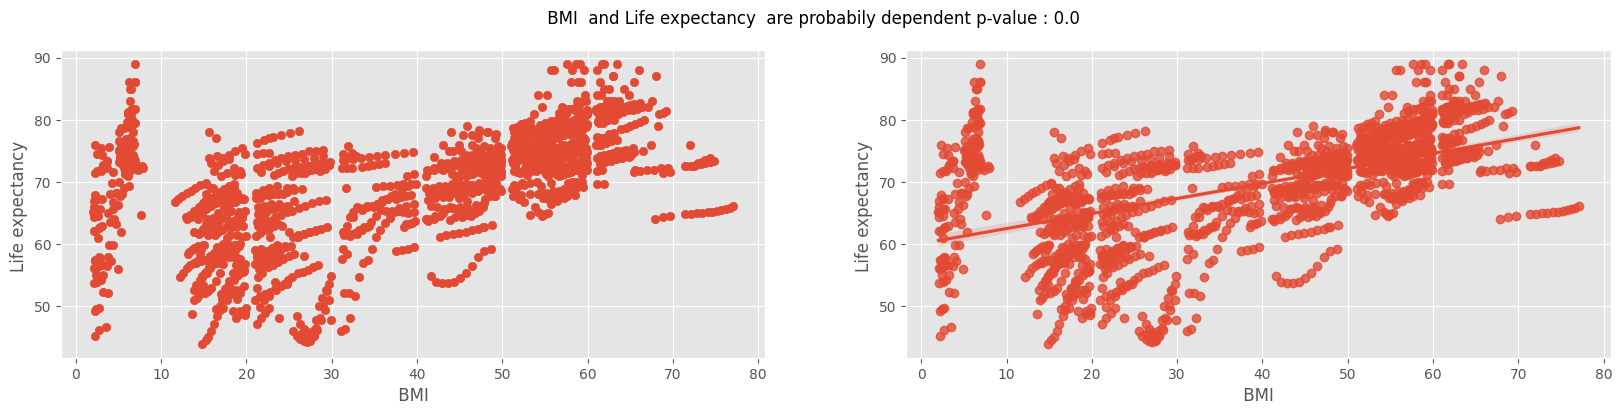

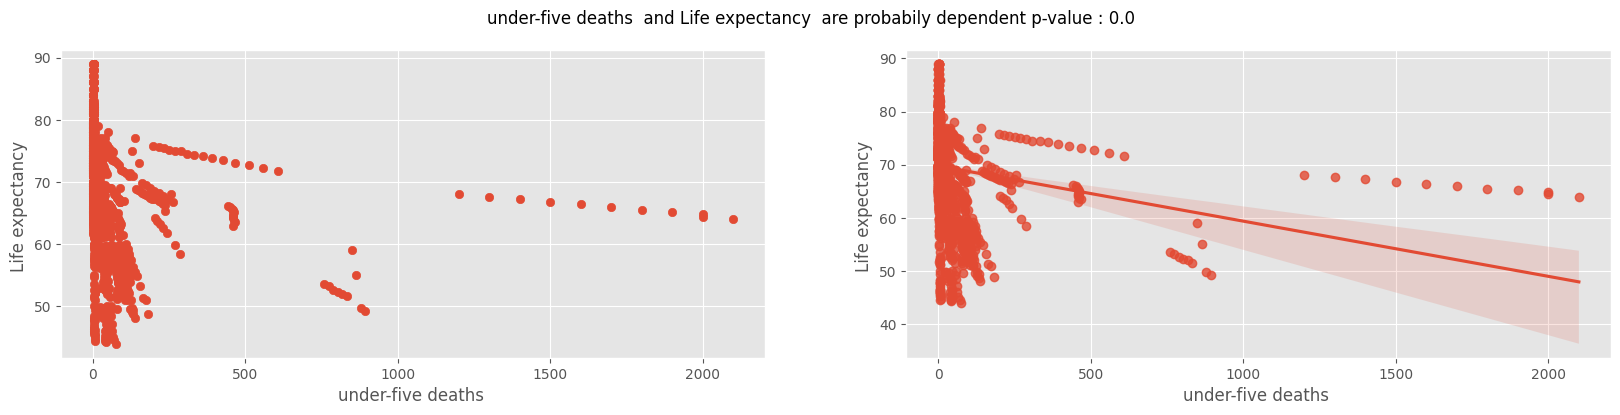

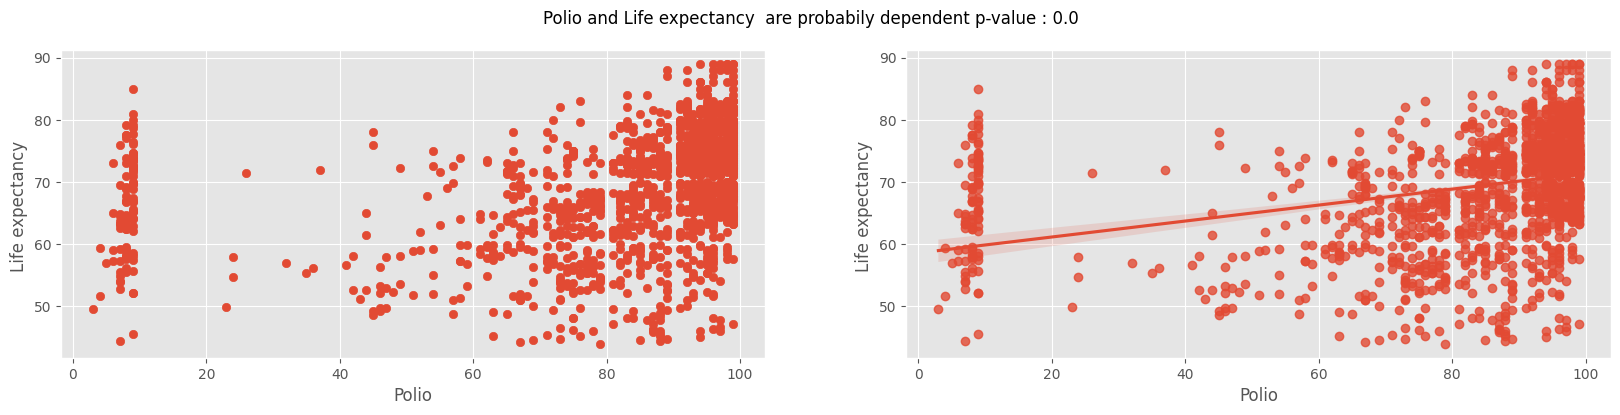

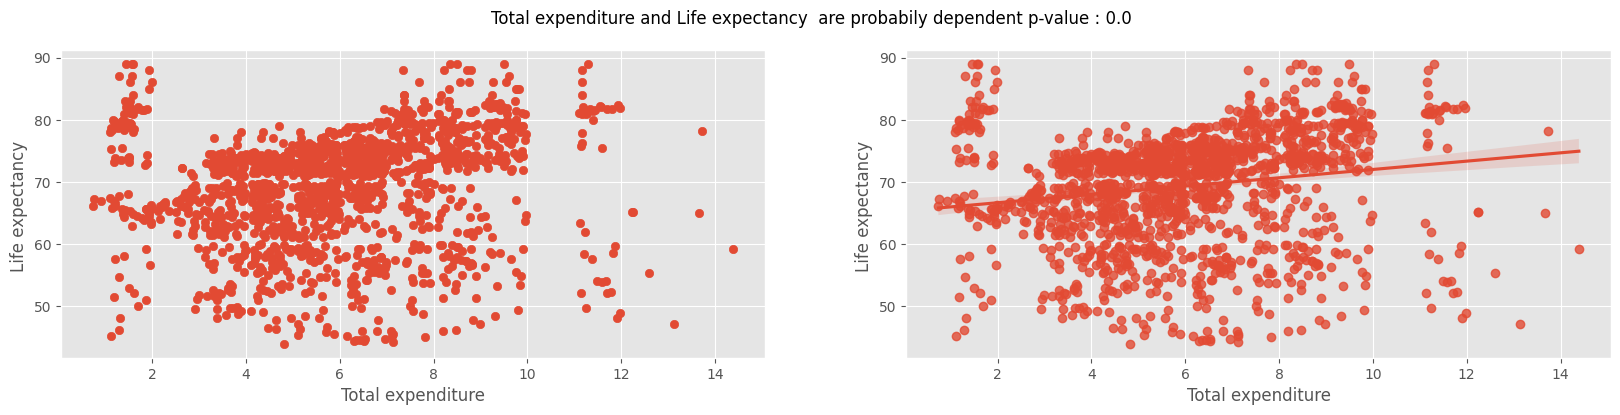

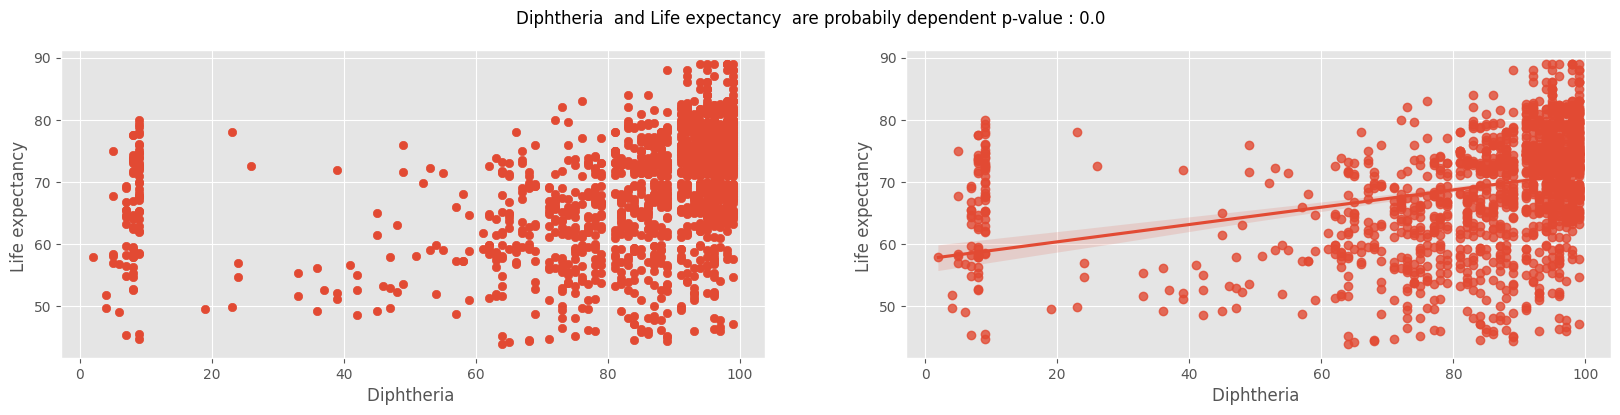

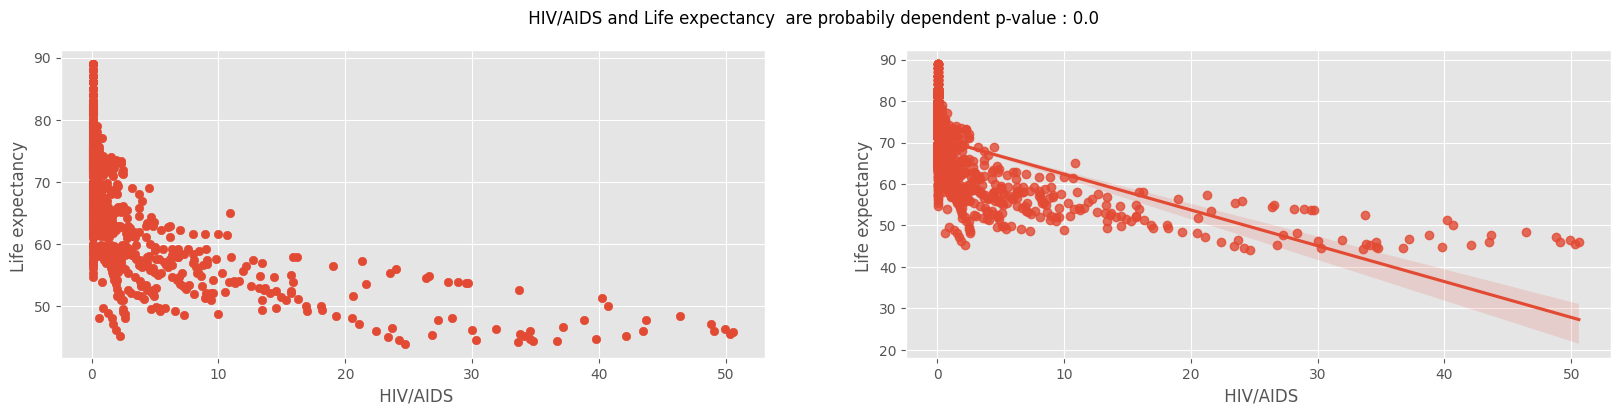

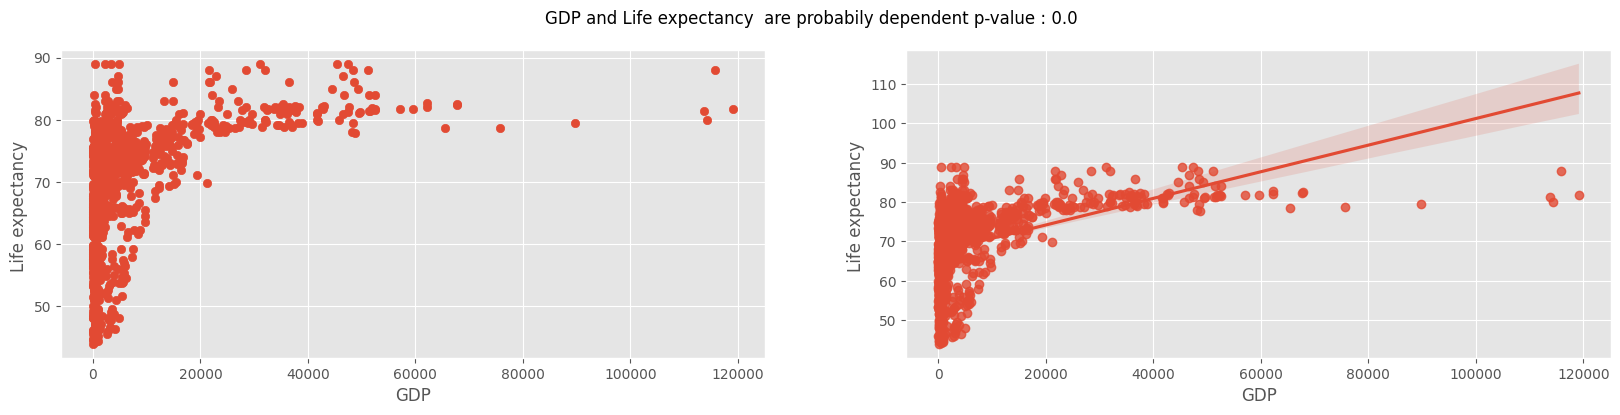

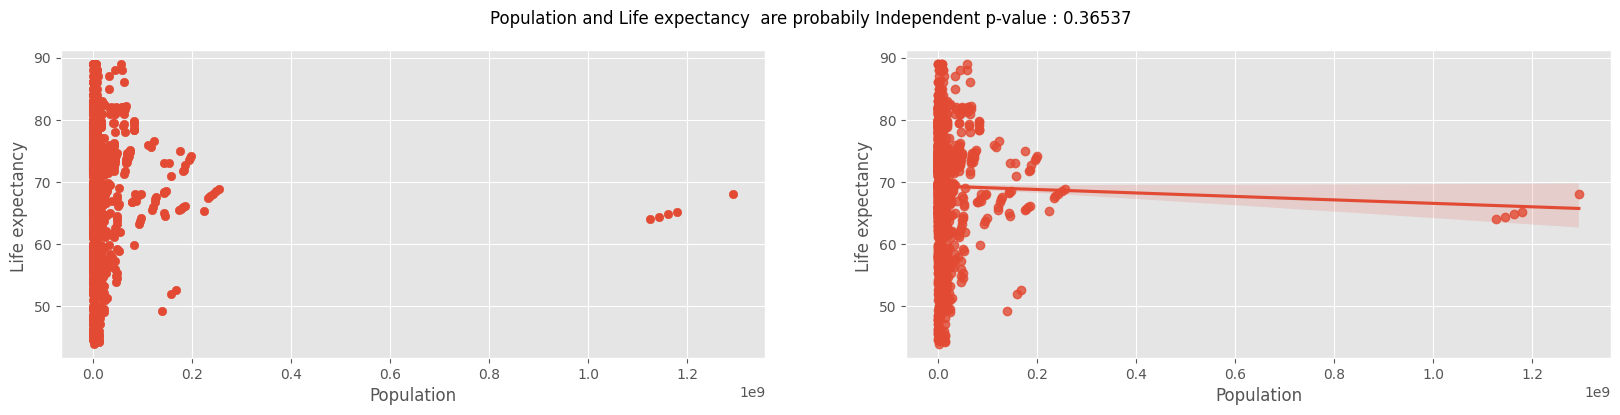

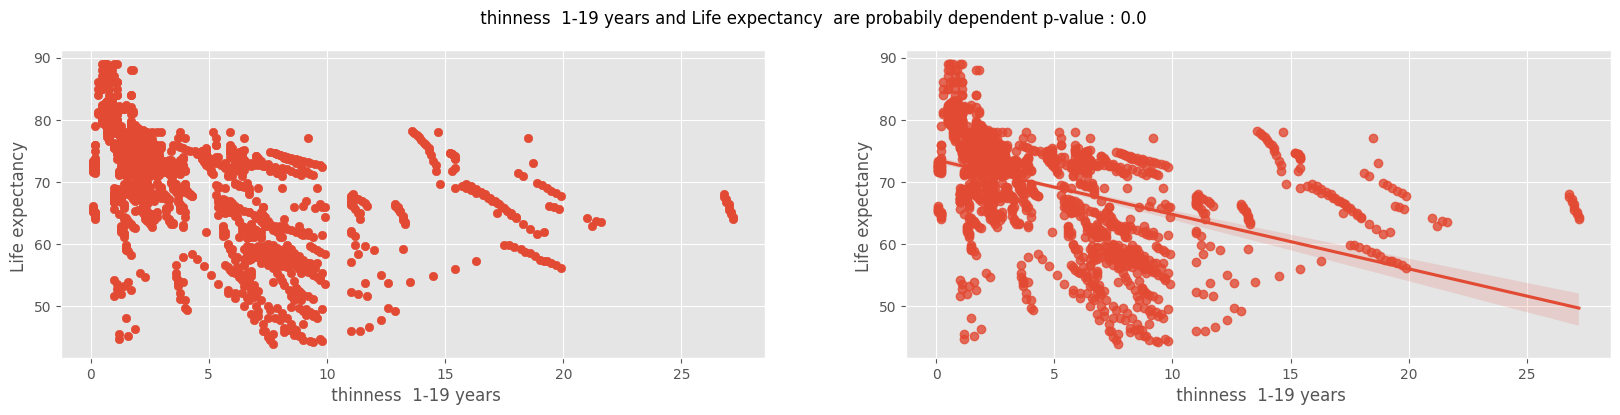

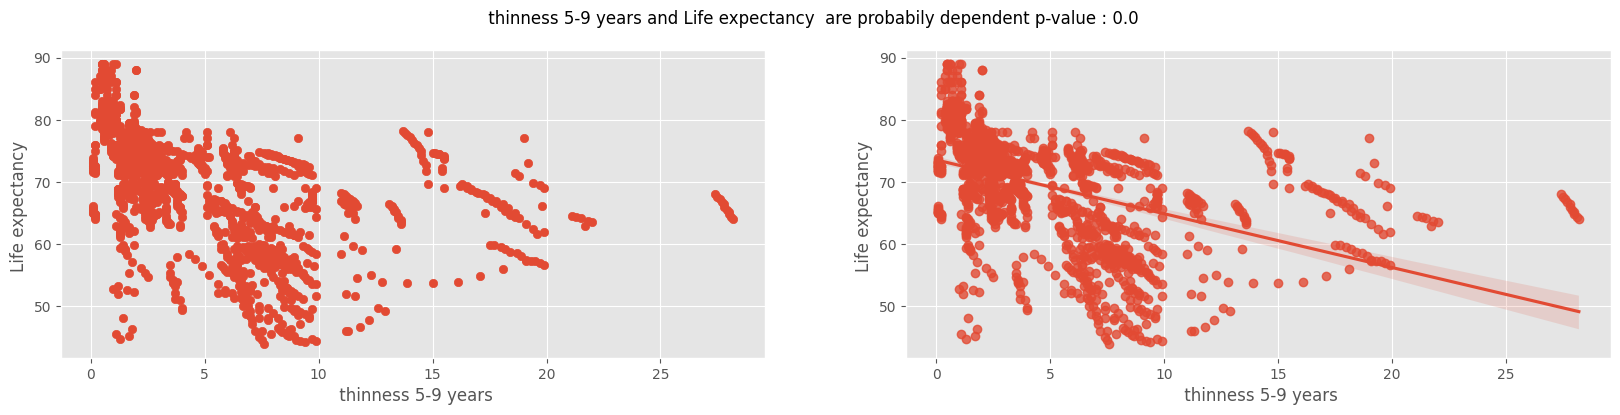

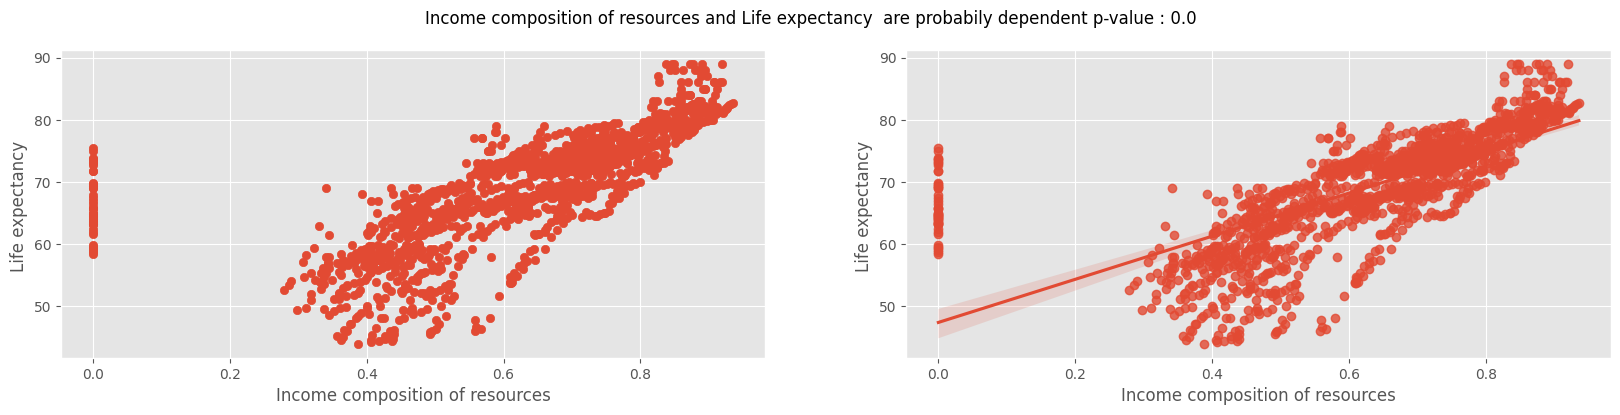

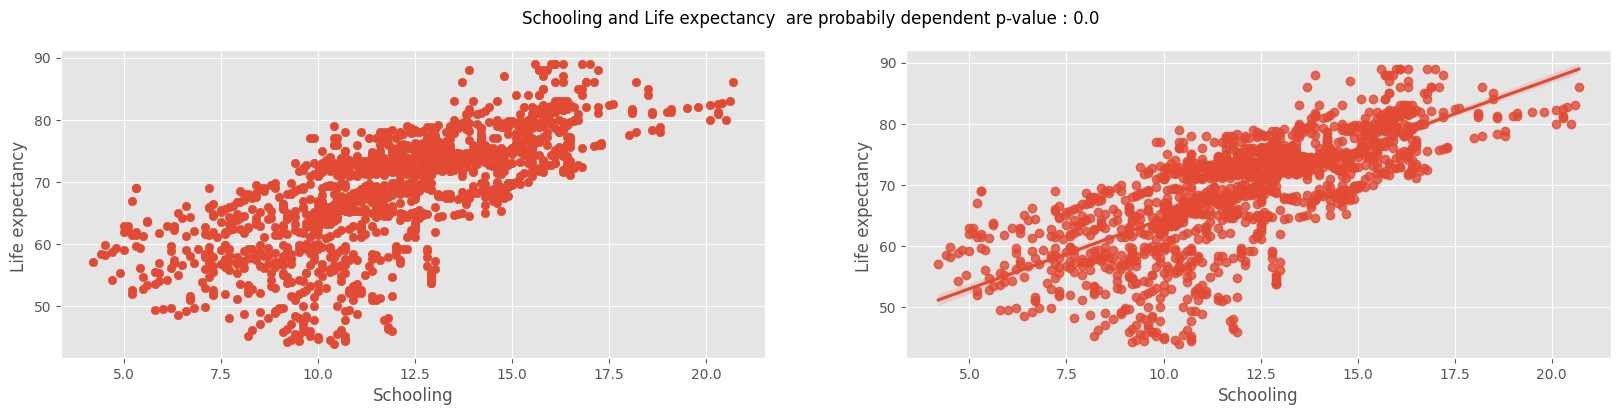

In [29]:
for feature in numericalFeatures:
  if feature != 'Life expectancy ':
    pearsonrTestPlot(feature,'Life expectancy ',data)

In [30]:
Years_list = sorted(data['Year'].unique())

In [31]:
def getLifeExpectancyCountryPerYear(asc=True):

  # This part is to find the highest or lowest life expectany country of each year

  listOfLifeExpectancyValues = list()

  for year in Years_list:
    value = data.query(f"Year == {year}") \
    .groupby(['Country','Year']).agg({'Life expectancy ':'min'}) \
    .reset_index() \
    .sort_values(by='Life expectancy ',ascending=asc) \
    .iloc[0]

    listOfLifeExpectancyValues.append(value)
    lifeExpectancyCountryPerYear = pd.concat(listOfLifeExpectancyValues,axis=1).T

    # This part will plot the graph that shows the life expectancy

  fig, ax = plt.subplots(figsize=(20, 8))
  if asc:
    fig.suptitle('Countries with least life expectancy ("Life Expectancy Over Years")' )
  else:
    fig.suptitle('Countries with highest life expectancy ("Life Expectancy Over Years")')

  # Plot the life expectancy over years
  ax.plot(lifeExpectancyCountryPerYear['Year'],
            lifeExpectancyCountryPerYear['Life expectancy '],
            marker='o',
            linestyle='-')

  for i, txt in enumerate(lifeExpectancyCountryPerYear['Country']):
        plt.annotate(txt,
        (lifeExpectancyCountryPerYear['Year'].iloc[i],
          lifeExpectancyCountryPerYear['Life expectancy '].iloc[i]),
                    textcoords="offset points", xytext=(0,10),
                    ha='center',rotation=15)  # Add text annotation

  ax.set_xlabel('Year')
  ax.set_ylabel('Life Expectancy')
  ax.grid(True)

  plt.show()

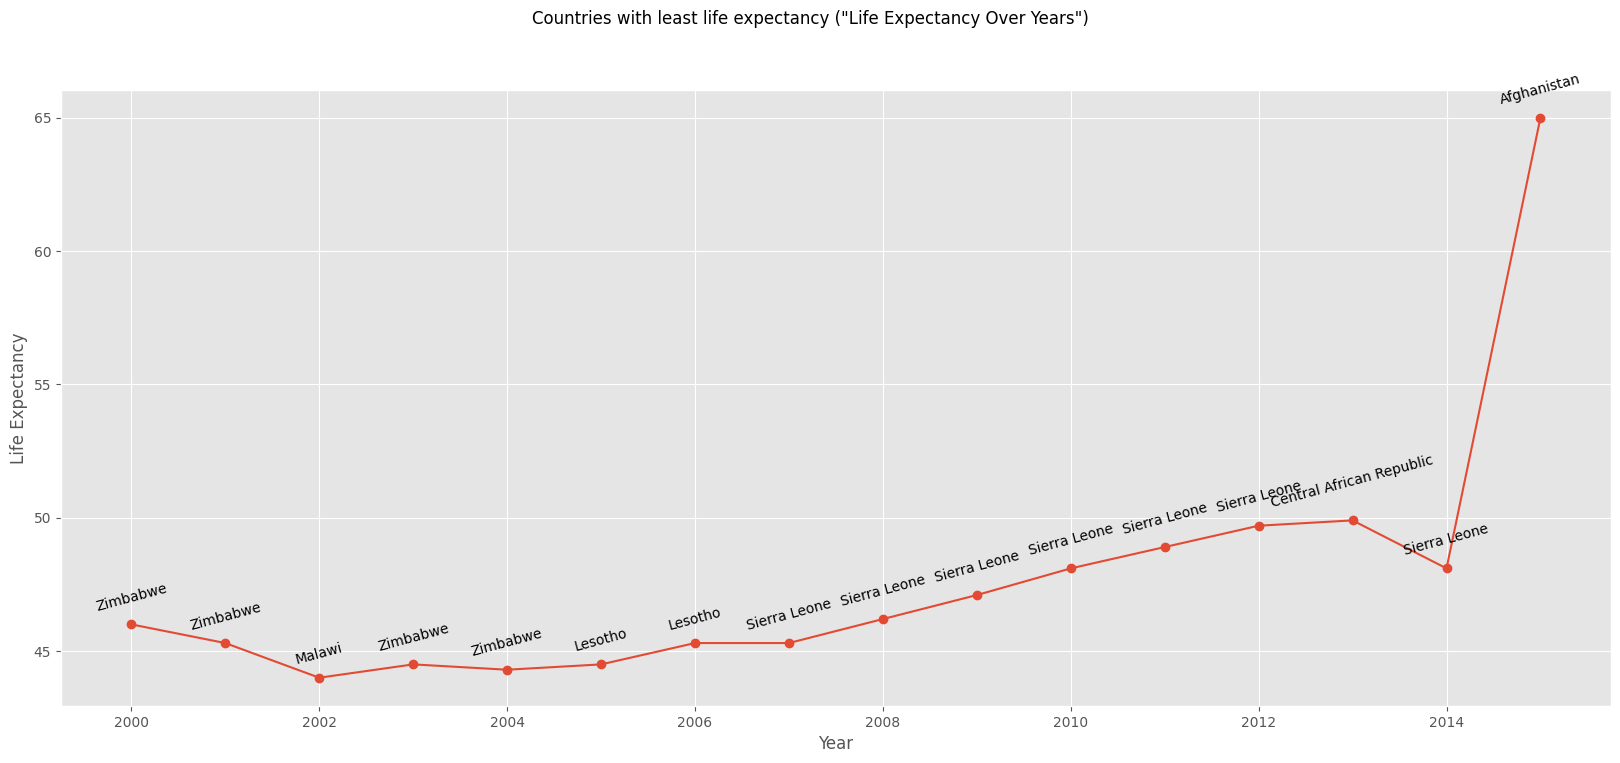

In [32]:
getLifeExpectancyCountryPerYear(True)

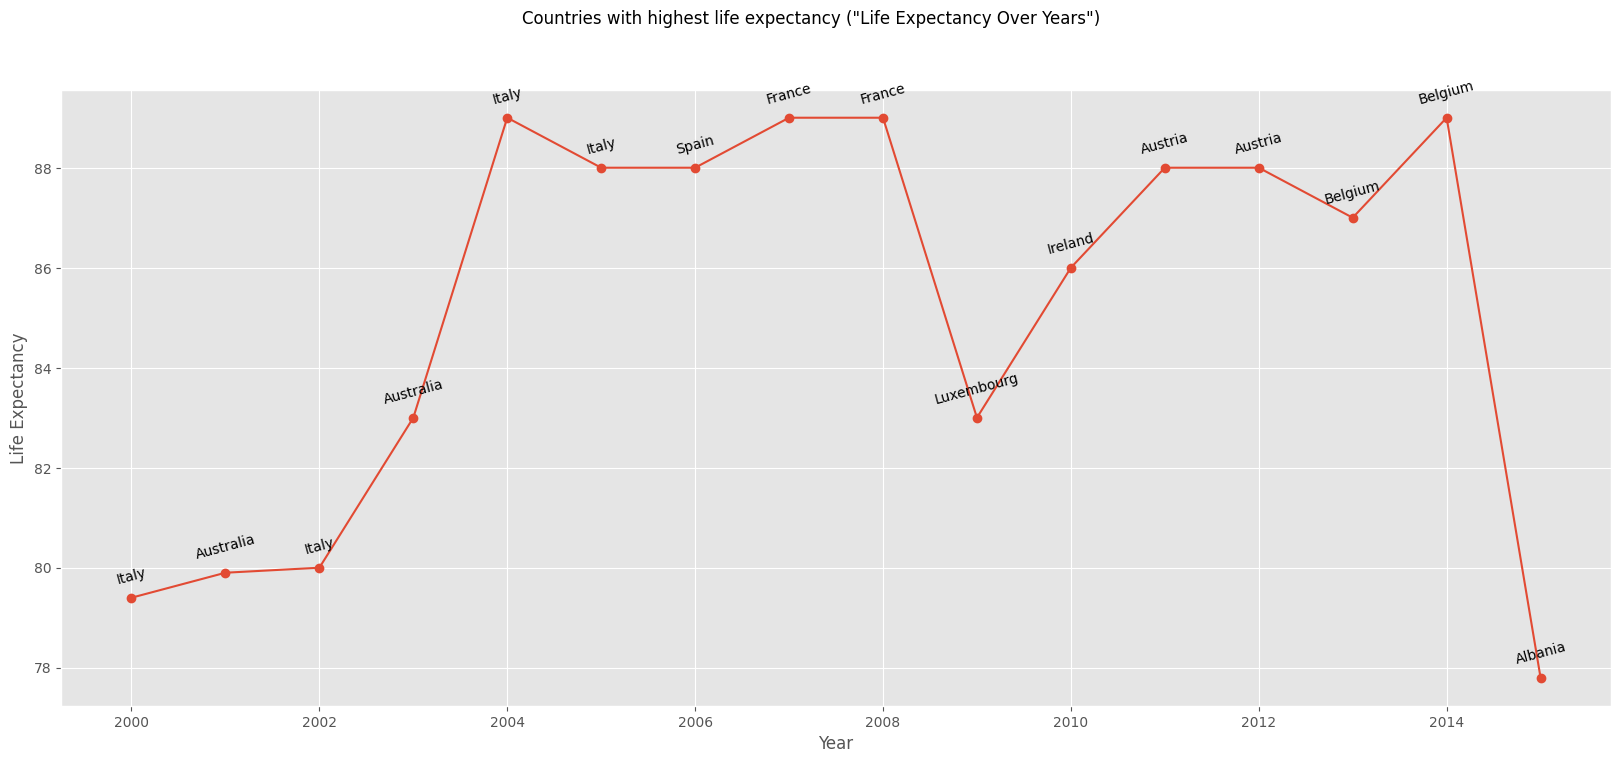

In [33]:
getLifeExpectancyCountryPerYear(False)

### Hypotheses for chi2_contingency

**Null Hypothesis (H0):** The null hypothesis states that there is no association between the categorical variables being studied. In other words, it assumes that the variables are independent.

**Alternative Hypothesis (H1):** The alternative hypothesis contradicts the null hypothesis and suggests that there is a statistically significant association between the categorical variables. It implies that the variables are dependent on each other.

For example, if you are conducting a chi-square test to analyze the relationship between two categorical variables such as gender and voting preference (e.g., Democrat, Republican, Independent), the null and alternative hypotheses would be:



In [34]:
def chi2_contingency_test(feature1,feature2):
  Chi2 = chi2_contingency(pd.crosstab(data[feature1],data[feature2]).reindex())
  if Chi2.pvalue < 0.05:
    print(f'{feature1} and {feature2} are independent')
  else:
    print(f'{feature1} and {feature2} are dependent')

chi2_contingency_test('Year','Country')

Year and Country are dependent


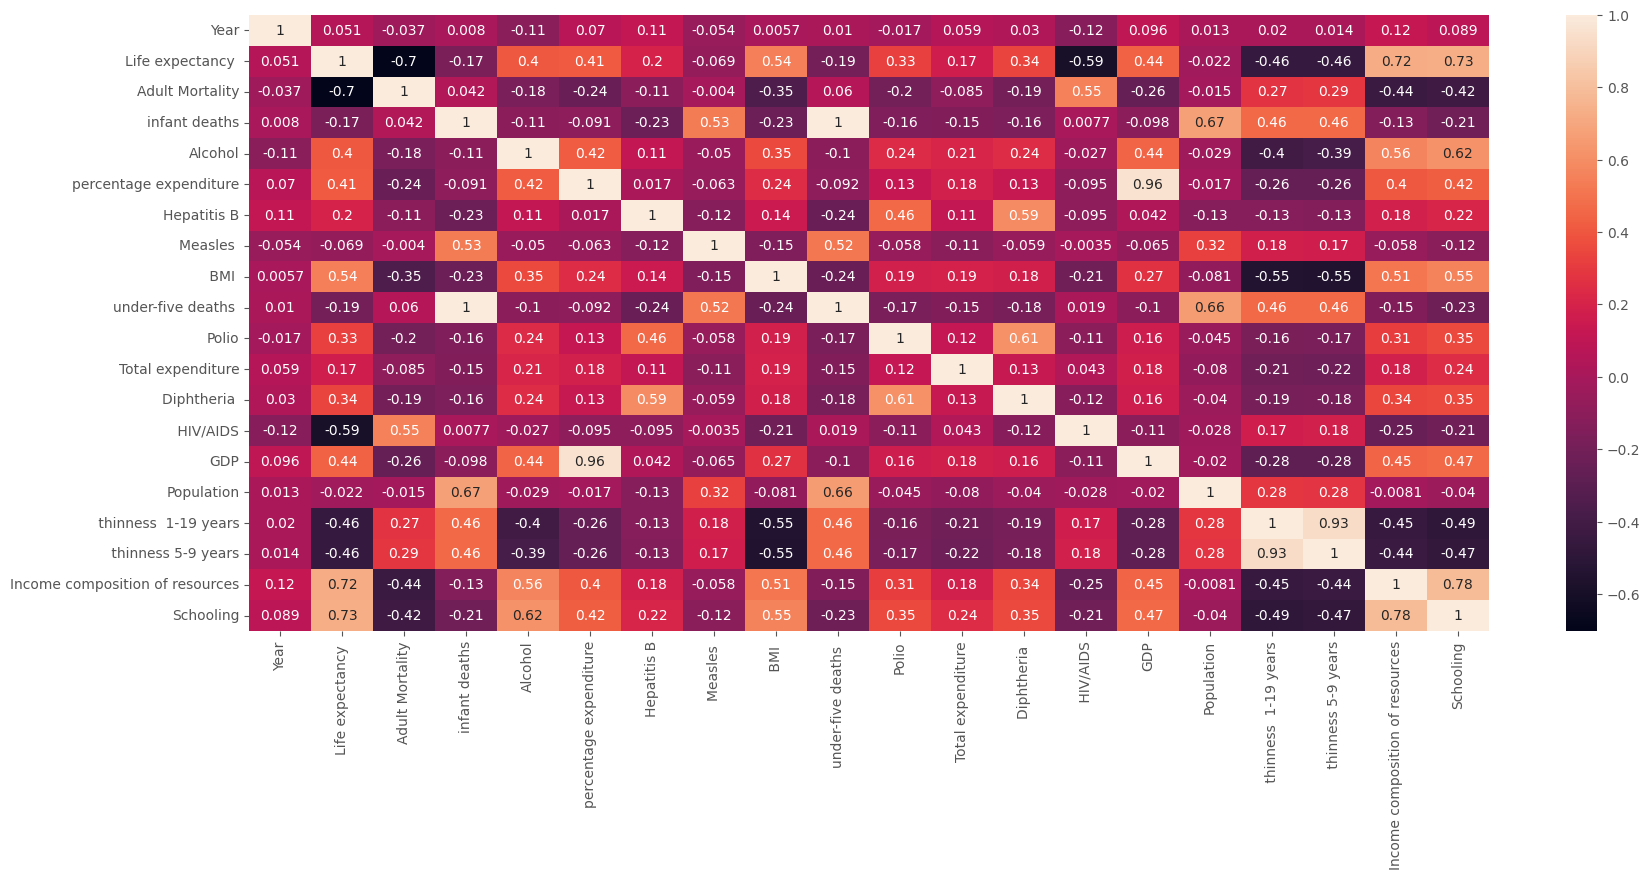

In [41]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [48]:
vif_data = calc_vif(data[numericalFeatures[1:]])

In [51]:
vif_data.loc[vif_data['VIF']>=5]

variables         VIF
1                     infant deaths  222.073491
3            percentage expenditure   14.825787
4                       Hepatitis B   17.396978
6                              BMI     8.287476
7                under-five deaths   210.862351
8                             Polio   24.893553
9                 Total expenditure    8.139036
10                      Diphtheria    33.100694
12                              GDP   16.554311
14             thinness  1-19 years   15.792641
15               thinness 5-9 years   15.953887
16  Income composition of resources   37.383260
17                        Schooling   56.738013